# **Business Analytics: Predicting Used Car Price in UK**
Created By : Rafidghadah Damarta dan Zahir Ilham

## **Business Problem Understanding**

### **Context**

Pandemi covid 19 memberikan efek ke berbagai macam bisnis termasuk bisnis jual-beli mobil bekas. Berdasarkan data [Society of Motor Manufacturers and Traders](https://www.smmt.co.uk/category/vehicle-data/used-car-sales-data/), sepanjang tahun 2022 transaksi mobil bekas di Inggris Raya mengalami penurunan. Namun pada tahun 2023 transaksi mobil bekas di Inggris Raya mengalami pemulihan. Hal ini dibuktikan dengan [pertumbuhan transaksi mobil bekas sebesar 4.1% di Q1 tahun 2023](https://www.smmt.co.uk/2023/05/used-car-sales-q1-2023/) dan menjadi awal terbaik semenjak tahun 2020. Pertumbuhan moderate ini terus terjadi hingga Q3 tahun 2023. Walaupun pada Q4 mengalami penurunan sebesar -4.3%, hal ini masih menunjukan bahwa bisnis jual-beli mobil bekas di Inggris Raya sedang mengalami pertumbuhan kembali. 

Webuy Used Cars merupakan perusahaan yang bergerak di bidang jual-beli mobil bekas sebagai perantara, dengan cara memfasilitasi transaksi antara penjual dan pembeli melalui platform khusus yaitu website jual-beli. Penjual dapat membuat iklan untuk mobil yang ingin dijual dan menentukan harganya berdasarkan rentang harga yang diberikan Webuy Used Cars. Setelah beroperasi di beberapa negara, perusahaan memutuskan untuk melakukan ekspansi ke Inggris Raya.

Untuk melakukan ekspansi dengan baik, tim riset dan pengembangan dari perusahaan Webuy Used Cars ingin mencari tau bagaimana perushaan dapat mengidentifikasi karakteristik mobil bekas di Inggris Raya berdasarkan rentang harganya karena, jika perusahaan melakukan ekspansi tanpa memahami karakteristik mobil bekas di Inggris Raya akan menimbulkan tantangan bahkan kesalahan strategi bagi perusahaan dalam melakukan ekspansi itu sendiri.

Selain karakteristik mobil, penentuan harga juga menjadi penting. Jika perusahaan memberikan rentang harga yang terlalu mahal dari harga pasar, maka akan menyebabkan mobil sulit terjual. Hal ini juga akan menyebabkan kerugian bagi perushaan, karena pembeli mobil akan beralih ke pesaing lainya. Sementara jika perusahaan memberikan rentang harga yang terlalu murah dari harga pasar, maka akan menyebabkan penjual dan perusahaan tidak mendapatkan keuntungan yang optimal. Oleh karena itu, mengetahui harga optimal menjadi penting.  


### **Problem Statement**

- Siapa stakeholder yang memiliki masalah?
    - Tim riset dan pengembangan Webuy Used Cars
    - Penjual Mobil Bekas
- Masalah yang dihadapi oleh stakeholder tersebut?
    - Kesulitan mengetahui karakteristik mobil bekas yang ada di Inggris Raya, membuat stakeholder kesulitan untuk mengetahui informasi dasar mengenai mobil bekas di daerah ekspansi mereka.
    - Kesulitan untuk menentukan harga mobil yang sesuai dengan harga pasar secara effisien.
- Mengapa masalah perlu dipecahkan?
    - Tidak memahami karakteristik mobil bekas di Inggris Raya akan menimbulkan tantangan bahkan kesalahan strategi bagi perusahaan dalam melakukan ekspansi itu sendiri.
    - Untuk memperoleh estimasi harga, penjual harus menunggu tim Webuy Used Cars memeriksa informasi yang telah diisi mengenai mobil yang hendak dijual. Proses ini memakan waktu dan menambah beban kerja, sehingga kurang efisien.

### **Goals**

- Apa tujuan dan target dari penyelesaian masalah?
     - Mengembangkan model prediktif dengan metric evaluation MAPE kurang dari 12% untuk memastikan akurasi tinggi dalam memprediksi harga mobil bekas. Hal ini berdasarkan [percobaan lain yang memprediksi harga mobil bekas di India yang berhasil menghasilkan MAPE <12%](https://www.atlantis-press.com/article/125971556.pdf).
    - Mengidentifikasi karakteristik mobil bekas di Inggris Raya, berdasarkan kategori harga, sehingga memberikan wawasan yang actionable bagi para stakeholder.

### **Analytic Approach**

- Apa rancangan solusi yang anda tawarkan untuk menyelesaikan masalah dari stakeholder?
    - Pendekatan analitis dimulai dengan Exploratory Data Analysis (EDA) menyeluruh untuk mendapatkan pemahaman mendalam tentang dataset. Selain itu, penjelasan rinci tentang teknik regresi itu sendiri. Pemodelan juga akan melibatkan validasi silang dan penyesuaian hiperparameter untuk memastikan kekokohan dan generalisasi model.

- Kapan dan bagaimana stakeholder akan memanfaatkan atau menggunakan solusi tersebut?
  - Wawasan yang diperoleh dari analisis ini dapat membantu tim riset dan pengembangan Webuy Used Cars dalam membuat keputusan berbasis data, memfasilitasi transaksi yang lebih terinformasi di pasar mobil bekas Inggris Raya.
  - Penjual mobil mendapatkan kemudahan untuk menentukan harga mobil bekas yang sesuai dengan harga pasar mobil bekas di Inggris Raya Jika menggunakan jasa Webuyusedcar.

### **Metric Evaluation**

Untuk megetahui performa suatu model memprediksi targetnya maka kita membutuhkan metric evaluation dengan mengukur nilai errornya. Pada percobaan ini kita menggunakan beberapa metric evaluation diantaranya:

| Metrics | Explaination |
|--------|-------------------|
| MAPE (Mean Absolute Percentage Error) | - MAPE mengevaluasi kesalahan prediksi sebagai persentase dari nilai sebenarnya. <br> - Kemudahan interpretasi kesalahan sebagai persentase membuatnya lebih intuitif dalam konteks bisnis. <br> - Memfasilitasi perbandingan akurasi antar model atau prediksi pada skala yang berbeda. |

Semakin kecil nilai metric evaluation, maka semakin kecil errornya menunjukkan semakin baik suatu model memprediksi nilai targetnya.

In [322]:
import os
import numpy as np
import pandas as pd

# Visulalisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Test distribusi normal
from scipy.stats import normaltest

# Pembuatan table
from tabulate import tabulate

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

## **Data Merging**

Data yang digunakan merupakan data daftar mobil bekas yang tersedia di Inggris Raya, diperoleh melalui teknik web-scraping. Data terbagi menjadi 13 file CSV yang mayoritas telah dipisahkan sesuai dengan masing-masing merek mobil. Mayoritas file memiliki kolom table yang sama Berikut adalah nama file-file dan deskripsinya:

| Nama File | Deskripsi |
| --- | --- |
| audi.csv | Data mobil bekas merek Audi |
| bmw.csv | Data mobil bekas merek BMW |
| ford.csv | Data mobil bekas merek Ford |
| hyundi.csv | Data mobil bekas merek Hyundai |
| merc.csv | Data mobil bekas merek Mercedes-Benz |
| skoda.csv | Data mobil bekas merek Skoda |
| toyota.csv | Data mobil bekas merek Toyota |
| vauxhall.csv | Data mobil bekas merek Vauxhall |
| vw.csv | Data mobil bekas merek Volkswagen |
| unclean cclass.csv | Data mobil model C Class dari merek Mercedes-Benz yang belum melalui tahap cleaning |
| unclean focus.csv | Data mobil model Focus dari merek Ford yang belum melalui tahapan cleaning |
| cclass.csv | Data mobil model C Class dari merek Mercedes-Benz. Tidak memiliki informasi tax dan mpg |
| focus.csv | Data mobil model Focus dari merek Ford. Tidak memiliki informasi tax dan mpg |

Dataset source: https://www.kaggle.com/datasets/adityadesai13/used-car-dataset-ford-and-mercedes/data

Kami memutuskan untuk hanya mengambil data mobil bekas dari merek yang sudah memiliki data lengkap. Berikut adalah file-file data yang akan digunakan dalam penyelesaian masalah:

- audi.csv
- bmw.csv
- ford.csv
- hyundi.csv
- merc.csv
- skoda.csv
- toyota.csv
- vauxhall.csv
- vw.csv

File-file yang akan digunakan akan dikumpulkan menjadi satu data frame. Namun sebelum setiap file dapat disatukan menjadi satu, kami perlu memastikan bahwa setiap file memiliki kolom dan tipe data yang sama.

In [323]:
# Menggabungkan semua file-file yang ada pada folder kedalam dataframes
folder_path = 'Cars Raw Data'
files = [file for file in os.listdir(folder_path)]

# Mengecualikan file-file tertentu
exclude_files = ['unclean cclass.csv', 'unclean focus.csv', 'focus.csv', 'cclass.csv']
csv_files = [file for file in files if file not in exclude_files]

df_temp = []

# Membaca setiap file CSV dan menambahkan dataframe-nya ke dalam list
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    df_temp.append(df)

# Menggabungkan semua dataframes
df_check = pd.concat(df_temp, ignore_index=True)
df_check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99187 entries, 0 to 99186
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         99187 non-null  object 
 1   year          99187 non-null  int64  
 2   price         99187 non-null  int64  
 3   transmission  99187 non-null  object 
 4   mileage       99187 non-null  int64  
 5   fuelType      99187 non-null  object 
 6   tax           94327 non-null  float64
 7   mpg           99187 non-null  float64
 8   engineSize    99187 non-null  float64
 9   tax(£)        4860 non-null   float64
dtypes: float64(4), int64(3), object(3)
memory usage: 7.6+ MB


In [324]:
# Informasi kolom file hyundi.csv
df_hyundi = pd.read_csv("Cars Raw Data/hyundi.csv")
df_hyundi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         4860 non-null   object 
 1   year          4860 non-null   int64  
 2   price         4860 non-null   int64  
 3   transmission  4860 non-null   object 
 4   mileage       4860 non-null   int64  
 5   fuelType      4860 non-null   object 
 6   tax(£)        4860 non-null   int64  
 7   mpg           4860 non-null   float64
 8   engineSize    4860 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 341.8+ KB


**Explanation and Action**

Penamaan kolom tax pada data Hyundai berbeda dengan file lain maka, kolom tax(£) pada data Hyundai akan diganti menjadi tax agar dapat dilakukan data merging. Kami juga menambahkan kolom Brand yang berisi informasi merek mobil tersebut mengingat, setiap file CSV dipisahkan berdasarkan merek dan penambahan kolom tersebut dapat memberikan analisis yang lebih mendalam.

In [325]:
# Menggabungkan data kedalam dataframe df_all
df_all = pd.DataFrame()

for file in files:
    if file in exclude_files:              # Lewati file yang dikecualikan
        continue
    
    # Variable yang menyimpan semua data
    current_data = pd.read_csv(os.path.join(folder_path, file))
   
   # Pembuatan kolom Brand
    file_name = os.path.splitext(file)[0]  # Ekstrak nama file tanpa ekstensi
    brand_mapping = {                      # Pemetaan nama file ke merek mobil yang sesuai
        'merc': 'Mercedes Benz',
        'bmw': 'BMW',
        'vw': 'Volkswagen',
        'hyundi': 'Hyundai'
        }
    current_data['Brand'] = brand_mapping.get(file_name, file_name.title()) # Tetapkan kolom 'Brand' berdasarkan pemetaan atau nama file
    
    # Ubah kolom 'tax(£)' menjadi 'tax' untuk Hyundai
    if file_name == 'hyundi':
        current_data.rename(columns={'tax(£)': 'tax'}, inplace=True)
    
    df_all = pd.concat([df_all, current_data])

# Urutkan kolom dengan 'brand' sebagai kolom pertama
df_all = df_all[['Brand'] + [col for col in df_all.columns if col != 'Brand']]

# Merubah penulisan kolom dengan gaya Title
df_all.columns = [col.title() for col in df_all.columns]
df_all.rename(columns={'Fueltype' : 'Fuel Type', 'Enginesize':'Engine Size'}, inplace=True)

df_all = df_all.reset_index(drop=True)
df_all

Brand Model  Year  Price Transmission  Mileage Fuel Type  Tax  \
0            Audi    A1  2017  12500       Manual    15735    Petrol  150   
1            Audi    A6  2016  16500    Automatic    36203    Diesel   20   
2            Audi    A1  2016  11000       Manual    29946    Petrol   30   
3            Audi    A4  2017  16800    Automatic    25952    Diesel  145   
4            Audi    A3  2019  17300       Manual     1998    Petrol  145   
...           ...   ...   ...    ...          ...      ...       ...  ...   
99182  Volkswagen   Eos  2012   5990       Manual    74000    Diesel  125   
99183  Volkswagen   Fox  2008   1799       Manual    88102    Petrol  145   
99184  Volkswagen   Fox  2009   1590       Manual    70000    Petrol  200   
99185  Volkswagen   Fox  2006   1250       Manual    82704    Petrol  150   
99186  Volkswagen   Fox  2007   2295       Manual    74000    Petrol  145   

        Mpg  Engine Size  
0      55.4          1.4  
1      64.2          2.0  
2      55.4          1.4  
3      67.3          2.0  
4      49.6          1.0  
...     ...          ...  
99182  58.9          2.0  
99183  46.3          1.2  
99184  42.0          1.4  
99185  46.3          1.2  
99186  46.3          1.2  

[99187 rows x 10 columns]

## **Data Understanding**

### **Column Description**
Terdapat 10 kolom di dalam dataset. Berikut adalah infromasi tiap kolom pada dataset:

| Attribute | Data Type | Description |
| --- | --- | --- |
| Brand | Object | Merek mobil |
| Model | Object | Nama model mobil |
| Year | Integer | Tahun produksi mobil |
| Price | Integer | Harga mobil |
| Transmission | Object | Transmisi mobil |
| Mileage | Integer | Jarak tempuh yang sudah tercapai oleh mobil tersebut |
| Fuel Type | Object | Jenis bahan bakar mobil |
| Tax | Integer | Harga pajak mobil |
| Mpg | Float | Rata-rata jarak yang ditempuh per unit energi yang dikonsumsi mobil tersebut |
| Engine Size | Float | Ukuran mesin dari mobil tersebut |

In [326]:
# Menampilkan informasi tiap kolom pada dataset
print(f'Dataset ini memiliki jumlah baris {df_all.shape[0]} dan kolom {df_all.shape[1]}')

pd.DataFrame({
    'feature'           : df_all.columns.values,
    'data_type'         : df_all.dtypes.values,
    'null_value(%)'     : df_all.isna().mean().values * 100,
    'n_unique'          : df_all.nunique().values,
    'duplicate'         : df_all.duplicated().sum(),
    'Negative_value_num': [len(df_all[col][df_all[col] < 0])/ len(df_all) * 100 if col in df_all.select_dtypes(include=np.number).columns else 0 for col in df_all.columns],
    'Zero_value_num'    : [len(df_all[col][df_all[col] == 0]) if col in df_all.select_dtypes(include=np.number).columns else 0 for col in df_all.columns],
    'Zero_value_obj'    : [len(df_all[col][df_all[col] == ''])if col in df_all.select_dtypes(include=np.object_).columns else 0 for col in df_all.columns],
    'sample_unique'     : [df_all[col].sort_values().unique() for col in df_all.columns]}
).round(3)

Dataset ini memiliki jumlah baris 99187 dan kolom 10


feature data_type  null_value(%)  n_unique  duplicate  \
0         Brand    object            0.0         9       1475   
1         Model    object            0.0       195       1475   
2          Year     int64            0.0        27       1475   
3         Price     int64            0.0     13236       1475   
4  Transmission    object            0.0         4       1475   
5       Mileage     int64            0.0     42214       1475   
6     Fuel Type    object            0.0         5       1475   
7           Tax     int64            0.0        48       1475   
8           Mpg   float64            0.0       208       1475   
9   Engine Size   float64            0.0        40       1475   

   Negative_value_num  Zero_value_num  Zero_value_obj  \
0                 0.0               0               0   
1                 0.0               0               0   
2                 0.0               0               0   
3                 0.0               0               0   
4                 0.0               0               0   
5                 0.0               0               0   
6                 0.0               0               0   
7                 0.0            6294               0   
8                 0.0               0               0   
9                 0.0             273               0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   sample_unique  
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 [Audi, BMW, Ford, Hyundai, Mercedes Benz, Skoda, Toyota, Vauxhall, Volkswagen]  
1  [ 1 Series,  2 Series,  3 Series,  4 Series,  5 Series,  6 Series,  7 Series,  8 Series,  A Class,  A1,  A2,  A3,  A4,  A5,  A6,  A7,  A8,  Accent,  Adam,  Agila,  Amarok,  Amica,  Ampera,  Antara,  Arteon,  Astra,  Auris,  Avensis,  Aygo,  B Class,  B-MAX,  Beetle,  C Class,  C-HR,  C-MAX,  CC,  CL Class,  CLA Class,  CLC Class,  CLK,  CLS Class,  Caddy,  Caddy Life,  Caddy Maxi,  Caddy Maxi Life,  California,  Camry,  Caravelle,  Cascada,  Citigo,  Combo Life,  Corolla,  Corsa,  Crossland X,  E Class,  EcoSport,  Edge,  Eos,  Escort,  Fabia,  Fiesta,  Focus,  Fox,  Fusion,  G Class,  GL Class,  GLA Class,  GLB Class,  GLC Class,  GLE Class,  GLS Class,  GT86,  GTC,  Galaxy,  Getz,  Golf,  Golf SV,  Grand C-MAX,  Grand Tourneo Connect,  Grandland X,  Hilux,  I10,  I20,  I30,  I40,  I800,  IQ,  IX20,  IX35,  Insignia,  

| **Handling Feature**                | **Description**                                           |
|----------------------------|------------------------------------------------------------------------|
| Missing Values              |Tidak terdapat missing value pada setiap kolom, kita tidak perlu melakukan handling missing value pada tahapan berikutnya. |
| Data Types  |Secara keseluruhan type data sudah sesuai pada kolom kategorikal sudah berbentuk object dan pada kolom numerikal terdapat type integer dan float.|
| Uniqueness  |Setiap data memiliki jumlah data unique yang berbeda, pada kolom numerikal terutama Mileage dan Price jumlah nilai unique lebih bervariasi.|
| Duplicates              |Terdapat jumlah duplikat sebanyak 1475, atau kurang lebih 1.5% dari total baris 99187. Perlu diperiksa lebih lanjut apakah ada salah satu dataset Brand yang menyebabkan duplikat tersebut.| 
| Negative Values              |Tidak terdapat nilai negatif dari setiap data numerikal, hal tersebut sudah sesuai karena dataset tidak memiliki feature yang mengindikasikan kerugian (loss).|
| Zero Values              |Terdapat sebanyak 6294 Tax dan 273 Engine Size yang bernila 0. Hal ini perlu diperiksa lebih lanjut apakah memang terdapat kendaraan yang tidak dikenakan Tax dan apakah semua data yang memiliki nilai Engine Size 0 adalah mobil listrik. |
| Sample Unique Values              |Pada dataset ini terdapat kategori Other pada kolom Transmission dan Fuel Type. Terdapat juga kendaran dengan nilai Mpg kurang 10.0. Kedua hal tersebut harus diperiksa lebih lanjut. Pada dataset ditemukan juga kendaraaan yang memiliki nilai 2060 pada kolom Year. Hal ini perlu dilakukan handling.|

### **Numerical Features**

#### **Distribution**

In [327]:
# Deskriptif statistik pada fitur numerikal
df_all.describe()

Year          Price        Mileage           Tax           Mpg  \
count  99187.000000   99187.000000   99187.000000  99187.000000  99187.000000   
mean    2017.087723   16805.347656   23058.914213    120.299838     55.166825   
std        2.123934    9866.773417   21148.523721     63.150926     16.138522   
min     1970.000000     450.000000       1.000000      0.000000      0.300000   
25%     2016.000000    9999.000000    7425.000000    125.000000     47.100000   
50%     2017.000000   14495.000000   17460.000000    145.000000     54.300000   
75%     2019.000000   20870.000000   32339.000000    145.000000     62.800000   
max     2060.000000  159999.000000  323000.000000    580.000000    470.800000   

        Engine Size  
count  99187.000000  
mean       1.663280  
std        0.557646  
min        0.000000  
25%        1.200000  
50%        1.600000  
75%        2.000000  
max        6.600000


| **Feature** | **Range** | **Average**                                          |
|-------------------------------|-------------------|----------------------------------------------------------------------|
| Year            | 1970 - 2060| Rata-rata tahun pembuatan mobil dalam dataset adalah sekitar tahun 2017 dengan deviasi standar sekitar 2.12 tahun. Hal ini menunjukkan variasi yang relatif kecil dalam tahun pembuatan mobil.|                                               
| Price          | 450 - 159,999| Rata-rata harga mobil dalam dataset ini adalah sekitar £16,881 dengan deviasi standar sekitar £9,752.12. Hal ini menunjukkan variasi yang cukup besar dalam harga mobil.|
| Mileage           | 1 - 323,000| Rata-rata jarak tempuh mobil dalam dataset adalah sekitar 23,050 mil dengan deviasi standar sekitar 21,150.53 mil. Hal ini menunjukkan variasi yang cukup besar dalam jarak tempuh mobil.|
| Tax                       | 0 - 580 | Rata-rata pajak mobil dalam dataset adalah sekitar £119.84 dengan deviasi standar sekitar £63.14. Hal ini menunjukkan variasi yang cukup besar dalam jumlah pajak.|
| Mpg | 0.3 - 470.8 |Rata-rata konsumsi bahan bakar (Mpg) mobil dalam dataset adalah sekitar 55.44 dengan deviasi standar sekitar 15.99. Hal ini menunjukkan variasi yang relatif besar dalam efisiensi bahan bakar.|
| Engine Size | 0.0 - 6.6 |Rata-rata ukuran mesin mobil dalam dataset ini adalah sekitar 1.66 liter dengan deviasi standar sekitar 0.56 liter. Hal ini menunjukkan variasi yang cukup besar dalam ukuran mesin mobil.|



In [328]:
# Uji normalitas kolom numerik
numeric_columns = df_all.select_dtypes(include=['float64', 'int64']).columns
test_results = []

for column in numeric_columns:
    column_data = df_all[column]
    stat, pvalue = normaltest(column_data)
    
    # Format nilai p-value
    pvalue_str = '{:.5f}'.format(pvalue)
    
    # Menetukan hasil distribusi berdasarkan p-value
    distribution_result = 'Normal' if pvalue > 0.5 else 'Tidak Normal'
    test_results.append([column, pvalue_str, distribution_result])

# Format hasil uji normalitas sebagai tabel
table_headers = ['Column', 'pvalue', 'Distribution']
table = tabulate(test_results, headers=table_headers, tablefmt='pretty')
print(table)

+-------------+---------+--------------+
|   Column    | pvalue  | Distribution |
+-------------+---------+--------------+
|    Year     | 0.00000 | Tidak Normal |
|    Price    | 0.00000 | Tidak Normal |
|   Mileage   | 0.00000 | Tidak Normal |
|     Tax     | 0.00000 | Tidak Normal |
|     Mpg     | 0.00000 | Tidak Normal |
| Engine Size | 0.00000 | Tidak Normal |
+-------------+---------+--------------+


**Insight**

Berdasarkan hasil uji normal test menggunakan D'Agustion-Pearson diketahui bahwa data kolom numerikal tidak terdistribusi normal. Untuk dapat mengetahui mayoritas data terdistribusi pada rentang berapa serta ada atau tidaknya outlier kami melakukan visualisasi boxplot dan histogram pada tahapan berikut.

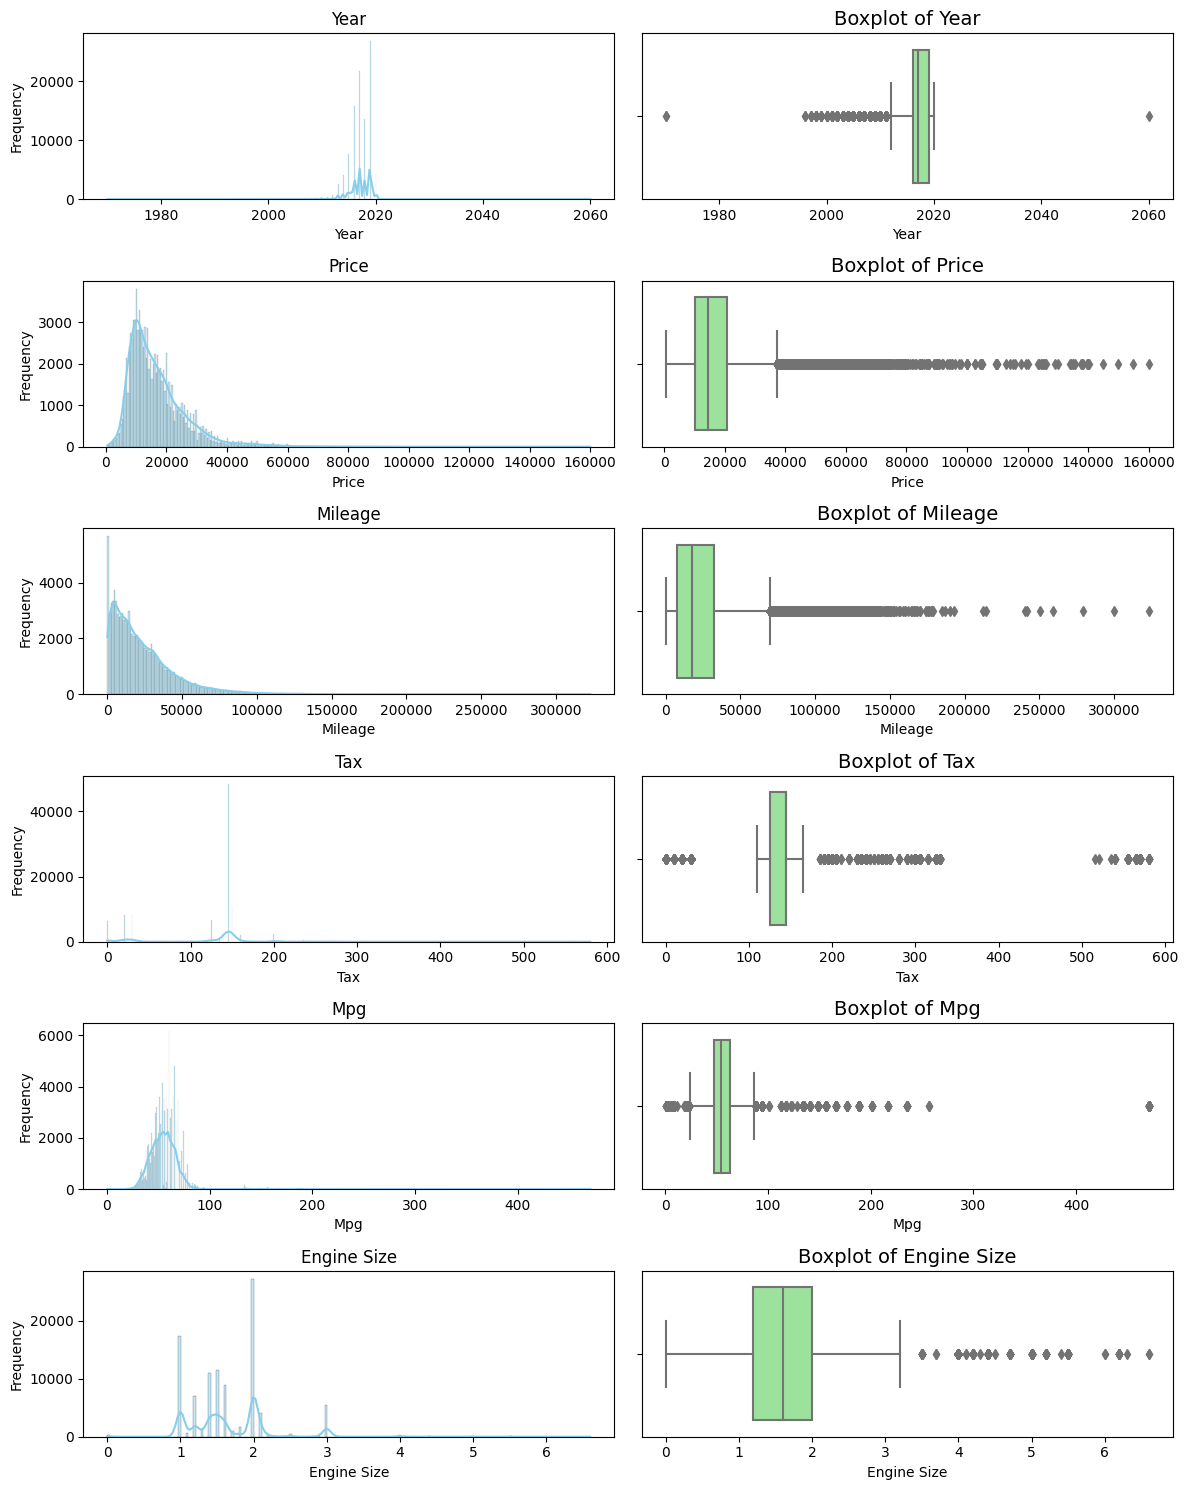

In [329]:
# Visualisasi distribusi data numberik
numeric = df_all.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(12, 15))

# Melooping setiap kolom numerik untuk membuat subplot histogram dan boxplot
for index, col in enumerate(numeric):
    
    # Histogram
    plt.subplot(6, 2, index*2 + 1)
    sns.histplot(df_all[col], kde=True, color='skyblue')
    plt.title(f'{col}', size=12)
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Boxplot
    plt.subplot(6, 2, index*2 + 2)
    sns.boxplot(x=df_all[col], color='lightgreen')
    plt.title(f'Boxplot of {col}', size=14)
    plt.xlabel(col)

plt.tight_layout()
plt.show()

| Feature | Insight |
|---------------------|-----------------|
| Year            | Data terdistribusi pada rentang tahun diatas 2010 hingga 2020. Terdapat anomali pada outlier seperti tahun 2060 dan 1970 |
| Price           | Harga mobil yand dijual umumnya terdapat pada range 10.000-20.000. Tidak terdapat anomali pada lower fence, untuk uperfence kemungkinan tergolong luxury car |
| Mileage         | Mobil cenderung memiliki mileage dibawah 50.000. Terdapat mobil dengan mileage diatas 200k, mengindikasikan mobil tergolong *fatigue* dan 0 mobil baru  |
| Tax             | Mobil cenderung dikenakan pajak pada rentang 100-200. Terdapat mobil yang dikenakan bebas pajak (mobil listrik/EV) dan mobil pajak tinggi (luxuri). |
| Mpg             | Mobil cenderung memiliki Mpg dibawah 100, terdapat anomali dengan mpg diatas 400 kemungkinan mobil hybrid. Sedangkan mpg mendekati 0 perlu dicek kebenarannya |
| Engine Size     | Mobil cenderung memiliki engine size pada rentang 1-2L. Terdapat mobil dengan Engine Size 0 (Kemungkinan mobil listrik) dan diatas 3 kemungkinan mobil sports |

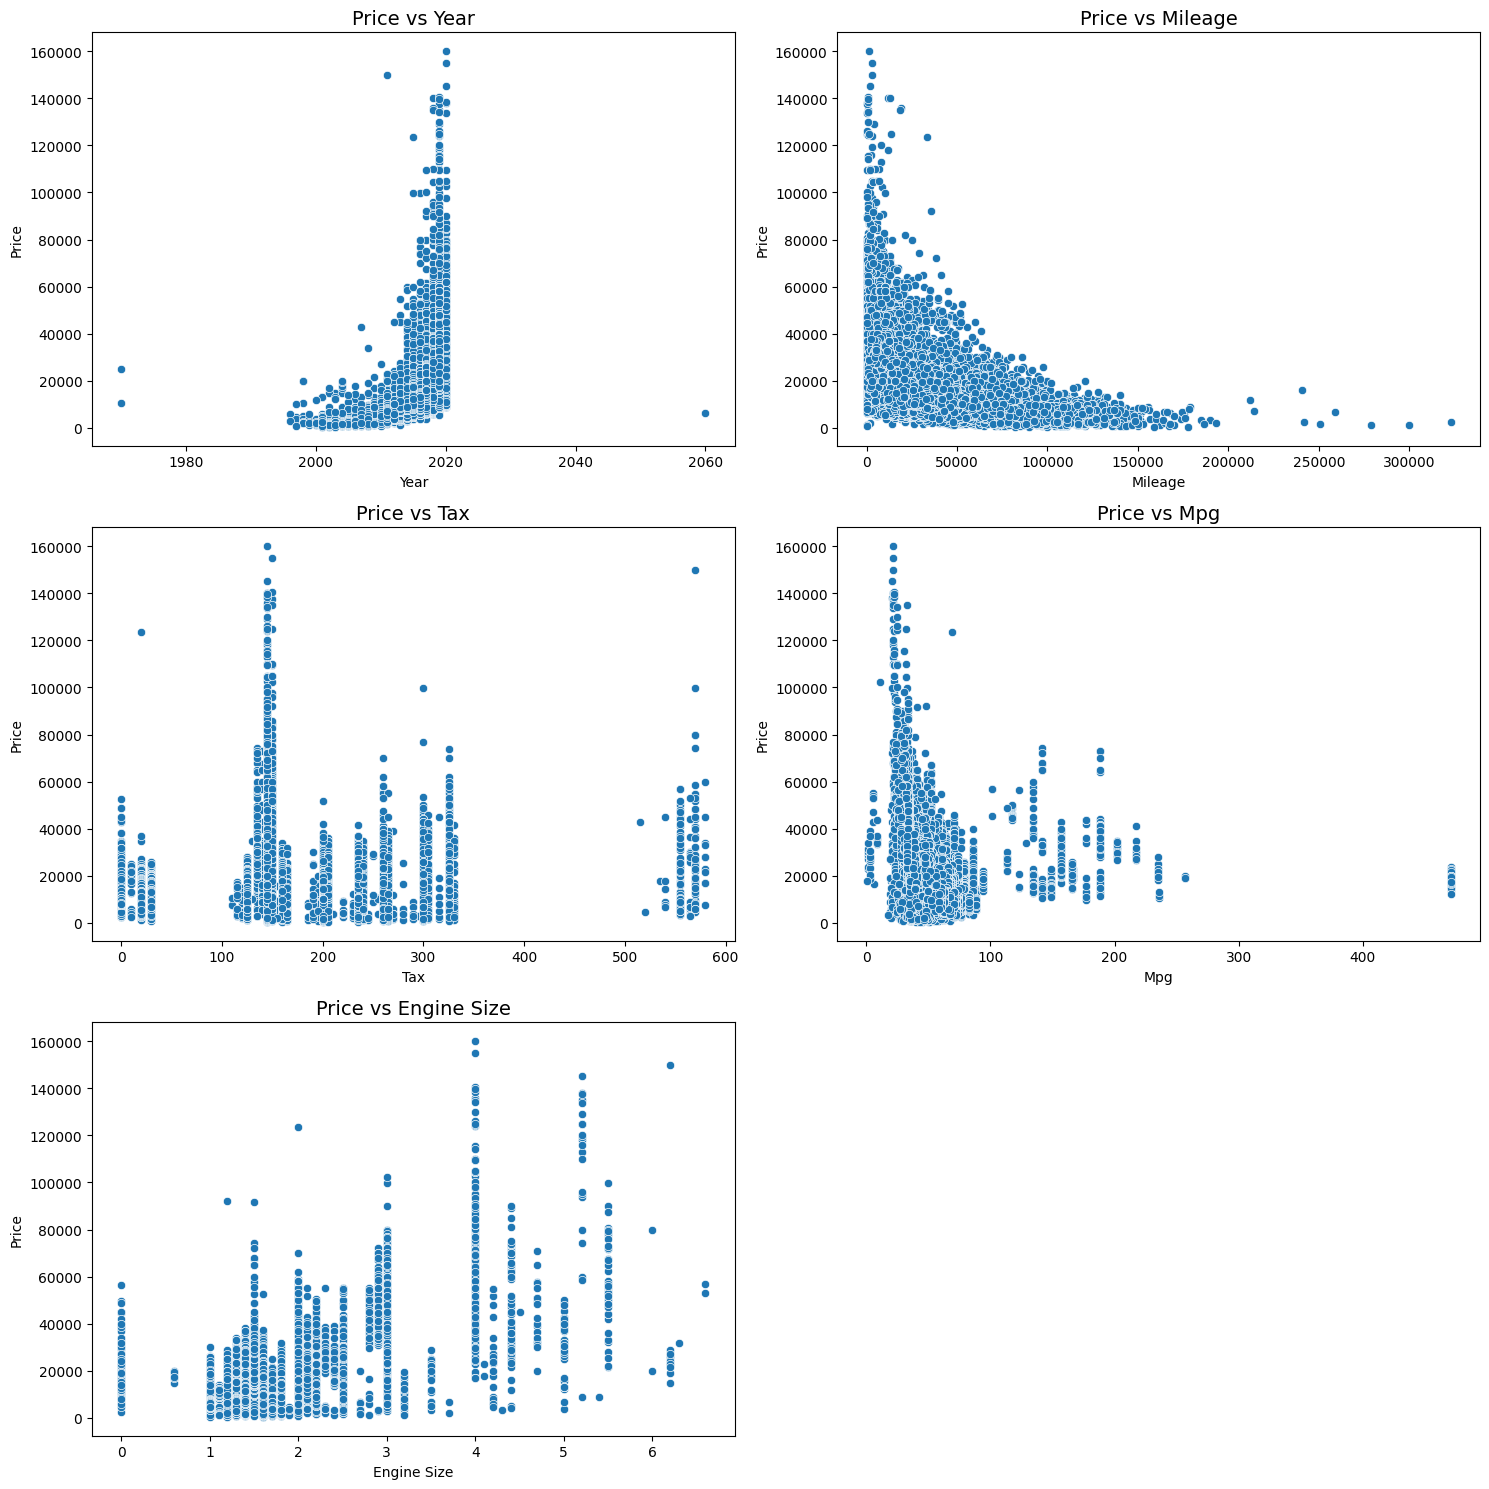

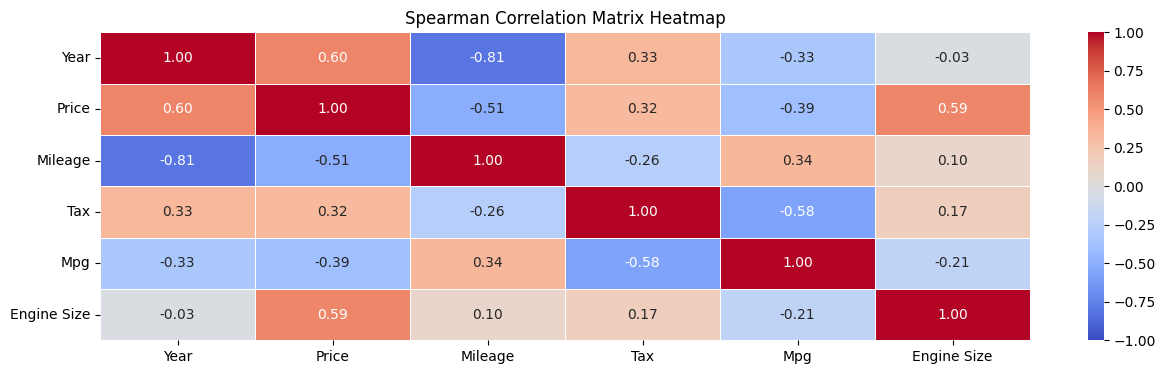

In [330]:
# Membuat visualisasi dan menghitung koefisien korelasi Spearman
plt.figure(figsize=(15, 15))
correlation_with_price = []
num_subplot = 1

for col in numeric:
    if col != 'Price':
        plt.subplot(3, 2, num_subplot)
        sns.scatterplot(x=df_all[col], y=df_all['Price'])
        plt.title(f'Price vs {col}', size=14)
        plt.xlabel(col)
        plt.ylabel('Price')

        # Menghitung koefisien korelasi Spearman
        correlation_coefficient = df_all[col].corr(df_all['Price'], method='spearman')
        correlation_with_price.append([col, correlation_coefficient])
        num_subplot += 1

plt.tight_layout()
plt.show()

# Menghitung matriks korelasi Spearman
spearman_correlation_matrix = df_all.corr(method='spearman', numeric_only=True)

# Membuat visualisasi matriks korelasi Spearman
plt.figure(figsize=(15, 4))
sns.heatmap(spearman_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5, vmin=-1, vmax=1)
plt.title('Spearman Correlation Matrix Heatmap')
plt.show()

Berdasarkan [refrensi](https://sphweb.bumc.bu.edu/otlt/MPH-Modules/PH717-QuantCore/PH717-Module9-Correlation-Regression/PH717-Module9-Correlation-Regression4.html) yang kami baca, berikut adalah deskripsi dari tiap nilai kolerasi koevisien:

| Correlation Coefficient | Description                   |
|--------------------|-----------------------------|
| 0.0 – 0.2          | Very Weak + Association|
| 0.2 – 0.4          | Weak + Association  |
| 0.4 – 0.6          | Moderate + Association  |
| 0.6 – 0.8          | Strong + Association |
| 0.8 – 1.0          | Very Strong + Association   |
| (-) 0.0 – (-) 0.2          | Very Weak - Association|
| (-) 0.2 – (-) 0.4          | Weak - Association  |
| (-) 0.4 – (-) 0.6          | Moderate - Association  |
| (-) 0.6 – (-) 0.8          | Strong - Association |
| (-)   0.8 – (-)  1.0          | Very Strong - Association   |

#### **Heatmap Correlation**

| Correlation Coefficient | Description | Inter Feature Correlation | Insight |
|--------------------|-----------------------------|-----------------------------|-----------------------------|
| 0.0 – 0.2          | Very Weak (+) Association| Tax vs Engine Size| Mengindikasikan bahwa ukuran mesin mobil sangat lemah dalam mempengaruhi besaran pajak kendaraan.
| 0.2 – 0.4          | Weak (+) Association  | Mpg vs Mileage<br>Tax vs Year| Mobil dengan mileage tinggi memiliki kecenderungan mempunyai Mpg tinggi, namun hubungannya lemah.<br> Ada kecenderungan semakin muda tahun produksi kendaraan, semakin besar pajak, namun hubungannya lemah. 
| 0.4 – 0.6          | Moderate (+) Association  | Price vs Engine Size| Adanya hubungan moderate (0.59) dimana, semakin mahal harga kendaraan maka, semakin besar ukuran mesin.
| 0.6 – 0.8          | Strong (+) Association |  Price vs Year|  Semakin tinggi harga kendaraan maka, mengindikasikan mobil tersebut merupakan tahun keluaran baru. 
| 0.8 – 1.0          | Very Strong (+) Association   | -|
| (-) 0.0 – (-) 0.2          | Very Weak (-) Association| Year vs Engine Size| Hampir tidak memiliki korelasi (-0.03) antara tahun kendaraan dan ukuran mesin.
| (-) 0.2 – (-) 0.4          | Weak (-) Association  | Mpg vs Price<br>Mpg vs Year| Mengindikasikan adanya hubungan lemah dimana semakin tua tahun kendaraan semakin besar Mpg.
| (-) 0.4 – (-) 0.6          | Moderate (-) Association  | Mpg vs Tax<br>Mileage vs Price| Adanya hubungan moderate (-0.58), semakin besar Mpg semakin kecil pajak yang dikenakan.
| (-) 0.6 – (-) 0.8          | Strong (-) Association | -|
| (-)   0.8 – (-)  1.0          | Very Strong (-) Association   | Year vs Mileage|  Semakin tinggi mileage kendaraan maka, mengindikasikan mobil tersebut merupakan tahun keluaran lama. 



#### **Price vs Other Numerical Features**

| Features | Insight |
|--------------------|------------------------------------------------------------------|
| Year| Strong Positive Correlation (0.60), Semakin muda tahun mobil (mendekati tahun 2020) harga mobil semakin tinggi. |
| Mileage | Moderate Negative Correlation (-0.51), Semakin rendah Mileage suatu mobil semakin tinggi harga mobil. |
| Tax | Weak Positive Correlation (0.33), Semakin tinggi harga mobil cenderung memiliki pajak yang tinggi. |
| Mpg | Weak Negative Correlation (-0.39), Mobil dengan mpg rendah cenderung memiliki harga yang lebih murah |
| Engine Size | Moderate Positive Correlation (0.59), Semakin besar Engine Size mobil harga mobil semakin tinggi. |

### **Categorical Features**

#### **Distribution**

In [331]:
# Rangkuman untuk kolom-kolom dengan tipe data objek dalam DataFrame 'df_all'
cat_desc = df_all.describe(include='object')
cat_desc.loc['percentage'] = (cat_desc.loc['freq'] / cat_desc.loc['count']) * 100
cat_desc

Brand     Model Transmission  Fuel Type
count           99187     99187        99187      99187
unique              9       195            4          5
top              Ford    Fiesta       Manual     Petrol
freq            17965      6557        56445      54928
percentage  18.112253  6.610745    56.907659  55.378225

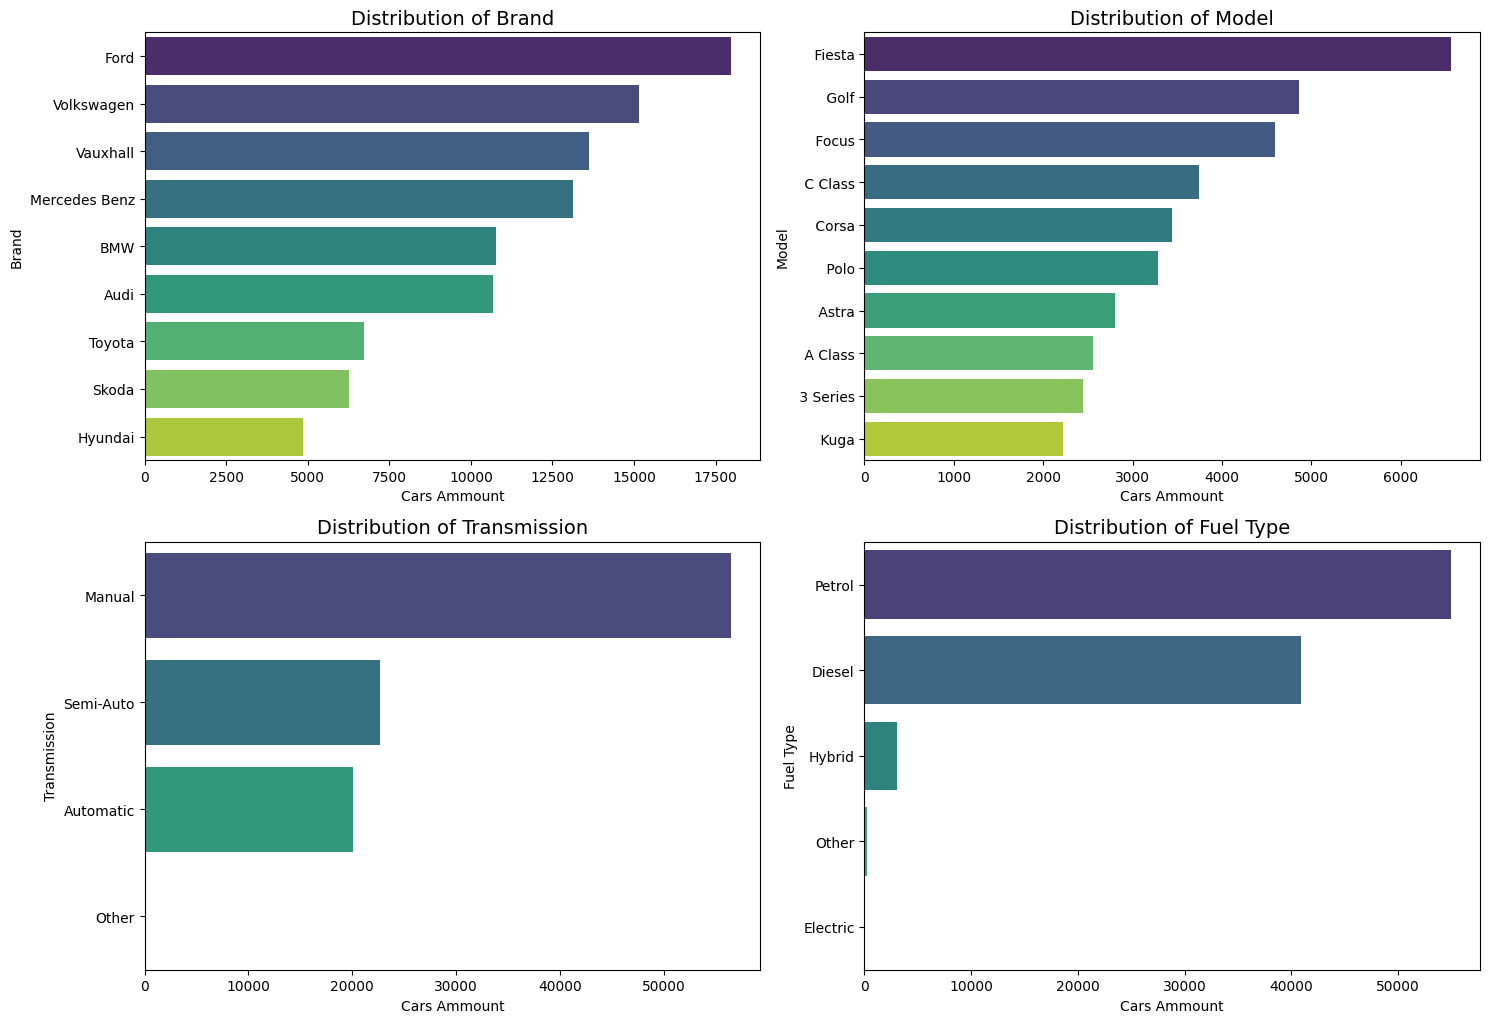

In [332]:
# Visualisasi distribusi data kategorikal
plt.figure(figsize=(15, 15))
num_subplot = 1
category_insights = []
categorical = df_all.select_dtypes(include='object').columns

# Iterasi melalui setiap kolom kategorikal
for col in categorical:
    plt.subplot(3, 2, num_subplot)  
    category_count = df_all[col].value_counts()

    top_categories = category_count.head(10)

    sns.barplot(y=top_categories.index, x=top_categories.values, palette='viridis')
    plt.title(f'Distribution of {col}', size=14)  
    plt.ylabel(col)
    plt.xlabel('Cars Ammount')  
    num_subplot += 1 

plt.tight_layout()
plt.show()

| Features | Insights |
|------------------|----------------------------------------------|
| Brand| Sesuai pada pembasan sebelumnya bahwa Ford merupakan Brand yang paling sering muncul dalam dataset dengan 18,11%, diikuti oleh Volkswagen, Vauxhall, Mercedes Benz dan BMW. |
| Model | 10 Model yang paling sering muncul dalam dataset terdapat 3 Model dari merek Ford yaitu model Fiesta, Focus, dan Kuga. Volkswagen memiliki 2 model yaitu Polo dan Golf. Sementara, terdapat 2 model dari merek Vauxhall yaitu Astra dan Corsa. Untuk merek Mercedes Benz memiliki C Class dan A Class. Serta 1 model merek BMW yaitu 3 Series. |
| Transmission | Jenis Transmission Manual adalah type yang paling sering muncul dengan presentase 56.90% diikuti oleh Semi-Auto dan Automatic. Terdapat transmissi type Other yang perlu dipelajari lebih lanjut apakah ada jenis transmisi diluar 3 type tersebut. |
| Fuel Type | Jenis bahan bakar Petrol adalah type yang paling sering muncul dengan presentase 55.37% diikuti oleh Diesel, Hybrid, Other dan Electric. Terdapat Fuel Type Other yang perlu dipelajari lebih lanjut apakah ada jenis bahan bakar pada tertentu diluar Petrol, Diesel, Hybrid dan Electric. |

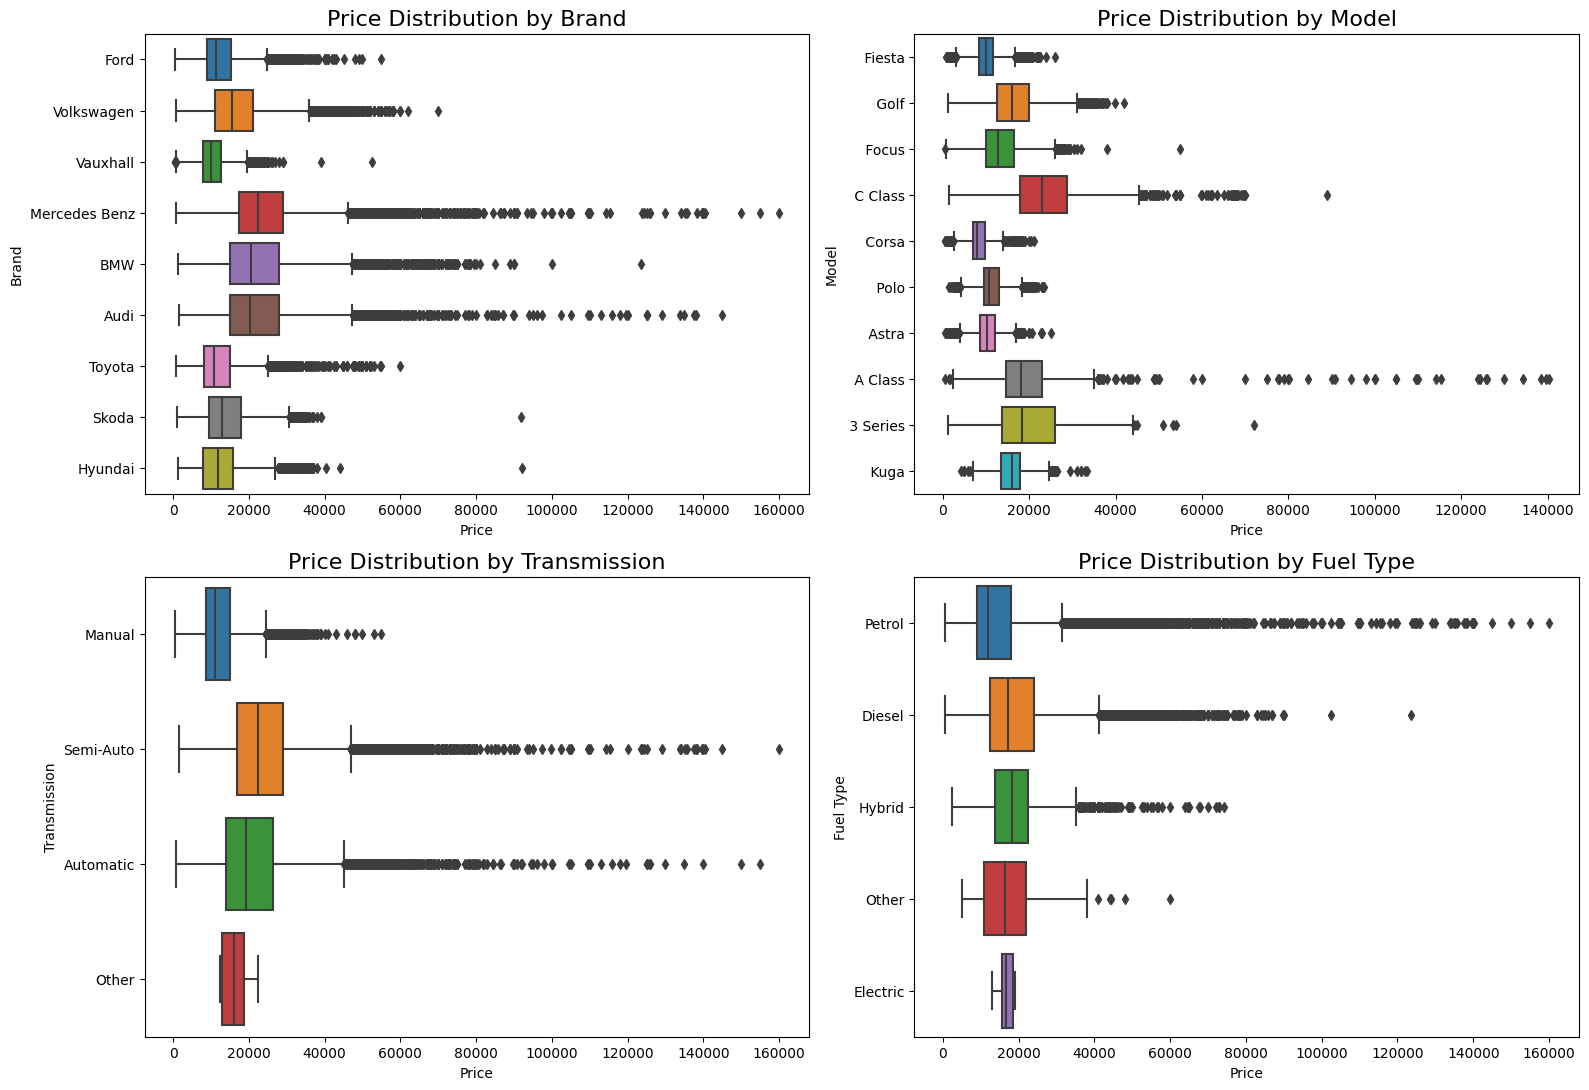

In [333]:
# Membandingkan kolom kategorikal terhadap price
plt.figure(figsize=(16, 16))
num_subplot = 1
category_price = []

# Iterasi melalui setiap kolom kategorikal
for col in categorical:
    plt.subplot(3, 2, num_subplot)
    category_count = df_all[col].value_counts()

    top_categories = category_count.head(10)
    
    sns.boxplot(data=df_all, y=col, x='Price', order=top_categories.index )
    plt.title(f'Price Distribution by {col}', size=16)
    plt.xlabel('Price')
    plt.ylabel(col)
    num_subplot += 1

plt.tight_layout()
plt.show()

| Features | Insights |
|------------------|-----------------------------------------------------------------|
| Brand | Mercedes Benz, BMW dan Audi memiliki persebaran data maupun outliers yang lebih lebar dibandingkan Brand lainnya. Sebagaimana kita ketahui bahwa 3 Brand tersebut merupakan penghasil mobil mewah sehingga rentang harga maupun persebaran outlier pada harga yang lebih tinggi.  |
| Model |C Class, A Class & 3 Series jika dibandingkan dengan data lainnya memiliki persebaran data lebih lebar serta outlier lebih tinggi. 3 Brand tersebut juga berasal dari pengasil mobil mewah yaitu Mercedes Benz dan Audi. |
| Transmission | Jenis trnamisi Semi-Auto dan Automatic memiliki persersebaran harga yang lebih lebar dan harga yang lebih tinggi. Ini terjadi karena jenis transmisi tersebut merupakan teknologi yang lebih canggih dibandingkan Manual. |
| Fuel Type | Diesel memiliki rentang data lebih lebar, outlier pada Diesel dan Petrol lebih tersebar pada Price tinggi. Sebagaimana kita ketahui bahwa mobil jenis mewah dan sports umumnya, membutuhkan tenaga besar dalah hal ini bahan bakar Petrol dan Diesel diperlukan untuk menghasilkan tenaga yang besar. Maka hal yang wajar jika terdapat banyak outlier pada upper fence kedua jenis bahan bakar tersebut.  |

Pada tahapan EDA sub Numerikal kita mengetahui bahwa terdapat korelasi moderate pada kolom Mileage vs Price(-) dan Engine Size vs Price (+) serta kuat Year vs Price (+). Kita akan coba membandingkan 3 korelasi moderate hingga strong tersebut berdasarkan Fuel Type dan Transmission.

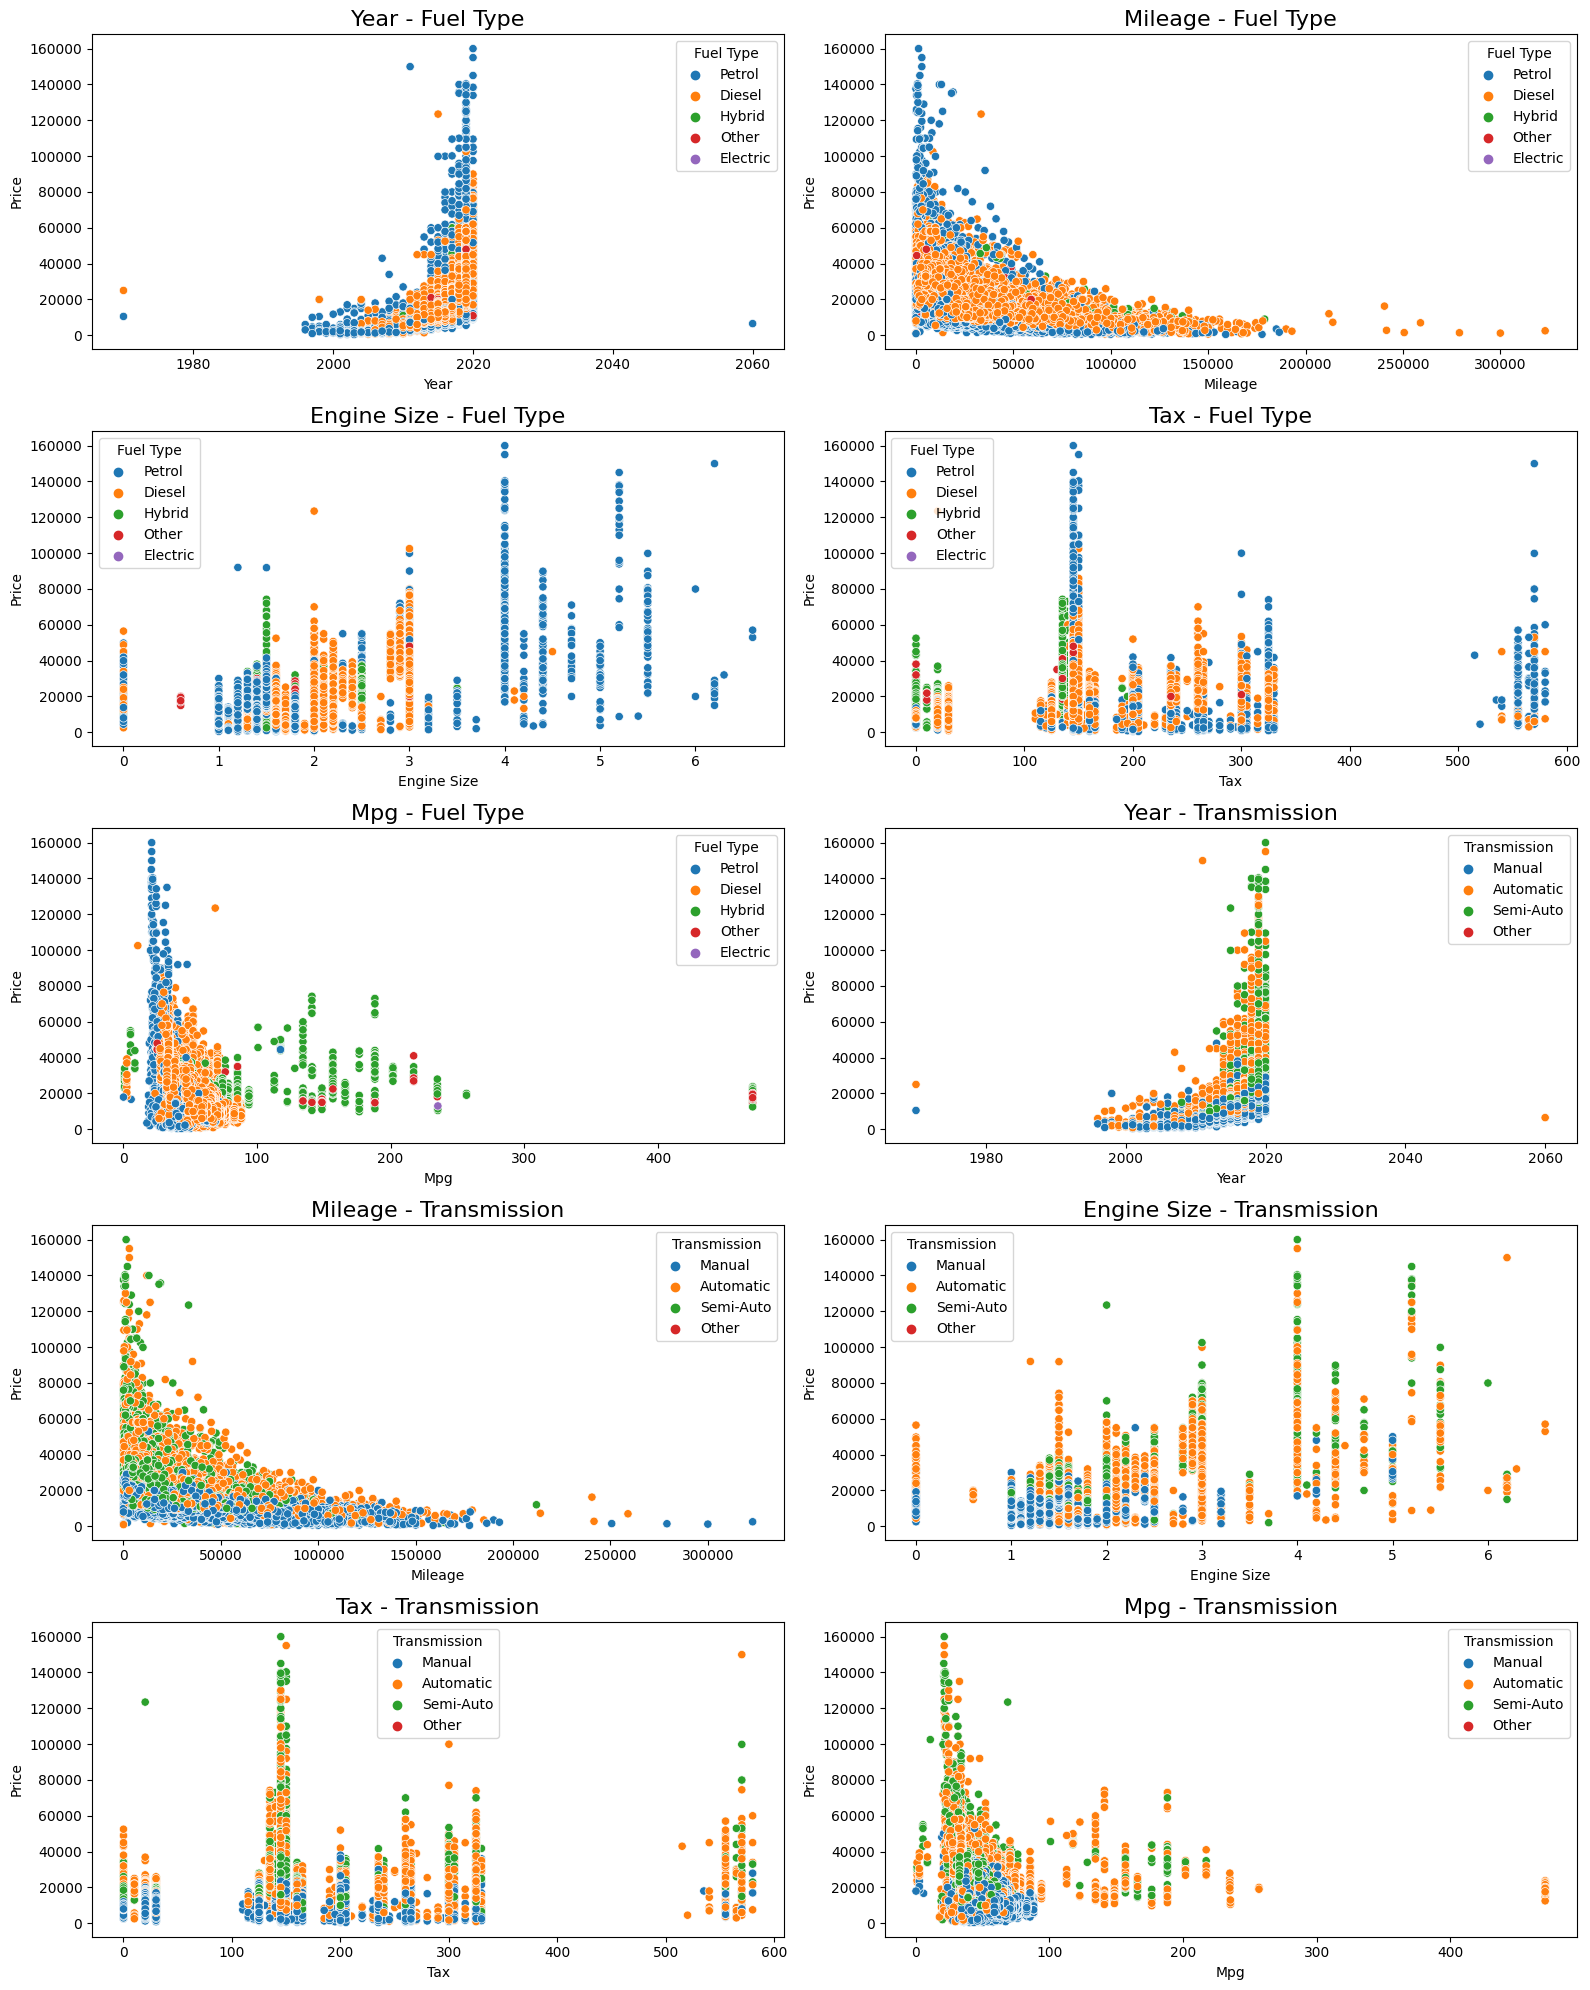

In [334]:
# Visualisasi kolerasi `Price` berdasarkan `Fuel Type` dan `Transmission`
plt.figure(figsize=(16, 20))

# Scatter plots Fuel type
numeric_ = ['Year', 'Mileage', 'Engine Size', 'Tax', 'Mpg']
for i in range(len(numeric_)):
    plt.subplot(5, 2, i + 1)
    sns.scatterplot(data=df_all, x=numeric_[i], y='Price', hue='Fuel Type')
    plt.title(f'{numeric_[i]} - Fuel Type', size=16)
    plt.tight_layout()

# Scatter plots Transmission
for i in range(len(numeric_)):
    plt.subplot(5, 2, i + 6)
    sns.scatterplot(data=df_all, x=numeric_[i], y='Price', hue='Transmission')
    plt.title(f'{numeric_[i]} - Transmission', size=16)
    plt.tight_layout()

plt.show()

| Features | Insights |
|---------------------|---------------------------------------------------------------------------------------------------------------------|
| Year | Mobil yang bertype bahan bakar Petrol dan bertransmisi Semi-Auto dan Automatic memiliki harga yang lebih tinggi dibandingkan Manual pada Year terbaru |
| Mileage| Mobil yang bertype bahan bakar Petrol dan bertransmisi Semi-Auto dan Automatic memiliki harga yang lebih tinggi dibandingkan Manual pada Mileage rendah|
| Engine Size| Mobil yang bertype bahan bakar Petrol dan bertransmisi Semi-Auto dan Automatic memiliki kecendeurangan harga yang lebih tinggi dibandingkan Manual tiap Engine Size. |
| Tax| Pada besaran tax antara Range 100-200 merupakan persebaran data kendaraan dengan harga yang tinggi. Kondisi tersebut didominasi oleh mobil berbahan bakar Petrol dan bertransmissi Semi-Auto. |
| Mpg| Pada besaran mpg antara Range 20-30 merupakan persebaran data kendaraan dengan harga yang tinggi. Kondisi tersebut didominasi oleh mobil berbahan bakar Petrol dan bertransmissi Semi-Auto. |

Secara keseluruhan dapat kita ketahui bahwa pada perbandingan kolom numerikal vs price diatas. Didapatkan pola bahwa setiap posisi persebaran data Price tinggi didominasi oleh mobil berbahan bakar Petrol dengan transmissi Semi-Auto atau Automatic. Perlu dilakukan analisis lebih mendalam apakah ada faktor tertentu seperti Brand, Model atau karakteristik lain menyebabkan kondisi tersebut.

### **Insight Summary**

Berdasarkan EDA yang telah kami lakukan, diperoleh point-point yang harus dilakukan tindak lanjut pada tahapan data cleansing sebagai berikut:

1. Outlier pada kolom Year 1970 dan 2060.
2. Terdapat duplikat sebanyak 1475 (1.5 %).
3. Terdapat jenis bahan bakar Other, perlu dipelajari lebih lanjut apakah terdapat jenis bahan bakar diluar Petrol, Diesel, Hybrid dan Electric.
4. Terdapat jenis Transmissi Other, perlu dipelajari lebih lanjut apakah terdapat jenis bahan bakar diluar Automatic, Semi-Auto dan Manual.
5. Terdapat besaran Mpg < 10, apakah mungkin terdapat kendaraan dengan konsumsi bahan bakar setinggi itu.

## **Data Cleaning**

### **Handling Duplicate**

Pada tahapan sebelumnya kita mengetahui bahwa dataset memiliki data duplikat dengan jumlah 1475 atau 1.5% dari total 99187 data. Kami akan menghilangkan data duplikat yang ada di dataset agar data siap untuk digunakan ke tahap selanjutnya.

In [335]:
# Menghitung presentase data duplikat
percentage_dupl = df_all.copy().duplicated().sum()/len(df_all)*100

# Menampilkan data duplikat
print('Before Cleansing:')
print(f'Terdapat {percentage_dupl.round(2)}% data duplikat')
df_all[df_all.duplicated()]

Before Cleansing:
Terdapat 1.49% data duplikat


Brand     Model  Year  Price Transmission  Mileage Fuel Type  Tax  \
273          Audi        Q3  2019  34485    Automatic       10    Diesel  145   
764          Audi        Q2  2019  22495       Manual     1000    Diesel  145   
784          Audi        Q3  2015  13995       Manual    35446    Diesel  145   
967          Audi        Q5  2019  31998    Semi-Auto      100    Petrol  145   
990          Audi        Q2  2019  22495       Manual     1000    Diesel  145   
...           ...       ...   ...    ...          ...      ...       ...  ...   
98507  Volkswagen   Golf SV  2019  19360    Semi-Auto     4401    Diesel  145   
98525  Volkswagen   Golf SV  2019  22798       Manual       10    Petrol  145   
98528  Volkswagen   Golf SV  2019  23998    Semi-Auto       10    Diesel  145   
98529  Volkswagen   Golf SV  2019  21998    Semi-Auto       10    Petrol  145   
98723  Volkswagen   Golf SV  2016   7999       Manual    50777    Diesel    0   

        Mpg  Engine Size  
273    47.1          2.0  
764    49.6          1.6  
784    54.3          2.0  
967    33.2          2.0  
990    49.6          1.6  
...     ...          ...  
98507  50.4          2.0  
98525  43.5          1.5  
98528  50.4          2.0  
98529  42.8          1.5  
98723  72.4          1.6  

[1475 rows x 10 columns]

In [336]:
df_all[df_all.duplicated(keep=False)]

Brand     Model  Year  Price Transmission  Mileage Fuel Type  Tax  \
231          Audi        Q3  2019  34485    Automatic       10    Diesel  145   
273          Audi        Q3  2019  34485    Automatic       10    Diesel  145   
277          Audi        Q5  2019  31998    Semi-Auto      100    Petrol  145   
567          Audi        Q3  2015  13995       Manual    35446    Diesel  145   
727          Audi        Q2  2019  22495       Manual     1000    Diesel  145   
...           ...       ...   ...    ...          ...      ...       ...  ...   
98525  Volkswagen   Golf SV  2019  22798       Manual       10    Petrol  145   
98528  Volkswagen   Golf SV  2019  23998    Semi-Auto       10    Diesel  145   
98529  Volkswagen   Golf SV  2019  21998    Semi-Auto       10    Petrol  145   
98722  Volkswagen   Golf SV  2016   7999       Manual    50777    Diesel    0   
98723  Volkswagen   Golf SV  2016   7999       Manual    50777    Diesel    0   

        Mpg  Engine Size  
231    47.1          2.0  
273    47.1          2.0  
277    33.2          2.0  
567    54.3          2.0  
727    49.6          1.6  
...     ...          ...  
98525  43.5          1.5  
98528  50.4          2.0  
98529  42.8          1.5  
98722  72.4          1.6  
98723  72.4          1.6  

[2457 rows x 10 columns]

In [337]:
# Menghapus data duplikat
df_all.drop_duplicates(inplace=True)

# Menampilkan hasil cleansing
print('After Cleansing:')
print(f'Jumlah baris kolom pada dataset menjadi {df_all.shape}')
df_all[df_all.duplicated()]

After Cleansing:
Jumlah baris kolom pada dataset menjadi (97712, 10)


Empty DataFrame
Columns: [Brand, Model, Year, Price, Transmission, Mileage, Fuel Type, Tax, Mpg, Engine Size]
Index: []

### **Handling Whitespace**

In [338]:
# Fungsi untuk memeriksa whitespace pada setiap nilai
def contains_whitespace(val):
    return isinstance(val, str) and ' ' in val

# Menggunakan applymap untuk menerapkan fungsi ke setiap elemen
whitespace_check = df_all.applymap(lambda value: isinstance(value, str) and value.startswith(' ')).copy()

# Menampilkan jumlah data yang memiliki whitespace
print('Before Cleansing:')
display(whitespace_check.sum())

Before Cleansing:


Brand               0
Model           97708
Year                0
Price               0
Transmission        0
Mileage             0
Fuel Type           0
Tax                 0
Mpg                 0
Engine Size         0
dtype: int64

**Explanation and Action**

Terdapat sebanyak 97708 data pada kolom Model yang memiliki whitespace pada nilainya. Dengan jumlah tersebut dapat diketahui bahwa hampir semua nilai pada kolom Model memiliki whitespace, karena jumlahnya hampir sama dengan jumlah baris di dataset. Kami akan menghilangkan whitespace pada data di kolom Model agar data siap untuk digunakan ke tahap selanjutnya.

In [339]:
# Menghapus whitespace
df_all['Model'] = df_all['Model'].str.strip()
whitespace_result = df_all.applymap(lambda val: isinstance(val, str) and val.startswith(' '))

# Menampilkan hasil
print('After Cleansing:')
display(whitespace_result.sum())

After Cleansing:


Brand           0
Model           0
Year            0
Price           0
Transmission    0
Mileage         0
Fuel Type       0
Tax             0
Mpg             0
Engine Size     0
dtype: int64

### **Handling Outliers**

#### **Year Column**

Pada tahapan sebelumnya kita mengetahui bahwa dataset memiliki data outliers pada kolom year dengan nilai 1970 dan 2060.

In [340]:
# Menampilkan data mobil dengan nilai 1970 dan 2060 pada kolom year
display(df_all[df_all['Year']==2060], df_all[df_all['Year']==1970])

Brand   Model  Year  Price Transmission  Mileage Fuel Type  Tax   Mpg  \
39175  Ford  Fiesta  2060   6495    Automatic    54807    Petrol  205  42.8   

       Engine Size  
39175          1.4

Brand    Model  Year  Price Transmission  Mileage Fuel Type  \
56346  Mercedes Benz  M Class  1970  24999    Automatic    14000    Diesel   
81235       Vauxhall   Zafira  1970  10495       Manual    37357    Petrol   

       Tax   Mpg  Engine Size  
56346  305  39.2          0.0  
81235  200  42.2          1.4

**Explanation and Action**

Berdasarkan hasil filter dapat diketahui bahwa terdapat 3 mobil dengan nilai 1970 dan 2060 pada kolom Year. Mobil tersebut adalah mobil Ford Fiesta, Mercedes Benz M Class, dan Vauxhall Zafira. Kami memutuskan untuk melakukan cross-check dengan data yang kami miliki dan mempelajari lebih lanjut mengenai mobil tersebut dari [Autotrader](https://www.autotrader.co.uk/). Pencarian informasi Year berdasarkan data yang kami miliki akan dilakukan dengan cara memasukkan karakteristik yang sama terhadap informasi yang tersedia diantaranya Model, Price, Transmission, Mileage, Fuel Type dan Engine Size.

In [341]:
# Mobil Ford Fiesta yang memiliki karakteristik yang mirip dengan data Ford Fiesta 2060
df_all[(df_all['Model']=='Fiesta')&(df_all['Transmission']=='Automatic')&(df_all['Engine Size']==1.4)&(df_all['Mileage']<60000)].sort_values('Mileage', ascending=False)

Brand   Model  Year  Price Transmission  Mileage Fuel Type  Tax   Mpg  \
38729  Ford  Fiesta  2010   5495    Automatic    59000    Petrol  200  43.4   
39180  Ford  Fiesta  2010   5995    Automatic    55000    Petrol  195  42.8   
39175  Ford  Fiesta  2060   6495    Automatic    54807    Petrol  205  42.8   
38524  Ford  Fiesta  2009   5290    Automatic    53000    Petrol  200  43.4   
35042  Ford  Fiesta  2009   4995    Automatic    39000    Petrol  200  43.4   
37955  Ford  Fiesta  2009   5295    Automatic    33000    Petrol  200  43.4   
38267  Ford  Fiesta  2011   5799    Automatic    29475    Petrol  200  42.8   

       Engine Size  
38729          1.4  
39180          1.4  
39175          1.4  
38524          1.4  
35042          1.4  
37955          1.4  
38267          1.4

**2060 Ford Fiesta: Explanation and Action**

Berdasarkan hasil pencarian dari data yang kami miliki dan informasi dari [Autotrade](https://www.autotrader.co.uk/car-search?advertising-location=at_cars&make=Ford&maximum-badge-engine-size=1.4&maximum-mileage=60000&minimum-badge-engine-size=1.4&minimum-mileage=50000&model=Fiesta&moreOptions=visible&page=3&postcode=e16an&price-from=4500&price-to=7500&radius=1500&sort=year-asc&transmission=Automatic) kami mengetahui bahwa data Ford Fiesta yang diproduksi tahun 2060 memiliki karakteristik serupa dengan Ford Fiesta yang diproduksi direntang tahun 2009-2012. Hal ini dapat diketahui berdasarkan nilai dari kolom price sebesar 6495 dan tax sebesar 205 yang lebih tinggi dibandingkan mobil lainnya sehingga kami beranggapan bahwa mobil tersebut keluaran tahun 2012.

In [342]:
# Mengganti nilai kolom `year` Ford Fiesta dari 2060 menjadi 2012
ford_fiesta2060 = df_all.loc[[39175]]
df_all.replace({2060:2012}, inplace=True)

# Menampilkan hasil
print('Before Cleansing:')
display(ford_fiesta2060)

print('After Cleansing:')
display(df_all.loc[[39175]])

Before Cleansing:


Brand   Model  Year  Price Transmission  Mileage Fuel Type  Tax   Mpg  \
39175  Ford  Fiesta  2060   6495    Automatic    54807    Petrol  205  42.8   

       Engine Size  
39175          1.4

After Cleansing:


Brand   Model  Year  Price Transmission  Mileage Fuel Type  Tax   Mpg  \
39175  Ford  Fiesta  2012   6495    Automatic    54807    Petrol  205  42.8   

       Engine Size  
39175          1.4

In [343]:
# Mobil Mercedes Benz M Class yang memiliki karakteristik yang mirip dengan data Mercedes Benz M Class 1970
df_all[(df_all['Model']=='M Class')&(df_all['Transmission']=='Automatic')&(df_all['Tax']<400)].sort_values('Mileage', ascending=True)

Brand    Model  Year  Price Transmission  Mileage Fuel Type  \
56346  Mercedes Benz  M Class  1970  24999    Automatic    14000    Diesel   
54078  Mercedes Benz  M Class  2015  23750    Automatic    21000    Diesel   
45119  Mercedes Benz  M Class  2015  21998    Automatic    22976    Diesel   
56466  Mercedes Benz  M Class  2015  19300    Automatic    25653    Diesel   
55800  Mercedes Benz  M Class  2014  20495    Automatic    27000    Diesel   
54764  Mercedes Benz  M Class  2013  18999    Automatic    27932    Diesel   
56670  Mercedes Benz  M Class  2015  19900    Automatic    32245    Diesel   
56878  Mercedes Benz  M Class  2014  21944    Automatic    34525    Diesel   
55313  Mercedes Benz  M Class  2014  20499    Automatic    37986    Diesel   
46173  Mercedes Benz  M Class  2015  20460    Automatic    43108    Diesel   
56779  Mercedes Benz  M Class  2015  20500    Automatic    44529    Diesel   
57002  Mercedes Benz  M Class  2015  21643    Automatic    46023    Diesel   
56137  Mercedes Benz  M Class  2015  18450    Automatic    49000    Diesel   
54587  Mercedes Benz  M Class  2015  19940    Automatic    49355    Diesel   
54417  Mercedes Benz  M Class  2015  19940    Automatic    50408    Diesel   
57058  Mercedes Benz  M Class  2014  19495    Automatic    50974    Diesel   
44507  Mercedes Benz  M Class  2013  15990    Automatic    51800    Diesel   
56407  Mercedes Benz  M Class  2015  18300    Automatic    53815    Diesel   
54265  Mercedes Benz  M Class  2012  15299    Automatic    54632    Diesel   
47527  Mercedes Benz  M Class  2013  15250    Automatic    56164    Diesel   
45122  Mercedes Benz  M Class  2014  16998    Automatic    59812    Diesel   
57281  Mercedes Benz  M Class  2012  14400    Automatic    61898    Diesel   
55594  Mercedes Benz  M Class  2012  15699    Automatic    62639    Diesel   
45429  Mercedes Benz  M Class  2013  15890    Automatic    66426    Diesel   
55794  Mercedes Benz  M Class  2015  18789    Automatic    68279    Diesel   
44999  Mercedes Benz  M Class  2014  16087    Automatic    70308    Diesel   
54525  Mercedes Benz  M Class  2013  16490    Automatic    70710    Diesel   
47635  Mercedes Benz  M Class  2014  17050    Automatic    73181    Diesel   
54409  Mercedes Benz  M Class  2014  16940    Automatic    74869    Diesel   
55501  Mercedes Benz  M Class  2015  19689    Automatic    75358    Diesel   
55614  Mercedes Benz  M Class  2012  14999    Automatic    75626    Diesel   
57034  Mercedes Benz  M Class  2013  16000    Automatic    80000    Diesel   
53940  Mercedes Benz  M Class  2013  17500    Automatic    84000    Diesel   
56132  Mercedes Benz  M Class  2004  19950    Automatic   121000    Diesel   

       Tax   Mpg  Engine Size  
56346  305  39.2          0.0  
54078  305  39.2          3.0  
45119  300  39.2          3.0  
56466  200  39.2          2.1  
55800  205  44.8          2.1  
54764  200  44.8          2.1  
56670  205  46.3          2.1  
56878  305  39.2          3.0  
55313  300  39.2          3.0  
46173  200  39.2          2.1  
56779  205  39.2          2.1  
57002  205  39.2          2.1  
56137  200  45.6          2.2  
54587  200  46.3          2.1  
54417  200  39.2          2.1  
57058  300  39.2          3.0  
44507  200  44.8          2.1  
56407  205  39.2          2.1  
54265  200  44.8          2.1  
47527  200  44.8          2.1  
45122  300  39.2          3.0  
57281  300  39.2          3.0  
55594  300  39.2          3.0  
45429  300  39.2          3.0  
55794  300  39.2          3.0  
44999  200  44.8          2.1  
54525  300  39.2          3.0  
47635  300  39.2          3.0  
54409  205  44.8          2.1  
55501  200  39.2          2.1  
55614  200  44.8          2.1  
57034  200  44.8          2.1  
53940  205  44.8          2.1  
56132  325  29.7          2.7

**1970 Mercedes Benz M Class: Explanation and Action**

Setelah mempelajari lebih lanjut dari [Wikipedia](https://en.wikipedia.org/wiki/Mercedes-Benz_GLE), kami mengetahui bahwa mobil Mercedes Benz M class merupakan mobil yang diproduksi dari tahun 1997-2015. Berdasarkan hasil pencarian dari data yang kami miliki dan informasi dari [Autotrade](https://www.autotrader.co.uk/) kami mengetahui bahwa data Mercedes Benz M class yang diproduksi tahun 1970 memiliki karakteristik serupa dengan Mercedes Benz M class yang diproduksi direntang tahun 2013-2015. Hal ini dapat diketahui berdasarkan nilai dari kolom price sebesar 24999 dan tax sebesar 305 yang lebih tinggi dibandingkan mobil lainnya sehingga kami beranggapan bahwa mobil tersebut keluaran tahun 2015.

In [344]:
# Mengganti nilai kolom `year` Mercedes Benz M Class dari 1970 menjadi 2015
m_class1970 = df_all.loc[[56346]]
df_all.loc[[56346]] = df_all.loc[[56346]].replace({1970:2015, 0.0:3.0})

# Menampilkan hasil
print('Before Cleansing:')
display(m_class1970)

print('After Cleansing:')
display(df_all.loc[[56346]])

Before Cleansing:


Brand    Model  Year  Price Transmission  Mileage Fuel Type  \
56346  Mercedes Benz  M Class  1970  24999    Automatic    14000    Diesel   

       Tax   Mpg  Engine Size  
56346  305  39.2          0.0

After Cleansing:


Brand    Model  Year  Price Transmission  Mileage Fuel Type  \
56346  Mercedes Benz  M Class  2015  24999    Automatic    14000    Diesel   

       Tax   Mpg  Engine Size  
56346  305  39.2          3.0

In [345]:
# Mobil Vauxhall Zafira yang memiliki karakteristik yang mirip dengan data Vauxhall Zafira 1970
df_all[(df_all['Model']=='Zafira')&(df_all['Transmission']=='Manual')&(df_all['Engine Size']==1.4)&(df_all['Price']>10200)&(df_all['Mpg']>41.5)].sort_values('Price', ascending=True).head(25)

Brand   Model  Year  Price Transmission  Mileage Fuel Type  Tax  \
80875  Vauxhall  Zafira  2016  10227       Manual    16088    Petrol  200   
80954  Vauxhall  Zafira  2016  10250       Manual    27029    Petrol  200   
80795  Vauxhall  Zafira  2016  10267       Manual    14985    Petrol  200   
80829  Vauxhall  Zafira  2016  10270       Manual    20972    Petrol  200   
80932  Vauxhall  Zafira  2016  10290       Manual    19535    Petrol  200   
81117  Vauxhall  Zafira  2016  10295       Manual    38883    Petrol  200   
80838  Vauxhall  Zafira  2016  10298       Manual    14603    Petrol  200   
80873  Vauxhall  Zafira  2016  10298       Manual    27440    Petrol  200   
80902  Vauxhall  Zafira  2017  10299       Manual    25401    Petrol  200   
80924  Vauxhall  Zafira  2016  10307       Manual    20546    Petrol  200   
81220  Vauxhall  Zafira  2016  10400       Manual    20411    Petrol  200   
81020  Vauxhall  Zafira  2017  10450       Manual    23767    Petrol  205   
81024  Vauxhall  Zafira  2016  10471       Manual    17963    Petrol  200   
81091  Vauxhall  Zafira  2017  10490       Manual    49958    Petrol  200   
81086  Vauxhall  Zafira  2016  10491       Manual    37385    Petrol  200   
81198  Vauxhall  Zafira  2016  10495       Manual    24528    Petrol  205   
81235  Vauxhall  Zafira  1970  10495       Manual    37357    Petrol  200   
81133  Vauxhall  Zafira  2016  10495       Manual    38354    Petrol  200   
81104  Vauxhall  Zafira  2017  10495       Manual    46191    Petrol  200   
80823  Vauxhall  Zafira  2016  10498       Manual    28104    Petrol  200   
80845  Vauxhall  Zafira  2016  10498       Manual    14339    Petrol  200   
80999  Vauxhall  Zafira  2016  10498       Manual    23278    Petrol  200   
80997  Vauxhall  Zafira  2017  10498       Manual    29209    Petrol  200   
81095  Vauxhall  Zafira  2016  10499       Manual    43961    Petrol  200   
81114  Vauxhall  Zafira  2017  10499       Manual    46527    Petrol  200   

        Mpg  Engine Size  
80875  42.2          1.4  
80954  42.2          1.4  
80795  42.2          1.4  
80829  42.2          1.4  
80932  42.2          1.4  
81117  42.2          1.4  
80838  42.2          1.4  
80873  42.2          1.4  
80902  42.2          1.4  
80924  42.2          1.4  
81220  42.2          1.4  
81020  42.2          1.4  
81024  42.2          1.4  
81091  42.2          1.4  
81086  42.2          1.4  
81198  42.2          1.4  
81235  42.2          1.4  
81133  42.2          1.4  
81104  42.2          1.4  
80823  42.2          1.4  
80845  42.2          1.4  
80999  42.2          1.4  
80997  42.2          1.4  
81095  42.2          1.4  
81114  42.2          1.4

**1970 Vauxhall Zafira: Explanation and Action**

Setelah mempelajari lebih lanjut dari [Wikipedia](https://en.wikipedia.org/wiki/Opel_Zafira), kami mengetahui bahwa mobil Vauxhall Zafira merupakan mobil yang diproduksi dari tahun 1999-2019. Berdasarkan hasil pencarian dari data yang kami miliki dan informasi dari [Autotrade](https://www.autotrader.co.uk/car-search?fuel-type=Petrol&make=Vauxhall&maximum-mileage=40000&minimum-mileage=35000&model=Zafira%20Tourer&postcode=e16an&price-from=10000&price-to=11000&transmission=Manual) kami mengetahui bahwa data Vauxhall Zafira yang diproduksi tahun 1970 memiliki karakteristik serupa dengan Vauxhall Zafira yang diproduksi direntang tahun 2016-2017. Lebih tepatnya nama model dari mobil ini adalah Vauxhall Zafira Tourer yang mulai diproduksi dari tahun 2011-2019. Oleh karena itu, berdasarkan pengamatan data internal dan eksternal kami beranggapan bahwa mobil tersebut keluaran tahun 2017.

In [346]:
# Mengganti nilai kolom `year` Vauxhall Zafir7 dari 1970 menjadi 2015
zafira1970 = df_all.loc[[81235]]
df_all.loc[[81235]] = df_all.loc[[81235]].replace(1970,2017)

# Menampilkan hasil
print('Before Cleansing:')
display(zafira1970)

print('After Cleansing:')
display(df_all.loc[[81235]])

Before Cleansing:


Brand   Model  Year  Price Transmission  Mileage Fuel Type  Tax  \
81235  Vauxhall  Zafira  1970  10495       Manual    37357    Petrol  200   

        Mpg  Engine Size  
81235  42.2          1.4

After Cleansing:


Brand   Model  Year  Price Transmission  Mileage Fuel Type  Tax  \
81235  Vauxhall  Zafira  2017  10495       Manual    37357    Petrol  200   

        Mpg  Engine Size  
81235  42.2          1.4

**Summary**
|Data |Action|
|---------|---|
| 2060 Ford Fiesta| Diubah menjadi 2012 berdasarkan hasil explorasi dan membandingkan dengan data yang ada. |
| 1970 Mercedes Benz M Class| Diubah menjadi 2015 berdasarkan hasil explorasi dan membandingkan dengan data yang ada.|
| 1970 Vauxhall Zafira| Diubah menjadi 2017 berdasarkan hasil explorasi dan membandingkan dengan data yang ada.|

#### **Transmission Column**

Pada tahapan sebelumnya kita mengetahui bahwa dataset memiliki nilai Other pada kolom Transmission. Kami juga akan memeriksa jenis Transmission yang lain.

In [347]:
# Menampilkan mobil dengan `Transmission` bernilai Other
subset_df = df_all[df_all['Transmission'] == 'Other']
print('Before Cleansing:')
display(subset_df)

Before Cleansing:


Brand      Model  Year  Price Transmission  Mileage Fuel Type  \
44153        Hyundai      Ioniq  2017  12495        Other    27779    Hybrid   
44175        Hyundai     Tucson  2017  16995        Other    25915    Petrol   
53924  Mercedes Benz  GLA Class  2016  18700        Other    30895     Other   
57036  Mercedes Benz        SLK  2015  12995        Other    39000    Diesel   
63519          Skoda      Scala  2019  15999        Other     3500    Petrol   
66118         Toyota      Yaris  2015  12795        Other    16733    Hybrid   
77102       Vauxhall      Mokka  2019  19995        Other     1450    Diesel   
77717       Vauxhall      Mokka  2019  13499        Other     3000    Petrol   
77820       Vauxhall      Mokka  2019  22499        Other     4500    Petrol   

       Tax   Mpg  Engine Size  
44153    0  78.5          1.6  
44175  145  39.8          1.6  
53924  125  56.5          0.0  
57036  150  56.5          2.1  
63519  145  47.1          1.0  
66118    0  78.0          1.5  
77102  145  57.7          1.5  
77717  145  44.8          1.4  
77820  145  42.2          1.5

**Other: Explanation and Action**

Terdapat 9 data mobil yang memiliki nilai Transmission Other. Berdasarkan pencarian yang kami lakukan, kami mendapatkan informasi dari [www.spinny.com](https://www.spinny.com/blog/index.php/types-of-car-transmissions/#different-types-of-car-transmissions) bahwa secara umum terdapat beberapa jenis transmisi, yaitu sebagai berikut:

- Manual Transmission
- Semi-Automatic Transmission (Semi-Auto)
- Automatic Transmission :
    - Torque Converter Transmission
    - Continuously Variable Transmission
    - Tiptronic Transmission
    - Dual-Clutch Transmission

Oleh karena itu, kami mengasumsikan bahwa jenis Transmission Other merupakan salah satu jenis transmisi Automatic. Maka kami akan mengubah nilai Transmission Other menjadi Automatic.

In [348]:
# Mengganti `Transmission` Other memnjadi Automatic
df_all['Transmission'] = df_all['Transmission'].replace('Other', 'Automatic')
transmissionOther = subset_df.index

# Menampilkan hasil
print('After Cleansing:')
display(df_all.loc[transmissionOther])

After Cleansing:


Brand      Model  Year  Price Transmission  Mileage Fuel Type  \
44153        Hyundai      Ioniq  2017  12495    Automatic    27779    Hybrid   
44175        Hyundai     Tucson  2017  16995    Automatic    25915    Petrol   
53924  Mercedes Benz  GLA Class  2016  18700    Automatic    30895     Other   
57036  Mercedes Benz        SLK  2015  12995    Automatic    39000    Diesel   
63519          Skoda      Scala  2019  15999    Automatic     3500    Petrol   
66118         Toyota      Yaris  2015  12795    Automatic    16733    Hybrid   
77102       Vauxhall      Mokka  2019  19995    Automatic     1450    Diesel   
77717       Vauxhall      Mokka  2019  13499    Automatic     3000    Petrol   
77820       Vauxhall      Mokka  2019  22499    Automatic     4500    Petrol   

       Tax   Mpg  Engine Size  
44153    0  78.5          1.6  
44175  145  39.8          1.6  
53924  125  56.5          0.0  
57036  150  56.5          2.1  
63519  145  47.1          1.0  
66118    0  78.0          1.5  
77102  145  57.7          1.5  
77717  145  44.8          1.4  
77820  145  42.2          1.5

**Manual: Explanation and Action**

Berdasarkan informasi yang kami peroleh dari [Carwow](https://www.carwow.co.uk/guides/choosing/what-is-a-hybrid-car#gref) bahwa kendaraan Hybrid pada umumnya memiliki Tranmission Automatic dan hanya sebagian kecil mobil Hybrid bertransmisi Manual. Oleh karena itu kami memutuskan untuk memeriksa setiap mobil yang memiliki Fuel Type Hybrid dan memiliki Transmission Manual.

In [349]:
# Menampilkan mobil dengan `Fuel Type` bernilai Hybrid dan `Transmission` Manual
hybrid_manual = df_all[(df_all['Fuel Type']=='Hybrid')&(df_all['Transmission']=='Manual')]
hybrid_manual 

Brand   Model  Year  Price Transmission  Mileage Fuel Type  Tax  \
37820     Ford    Puma  2019  23999       Manual     3000    Hybrid  150   
39723  Hyundai  Tucson  2019  23998       Manual     6491    Hybrid  145   
39913  Hyundai  Tucson  2019  21498       Manual     1550    Hybrid  145   
40108  Hyundai  Tucson  2020  25995       Manual     3850    Hybrid  145   
40150  Hyundai  Tucson  2020  26995       Manual     3000    Hybrid  145   
40270  Hyundai  Tucson  2019  25110       Manual      100    Hybrid  145   
40337  Hyundai  Tucson  2019  22690       Manual     6222    Hybrid  145   
40381  Hyundai  Tucson  2019  22500       Manual     6155    Hybrid  145   
40668  Hyundai  Tucson  2020  26000       Manual     1451    Hybrid  145   
41218  Hyundai  Tucson  2019  26495       Manual     2250    Hybrid  145   
41222  Hyundai  Tucson  2019  25490       Manual     3210    Hybrid  145   
41612  Hyundai  Tucson  2019  24989       Manual     4426    Hybrid  145   
41613  Hyundai  Tucson  2019  24989       Manual     7374    Hybrid  145   
41934  Hyundai  Tucson  2019  22995       Manual     2361    Hybrid  145   
42020  Hyundai  Tucson  2019  20990       Manual     8045    Hybrid  145   
42073  Hyundai  Tucson  2019  23490       Manual     8641    Hybrid  145   
42272  Hyundai  Tucson  2019  23795       Manual     3000    Hybrid  145   
42281  Hyundai  Tucson  2019  20495       Manual     1498    Hybrid  145   
42399  Hyundai  Tucson  2019  23995       Manual     1887    Hybrid  145   
42581  Hyundai  Tucson  2019  24999       Manual     4500    Hybrid  145   
42750  Hyundai  Tucson  2019  24480       Manual     6054    Hybrid  145   
43541  Hyundai  Tucson  2019  26995       Manual       10    Hybrid  145   
64825   Toyota   Yaris  2018  13999       Manual    12080    Hybrid  135   
65133   Toyota   Yaris  2018  14290       Manual     5644    Hybrid  140   
65164   Toyota   Yaris  2018  12890       Manual     9446    Hybrid  140   
66195   Toyota   Yaris  2016  12300       Manual     6148    Hybrid    0   

        Mpg  Engine Size  
37820  50.4          0.0  
39723  47.9          1.6  
39913  51.4          1.6  
40108  48.7          1.6  
40150  47.9          1.6  
40270  51.4          1.6  
40337  48.7          1.6  
40381  51.4          1.6  
40668  47.9          1.6  
41218  47.9          1.6  
41222  48.7          1.6  
41612  47.9          1.6  
41613  47.9          1.6  
41934  48.7          1.6  
42020  51.4          1.6  
42073  47.9          1.6  
42272  51.4          1.6  
42281  51.4          1.6  
42399  47.9          1.6  
42581  48.7          1.6  
42750  47.9          1.6  
43541  47.9          1.6  
64825  67.3          1.5  
65133  67.3          1.5  
65164  67.3          1.5  
66195  86.0          0.0

| Model | Insight |
|-------------------- |---------------------------------------------------------------|
| Puma     | Mobil ini adalah mobil dengan Fuel Type Hybrid yang menawarkan dua jenis Transmission berbeda yaitu [Manual dan Automatic](https://en.wikipedia.org/wiki/Ford_Puma_(crossover)). |
| Tucson   | Hyundai Tucson dengan Fuel Type Hybrid baru diproduksi pada tahun 2020 dan menawarkan dua jenis Transmission berbeda yaitu Manual dan Automatic. [Sebelum 2020, mobil ini tidak memiliki model Hybrid](https://en.wikipedia.org/wiki/Hyundai_Tucson).  |
| Yaris    | Mobil ini memiliki model dengan Fuel Type Hybrid dengan Engine Size sebesar 1.5. Toyota Yaris dengan Fuel Type Hybrid yang diproduksi tahun [2016](https://www.car.info/en-se/toyota/yaris/yaris-5-door-cvt-2016-27080614/specs) dan [2018]((https://www.car.info/en-se/toyota/yaris/yaris-5-door-cvt-2018-27080253/specs).) memiliki Transmission Automatic.  |

In [350]:
# Memfilter mobil Tucson yang diproduksi sebelum 2020 dengan `Fuel Type` bernilai Hybrid
hybrid_tucson2019 = df_all[(df_all['Model']=='Tucson')&(df_all['Year']==2019)&(df_all['Fuel Type']=='Hybrid')].copy()

# Mengganti `Fuel Type` Hybrid menjadi Petrol
df_all[(df_all['Model']=='Tucson')&(df_all['Year']==2019)] = df_all[(df_all['Model']=='Tucson')&(df_all['Year']==2019)].replace('Hybrid','Petrol')

# Menampilkan hasil
print('Before Cleansing:')
display(hybrid_tucson2019)

print('After Cleansing:')
display(df_all.loc[hybrid_tucson2019.index])

Before Cleansing:


Brand   Model  Year  Price Transmission  Mileage Fuel Type  Tax  \
39723  Hyundai  Tucson  2019  23998       Manual     6491    Hybrid  145   
39913  Hyundai  Tucson  2019  21498       Manual     1550    Hybrid  145   
40270  Hyundai  Tucson  2019  25110       Manual      100    Hybrid  145   
40337  Hyundai  Tucson  2019  22690       Manual     6222    Hybrid  145   
40381  Hyundai  Tucson  2019  22500       Manual     6155    Hybrid  145   
40530  Hyundai  Tucson  2019  25980    Automatic     5792    Hybrid  145   
40676  Hyundai  Tucson  2019  25499    Automatic     2003    Hybrid  145   
40774  Hyundai  Tucson  2019  21990    Automatic     3168    Hybrid  145   
40867  Hyundai  Tucson  2019  24000    Semi-Auto    10003    Hybrid  150   
41000  Hyundai  Tucson  2019  26000    Automatic     3469    Hybrid  145   
41062  Hyundai  Tucson  2019  26995    Automatic     1000    Hybrid  145   
41218  Hyundai  Tucson  2019  26495       Manual     2250    Hybrid  145   
41222  Hyundai  Tucson  2019  25490       Manual     3210    Hybrid  145   
41335  Hyundai  Tucson  2019  24990    Semi-Auto     9777    Hybrid  145   
41505  Hyundai  Tucson  2019  26990    Semi-Auto     6648    Hybrid  145   
41612  Hyundai  Tucson  2019  24989       Manual     4426    Hybrid  145   
41613  Hyundai  Tucson  2019  24989       Manual     7374    Hybrid  145   
41712  Hyundai  Tucson  2019  21995    Semi-Auto     9750    Hybrid  145   
41713  Hyundai  Tucson  2019  27995    Semi-Auto     2875    Hybrid  145   
41934  Hyundai  Tucson  2019  22995       Manual     2361    Hybrid  145   
42020  Hyundai  Tucson  2019  20990       Manual     8045    Hybrid  145   
42039  Hyundai  Tucson  2019  24990    Automatic     2324    Hybrid  145   
42062  Hyundai  Tucson  2019  26490    Semi-Auto     2617    Hybrid  145   
42073  Hyundai  Tucson  2019  23490       Manual     8641    Hybrid  145   
42112  Hyundai  Tucson  2019  22750    Automatic     2000    Hybrid  145   
42128  Hyundai  Tucson  2019  22480    Semi-Auto     2951    Hybrid  145   
42130  Hyundai  Tucson  2019  23480    Semi-Auto     7469    Hybrid  145   
42134  Hyundai  Tucson  2019  21380    Semi-Auto     2812    Hybrid  145   
42272  Hyundai  Tucson  2019  23795       Manual     3000    Hybrid  145   
42281  Hyundai  Tucson  2019  20495       Manual     1498    Hybrid  145   
42399  Hyundai  Tucson  2019  23995       Manual     1887    Hybrid  145   
42478  Hyundai  Tucson  2019  26995    Semi-Auto     5000    Hybrid  145   
42581  Hyundai  Tucson  2019  24999       Manual     4500    Hybrid  145   
42750  Hyundai  Tucson  2019  24480       Manual     6054    Hybrid  145   
42781  Hyundai  Tucson  2019  22962    Automatic      700    Hybrid  145   
42791  Hyundai  Tucson  2019  28500    Semi-Auto     2515    Hybrid  150   
42850  Hyundai  Tucson  2019  26000    Semi-Auto     4338    Hybrid  145   
42877  Hyundai  Tucson  2019  26000    Semi-Auto      500    Hybrid  145   
43116  Hyundai  Tucson  2019  25750    Semi-Auto     4500    Hybrid  145   
43165  Hyundai  Tucson  2019  26980    Semi-Auto     2984    Hybrid  145   
43541  Hyundai  Tucson  2019  26995       Manual       10    Hybrid  145   

        Mpg  Engine Size  
39723  47.9          1.6  
39913  51.4          1.6  
40270  51.4          1.6  
40337  48.7          1.6  
40381  51.4          1.6  
40530  50.4          1.6  
40676  50.4          1.6  
40774  50.4          1.6  
40867  50.4          1.6  
41000  40.4          2.0  
41062  50.4          1.6  
41218  47.9          1.6  
41222  48.7          1.6  
41335  50.4          1.6  
41505  50.4          1.6  
41612  47.9          1.6  
41613  47.9          1.6  
41712  50.4          1.6  
41713  50.4          1.6  
41934  48.7          1.6  
42020  51.4          1.6  
42039  50.4          1.6  
42062  50.4          1.6  
42073  47.9          1.6  
42112  50.4          1.6  
42128  50.4          1.6  
42130  50.4          1.6  
42134  50.4          1.6  
42272  51.4          1.6  
42281 

After Cleansing:


Brand   Model  Year  Price Transmission  Mileage Fuel Type  Tax  \
39723  Hyundai  Tucson  2019  23998       Manual     6491    Petrol  145   
39913  Hyundai  Tucson  2019  21498       Manual     1550    Petrol  145   
40270  Hyundai  Tucson  2019  25110       Manual      100    Petrol  145   
40337  Hyundai  Tucson  2019  22690       Manual     6222    Petrol  145   
40381  Hyundai  Tucson  2019  22500       Manual     6155    Petrol  145   
40530  Hyundai  Tucson  2019  25980    Automatic     5792    Petrol  145   
40676  Hyundai  Tucson  2019  25499    Automatic     2003    Petrol  145   
40774  Hyundai  Tucson  2019  21990    Automatic     3168    Petrol  145   
40867  Hyundai  Tucson  2019  24000    Semi-Auto    10003    Petrol  150   
41000  Hyundai  Tucson  2019  26000    Automatic     3469    Petrol  145   
41062  Hyundai  Tucson  2019  26995    Automatic     1000    Petrol  145   
41218  Hyundai  Tucson  2019  26495       Manual     2250    Petrol  145   
41222  Hyundai  Tucson  2019  25490       Manual     3210    Petrol  145   
41335  Hyundai  Tucson  2019  24990    Semi-Auto     9777    Petrol  145   
41505  Hyundai  Tucson  2019  26990    Semi-Auto     6648    Petrol  145   
41612  Hyundai  Tucson  2019  24989       Manual     4426    Petrol  145   
41613  Hyundai  Tucson  2019  24989       Manual     7374    Petrol  145   
41712  Hyundai  Tucson  2019  21995    Semi-Auto     9750    Petrol  145   
41713  Hyundai  Tucson  2019  27995    Semi-Auto     2875    Petrol  145   
41934  Hyundai  Tucson  2019  22995       Manual     2361    Petrol  145   
42020  Hyundai  Tucson  2019  20990       Manual     8045    Petrol  145   
42039  Hyundai  Tucson  2019  24990    Automatic     2324    Petrol  145   
42062  Hyundai  Tucson  2019  26490    Semi-Auto     2617    Petrol  145   
42073  Hyundai  Tucson  2019  23490       Manual     8641    Petrol  145   
42112  Hyundai  Tucson  2019  22750    Automatic     2000    Petrol  145   
42128  Hyundai  Tucson  2019  22480    Semi-Auto     2951    Petrol  145   
42130  Hyundai  Tucson  2019  23480    Semi-Auto     7469    Petrol  145   
42134  Hyundai  Tucson  2019  21380    Semi-Auto     2812    Petrol  145   
42272  Hyundai  Tucson  2019  23795       Manual     3000    Petrol  145   
42281  Hyundai  Tucson  2019  20495       Manual     1498    Petrol  145   
42399  Hyundai  Tucson  2019  23995       Manual     1887    Petrol  145   
42478  Hyundai  Tucson  2019  26995    Semi-Auto     5000    Petrol  145   
42581  Hyundai  Tucson  2019  24999       Manual     4500    Petrol  145   
42750  Hyundai  Tucson  2019  24480       Manual     6054    Petrol  145   
42781  Hyundai  Tucson  2019  22962    Automatic      700    Petrol  145   
42791  Hyundai  Tucson  2019  28500    Semi-Auto     2515    Petrol  150   
42850  Hyundai  Tucson  2019  26000    Semi-Auto     4338    Petrol  145   
42877  Hyundai  Tucson  2019  26000    Semi-Auto      500    Petrol  145   
43116  Hyundai  Tucson  2019  25750    Semi-Auto     4500    Petrol  145   
43165  Hyundai  Tucson  2019  26980    Semi-Auto     2984    Petrol  145   
43541  Hyundai  Tucson  2019  26995       Manual       10    Petrol  145   

        Mpg  Engine Size  
39723  47.9          1.6  
39913  51.4          1.6  
40270  51.4          1.6  
40337  48.7          1.6  
40381  51.4          1.6  
40530  50.4          1.6  
40676  50.4          1.6  
40774  50.4          1.6  
40867  50.4          1.6  
41000  40.4          2.0  
41062  50.4          1.6  
41218  47.9          1.6  
41222  48.7          1.6  
41335  50.4          1.6  
41505  50.4          1.6  
41612  47.9          1.6  
41613  47.9          1.6  
41712  50.4          1.6  
41713  50.4          1.6  
41934  48.7          1.6  
42020  51.4          1.6  
42039  50.4          1.6  
42062  50.4          1.6  
42073  47.9          1.6  
42112  50.4          1.6  
42128  50.4          1.6  
42130  50.4          1.6  
42134  50.4          1.6  
42272  51.4          1.6  
42281 

In [351]:
# Memfilter Toyota Yaris Hybrid yang memiliki `Transmission` Manual
yaris_hybrid = df_all[(df_all['Model']=='Yaris')&(df_all['Fuel Type'] == 'Hybrid')&(df_all['Transmission'] == 'Manual')]

# Mengganti `Transmission` Manual menjadi Automatic
df_all[(df_all['Model']=='Yaris')&(df_all['Fuel Type'] == 'Hybrid')&(df_all['Transmission'] == 'Manual')] = df_all[(df_all['Model']=='Yaris')&(df_all['Transmission']=='Manual')].replace('Manual','Automatic')

# Mengganti nilai 0.0 dengan 1.5 pada kolom 'Engine Size' untuk baris tertentu (indeks 66195)
df_all.loc[66195, 'Engine Size'] = 1.5

# Menampilkan hasil
print('Before Cleansing:')
display(yaris_hybrid)

print('After Cleansing:')
display(df_all.loc[yaris_hybrid.index])

Before Cleansing:


Brand  Model  Year  Price Transmission  Mileage Fuel Type  Tax   Mpg  \
64825  Toyota  Yaris  2018  13999       Manual    12080    Hybrid  135  67.3   
65133  Toyota  Yaris  2018  14290       Manual     5644    Hybrid  140  67.3   
65164  Toyota  Yaris  2018  12890       Manual     9446    Hybrid  140  67.3   
66195  Toyota  Yaris  2016  12300       Manual     6148    Hybrid    0  86.0   

       Engine Size  
64825          1.5  
65133          1.5  
65164          1.5  
66195          0.0

After Cleansing:


Brand  Model  Year  Price Transmission  Mileage Fuel Type  Tax   Mpg  \
64825  Toyota  Yaris  2018  13999    Automatic    12080    Hybrid  135  67.3   
65133  Toyota  Yaris  2018  14290    Automatic     5644    Hybrid  140  67.3   
65164  Toyota  Yaris  2018  12890    Automatic     9446    Hybrid  140  67.3   
66195  Toyota  Yaris  2016  12300    Automatic     6148    Hybrid    0  86.0   

       Engine Size  
64825          1.5  
65133          1.5  
65164          1.5  
66195          1.5

**Summary**
|Data |Action|
|---------|---|
| Other| Diubah menjadi Automatic berdasarkan hasil explorasi. |
| Manual Ford Puma Hybrid| Tidak diubah berdasarkan hasil explorasi.|
| Manual Hyundai Tucson Hybrid| Merubah fuel type menjadi petrol untuk produksi sebelum tahun 2020, berdasarkan hasil explorasi dan membandingkan dengan data yang ada.|
| Manual Toyota Yaris Hybrid| Diubah menjadi Automatic berdasarkan hasil explorasi.|

#### **Fuel Type Column**

Pada tahapan sebelumnya kita mengetahui bahwa dataset memiliki nilai Other pada kolom Fuel Type. Kami juga akan memeriksa tipe Fuel Type yang lainnya.

In [352]:
# Menampilkan mobil dengan `Fuel Type` bernilai Other
df_all[df_all['Fuel Type'] == 'Other']

Brand     Model  Year  Price Transmission  Mileage Fuel Type  Tax  \
10684         BMW  3 Series  2017  14250    Automatic    55594     Other  135   
10700         BMW        i3  2016  17100    Automatic    25269     Other    0   
10703         BMW  2 Series  2017  13000    Automatic    61818     Other    0   
10754         BMW  2 Series  2017  16000    Automatic    32389     Other    0   
10786         BMW        X5  2016  21000    Automatic    71626     Other    0   
...           ...       ...   ...    ...          ...      ...       ...  ...   
97884  Volkswagen   Touareg  2015  19995    Automatic    59115     Other  235   
98128  Volkswagen    Arteon  2019  24989    Automatic     1413     Other  150   
98132  Volkswagen    Arteon  2019  27495    Automatic     3500     Other  145   
98466  Volkswagen    Touran  2019  25990    Automatic     4305     Other  145   
98481  Volkswagen    Touran  2019  24995    Automatic     3000     Other  150   

         Mpg  Engine Size  
10684  148.7          2.0  
10700  470.8          0.6  
10703  141.2          1.5  
10754  141.2          1.5  
10786   85.6          2.0  
...      ...          ...  
97884   42.8          3.0  
98128   50.4          2.0  
98132   47.1          2.0  
98466   38.7          1.5  
98481   38.7          1.5  

[246 rows x 10 columns]

**Othere: Explanation and Action**

Terdapat 246 data mobil yang memiliki nilai Other pada kolom Fuel Type. Setelah mempelajari lebih lanjut, kami mendapatkan informasi dari [westway.co.uk](https://www.westway.co.uk/news/a-uk-guide-to-fuel#:~:text=As%20Petrol%20is%20the%20most,Research%20Octane%20Number%20(RON)) bahwa terdapat 6 jenis Fuel Type yang umum digunakan di Inggris Raya:

- Petrol
- Diesel
- LPG
- Biofuels
- Electric
- Hybrid 
    - Petrol+Electric
    - Diesel+Electric

Oleh karena itu kami memutuskan untuk membiarkan nilai Other pada kolom Fuel Type dengan asumsi bahwa nilai Other tersebut dapat berupa LPG/Biofuels.

In [353]:
# Menampilkan mobil dengan `Fuel Type` bernilai Electric
df_all[df_all['Fuel Type'] == 'Electric']

Brand   Model  Year  Price Transmission  Mileage Fuel Type  Tax  \
19043       BMW      i3  2017  18999    Automatic    20321  Electric  135   
19068       BMW      i3  2016  18999    Automatic     9990  Electric    0   
19503       BMW      i3  2015  17400    Automatic    29465  Electric    0   
27834      Ford  Mondeo  2016  15975    Automatic     9396  Electric    0   
33408      Ford  Mondeo  2016  15500    Automatic    24531  Electric    0   
83715  Vauxhall  Ampera  2015  12999    Automatic    34461  Electric    0   

         Mpg  Engine Size  
19043  470.8          0.0  
19068  470.8          0.0  
19503  470.8          1.0  
27834   67.3          2.0  
33408   67.3          2.0  
83715  235.4          1.4

**Electric Fuel Type: Explanation and Action**

Berdasarkan pencarian dapat kita ketahui bahwa dataset hanya memiliki 6 data yang memiliki Fuel Type bernilai Electric. Namun terdapat anomali pada hasil tersebut. Berdasarkan domain knowledge dapat kita ketahui bahwa seharusnya mobil yang memiliki Fuel Type Electric juga memiliki nilai Engine Size 0.0. Selain itu berdasarkan informasi yang kami dapat dari [The Guardian](https://www.theguardian.com/uk-news/2022/nov/17/electric-car-owners-to-pay-road-tax-from-2025-jeremy-hunt-autumn-statement) kami mengetahui bahwa mobil dengan Fuel Type Electric terbebas dari pajak hingga tahun 2025. Setelah mempelajari lebih lanjut ketiga model mobil tersebut didapatkan informasi sebagai berikut:
| Model         | Insight                                                       |
|-------------------- |---------------------------------------------------------------|
| Ampera     | Mobil ini seharusnya memiliki Fuel Type [Hybrid]((https://www.autoexpress.co.uk/vauxhall/ampera)). |
| Mondeo     | Mobil ini seharusnya memiliki Fuel Type [Petrol/Diesel]((https://www.autoexpress.co.uk/vauxhall/ampera)). Namun pada tahap sebelumnya diketahui bahwa modus Fuel Type untuk model ini adalah Diesel. |
| BMW-i3              |Berdasarkan informasi yang kami pelajari dari [Wikipedia](https://en.wikipedia.org/wiki/BMW_i3). Mobil ini terbagi menjadi dua jenis, yaitu BMW-i3 EV yang memiliki Fuel Type Electric dan BMW-i3 REx dengan Fuel Type Hybrid. <br><br> Sebagai jenis mobil Hybrid, BMW-i3 REx memiliki Engine Size dengan nilai 0.6. Dikarenakan [perubahan sistem pajak kendaraan di Inggris Raya](https://www.gov.uk/vehicle-tax-rate-tables) membuat mobil produksi setelah April 2017 harus membayar pajak yang lebih tinggi dibanding mobil yang [diproduksi sebelum April 2017](https://www.gov.uk/vehicle-tax-rate-tablesrates-for-cars-registered-on-or-after-1-march-2001). Hal ini terjadi dikarenakan perubahan rentang emisi karbon yang ditetapkan oleh pemerintah.|

Dengan mengacu kepada penjelasan sebelumnya, untuk merubah data Fuel Type dan Engine Size pada model BMW-i3, kami menggunakan 3 dari 4 karakteristik, apabila 3 kondisi terpenuhi maka data pada kolom tersebut menyesuaikan. Sebagai contoh, kami simulasikan pada **tabel simulasi** berikut:

| Fuel Type        | Tax        | Engine Size    | Year      | Change              |
|----------------- |------------|----------------|-----------|---------------------|
|Electric          | 135        | 0.0            | 2017      | Tax = 0             |
|Electric          | 0.0        | 1.0            | 2015      | Engine Size = 0.6; Electric to Hybrid   |
|Hybrid            | 0.0        | 0.0            | <= 2017   | Hybrid to Electric  |
|Hybrid            | 135        | 0.0            | 2017      | Engine Size = 0.6   |

In [354]:
ampera_mondeo = df_all.loc[[27834, 33408, 83715]].copy()

# Mengganti `Fuel Type` Ford Mondeo dari Electric memnjadi Diesel
df_all[df_all['Model']=='Mondeo']=df_all[df_all['Model']=='Mondeo'].replace('Electric', 'Diesel')
# Mengganti `Fuel Type` Vauxhall Ampera dari Electric memnjadi Hybrid
df_all[df_all['Model']=='Ampera']=df_all[df_all['Model']=='Ampera'].replace('Electric', 'Hybrid')

# Menampilkan hasil
print('Before Cleansing:')
display(ampera_mondeo)

print('After Cleansing:')
display(df_all.loc[[27834, 33408, 83715]])

Before Cleansing:


Brand   Model  Year  Price Transmission  Mileage Fuel Type  Tax  \
27834      Ford  Mondeo  2016  15975    Automatic     9396  Electric    0   
33408      Ford  Mondeo  2016  15500    Automatic    24531  Electric    0   
83715  Vauxhall  Ampera  2015  12999    Automatic    34461  Electric    0   

         Mpg  Engine Size  
27834   67.3          2.0  
33408   67.3          2.0  
83715  235.4          1.4

After Cleansing:


Brand   Model  Year  Price Transmission  Mileage Fuel Type  Tax  \
27834      Ford  Mondeo  2016  15975    Automatic     9396    Diesel    0   
33408      Ford  Mondeo  2016  15500    Automatic    24531    Diesel    0   
83715  Vauxhall  Ampera  2015  12999    Automatic    34461    Hybrid    0   

         Mpg  Engine Size  
27834   67.3          2.0  
33408   67.3          2.0  
83715  235.4          1.4

In [355]:
bmw_i3 = df_all[df_all['Model']=='i3'].sort_values('Year').copy()

# Mengubah Fuel Type Hybrid to Electric (condition : Year <=2017; Tax = 0; Engine Size = 0)
df_all[(df_all['Model']=='i3')&(df_all['Engine Size']==0)&(df_all['Tax']==0)] = df_all[(df_all['Model']=='i3')&(df_all['Engine Size']==0)&(df_all['Tax']==0)] .replace({'Hybrid': 'Electric'})

# Mengubah Fuel Type  Electric to Hybrid (condition : Year <2017 ;Tax = 0; Engine Size != 0)
df_all[(df_all['Model']=='i3')&(df_all['Engine Size']!=0)&(df_all['Tax']==0)&(df_all['Year']<2017)] = df_all[(df_all['Model']=='i3')&(df_all['Engine Size']!=0)&(df_all['Tax']==0)].replace({'Electric': 'Hybrid', 1.0:0.6})

# Mengubah Engine Size  0 to 0.6 (condition : Year >=2017 ;Tax != 0; Engine Size = 0)
df_all[(df_all['Model']=='i3')&(df_all['Fuel Type']=='Hybrid')&(df_all['Tax']!=0)&(df_all['Year']>=2017)] = df_all[(df_all['Model']=='i3')&(df_all['Fuel Type']=='Hybrid')&(df_all['Tax']!=0)&(df_all['Year']>=2017)].replace({ 0.0:0.6})

# Mengubah Tax 135 to 0 (condition : Year >=2017 ;Fuel Type = Electric; Engine Size = 0)
df_all[(df_all['Model']=='i3')&(df_all['Engine Size']==0)&(df_all['Fuel Type']=='Electric')&(df_all['Year']>=2017)] = df_all[(df_all['Model']=='i3')&(df_all['Engine Size']==0)&(df_all['Fuel Type']=='Electric')&(df_all['Year']>=2017)].replace({ 135:0})

# Mengubah Fuel Type Other to Hybrid (condition : Year <=2017; Engine Size != 0)
df_all[(df_all['Model']=='i3')&(df_all['Engine Size']!=0)] = df_all[(df_all['Model']=='i3')&(df_all['Engine Size']!=0)] .replace({'Other': 'Hybrid'})

# Menampilkan hasil
print('Before Cleansing:')
display(bmw_i3)

print('After Cleansing:')
display(df_all.loc[bmw_i3.index])

Before Cleansing:


Brand Model  Year  Price Transmission  Mileage Fuel Type  Tax    Mpg  \
15417   BMW    i3  2014  15450    Automatic    42479    Hybrid    0  470.8   
16458   BMW    i3  2014  14182    Automatic    37161    Hybrid    0  470.8   
15534   BMW    i3  2014  14495    Automatic    34539    Hybrid    0  470.8   
19927   BMW    i3  2015  12500    Automatic    79830    Hybrid    0  470.8   
14296   BMW    i3  2015  14285    Automatic    65800    Hybrid    0  470.8   
19503   BMW    i3  2015  17400    Automatic    29465  Electric    0  470.8   
18856   BMW    i3  2015  14940    Automatic    59000     Other    0  470.8   
14777   BMW    i3  2015  17481    Automatic     9886    Hybrid    0  470.8   
14879   BMW    i3  2015  15498    Automatic    33931    Hybrid    0  470.8   
17542   BMW    i3  2016  15990    Automatic    68000    Hybrid    0  470.8   
17922   BMW    i3  2016  19875    Automatic    20013    Hybrid    0  470.8   
20993   BMW    i3  2016  17000    Automatic    41063     Other    0  470.8   
18464   BMW    i3  2016  19850    Automatic    19995    Hybrid    0  470.8   
19068   BMW    i3  2016  18999    Automatic     9990  Electric    0  470.8   
10700   BMW    i3  2016  17100    Automatic    25269     Other    0  470.8   
13945   BMW    i3  2016  16482    Automatic    43695    Hybrid    0  470.8   
13020   BMW    i3  2016  19490    Automatic     8421    Hybrid    0  470.8   
20592   BMW    i3  2016  16500    Automatic    35446    Hybrid    0  470.8   
17544   BMW    i3  2016  14900    Automatic    59945    Hybrid    0  470.8   
19043   BMW    i3  2017  18999    Automatic    20321  Electric  135  470.8   
19288   BMW    i3  2017  19300    Automatic    32867     Other    0  470.8   
18015   BMW    i3  2017  19895    Automatic    29851    Hybrid    0  470.8   
17967   BMW    i3  2017  21495    Automatic    24041    Hybrid    0  470.8   
20748   BMW    i3  2017  20000    Automatic    19178     Other    0  470.8   
20754   BMW    i3  2017  19500    Automatic    23956     Other  135  470.8   
17752   BMW    i3  2017  22495    Automatic    21025    Hybrid    0  470.8   
16948   BMW    i3  2017  22999    Automatic     3976    Hybrid  135  470.8   
17629   BMW    i3  2017  20495    Automatic    20082    Hybrid  135  470.8   
17482   BMW    i3  2017  21494    Automatic    16867    Hybrid  135  470.8   
16738   BMW    i3  2017  23751    Automatic    28169    Hybrid    0  470.8   
16514   BMW    i3  2017  21500    Automatic    10900    Hybrid  140  470.8   
16413   BMW    i3  2017  19000    Automatic    23983    Hybrid    0  470.8   
16288   BMW    i3  2017  21490    Automatic    26139    Hybrid  135  470.8   
16170   BMW    i3  2017  18995    Automatic    33021    Hybrid    0  470.8   
15844   BMW    i3  2017  21444    Automatic    22063    Hybrid    0  470.8   
14768   BMW    i3  2017  19495    Automatic    17338    Hybrid  135  470.8   
14581   BMW    i3  2017  18500    Automatic    36429    Hybrid    0  470.8   
12534   BMW    i3  2017  19980    Automatic    26965    Hybrid  140  470.8   
11448   BMW    i3  2017  21898    Automatic    10839    Hybrid    0  470.8   
11446   BMW    i3  2017  19998    Automatic    41146    Hybrid    0  470.8   
11289   BMW    i3  2017  19998    Automatic    41949    Hybrid  140  470.8   
17715   BMW    i3  2017  19948    Automatic    20929    Hybrid  135  470.8   
21198   BMW    i3  2017  17600    Automatic    50867     Other  135  470.8   

       Engine Size  
15417          0.0  
16458          0.0  
15534          0.0  
19927          0.0  
14296          0.0  
19503          1.0  
18856          0.6  
14777          0.0  
14879          0.0  
17542          0.0  
17922          0.0  
20993          0.6  
18464          0.0  
19068          0.0  
10700          0.6  
13945          0.0  
13020          0.0  
20592          0.0  
17544          0.0  
19043          0.0  
19288          0.6  
18015          0.0  
17967          0.0  
20748          0.6  
20754          0.6  
17752          0.0  
16948 

After Cleansing:


Brand Model  Year  Price Transmission  Mileage Fuel Type  Tax    Mpg  \
15417   BMW    i3  2014  15450    Automatic    42479  Electric    0  470.8   
16458   BMW    i3  2014  14182    Automatic    37161  Electric    0  470.8   
15534   BMW    i3  2014  14495    Automatic    34539  Electric    0  470.8   
19927   BMW    i3  2015  12500    Automatic    79830  Electric    0  470.8   
14296   BMW    i3  2015  14285    Automatic    65800  Electric    0  470.8   
19503   BMW    i3  2015  17400    Automatic    29465    Hybrid    0  470.8   
18856   BMW    i3  2015  14940    Automatic    59000    Hybrid    0  470.8   
14777   BMW    i3  2015  17481    Automatic     9886  Electric    0  470.8   
14879   BMW    i3  2015  15498    Automatic    33931  Electric    0  470.8   
17542   BMW    i3  2016  15990    Automatic    68000  Electric    0  470.8   
17922   BMW    i3  2016  19875    Automatic    20013  Electric    0  470.8   
20993   BMW    i3  2016  17000    Automatic    41063    Hybrid    0  470.8   
18464   BMW    i3  2016  19850    Automatic    19995  Electric    0  470.8   
19068   BMW    i3  2016  18999    Automatic     9990  Electric    0  470.8   
10700   BMW    i3  2016  17100    Automatic    25269    Hybrid    0  470.8   
13945   BMW    i3  2016  16482    Automatic    43695  Electric    0  470.8   
13020   BMW    i3  2016  19490    Automatic     8421  Electric    0  470.8   
20592   BMW    i3  2016  16500    Automatic    35446  Electric    0  470.8   
17544   BMW    i3  2016  14900    Automatic    59945  Electric    0  470.8   
19043   BMW    i3  2017  18999    Automatic    20321  Electric    0  470.8   
19288   BMW    i3  2017  19300    Automatic    32867    Hybrid    0  470.8   
18015   BMW    i3  2017  19895    Automatic    29851  Electric    0  470.8   
17967   BMW    i3  2017  21495    Automatic    24041  Electric    0  470.8   
20748   BMW    i3  2017  20000    Automatic    19178    Hybrid    0  470.8   
20754   BMW    i3  2017  19500    Automatic    23956    Hybrid  135  470.8   
17752   BMW    i3  2017  22495    Automatic    21025  Electric    0  470.8   
16948   BMW    i3  2017  22999    Automatic     3976    Hybrid  135  470.8   
17629   BMW    i3  2017  20495    Automatic    20082    Hybrid  135  470.8   
17482   BMW    i3  2017  21494    Automatic    16867    Hybrid  135  470.8   
16738   BMW    i3  2017  23751    Automatic    28169  Electric    0  470.8   
16514   BMW    i3  2017  21500    Automatic    10900    Hybrid  140  470.8   
16413   BMW    i3  2017  19000    Automatic    23983  Electric    0  470.8   
16288   BMW    i3  2017  21490    Automatic    26139    Hybrid  135  470.8   
16170   BMW    i3  2017  18995    Automatic    33021  Electric    0  470.8   
15844   BMW    i3  2017  21444    Automatic    22063  Electric    0  470.8   
14768   BMW    i3  2017  19495    Automatic    17338    Hybrid  135  470.8   
14581   BMW    i3  2017  18500    Automatic    36429  Electric    0  470.8   
12534   BMW    i3  2017  19980    Automatic    26965    Hybrid  140  470.8   
11448   BMW    i3  2017  21898    Automatic    10839  Electric    0  470.8   
11446   BMW    i3  2017  19998    Automatic    41146  Electric    0  470.8   
11289   BMW    i3  2017  19998    Automatic    41949    Hybrid  140  470.8   
17715   BMW    i3  2017  19948    Automatic    20929    Hybrid  135  470.8   
21198   BMW    i3  2017  17600    Automatic    50867    Hybrid  135  470.8   

       Engine Size  
15417          0.0  
16458          0.0  
15534          0.0  
19927          0.0  
14296          0.0  
19503          0.6  
18856          0.6  
14777          0.0  
14879          0.0  
17542          0.0  
17922          0.0  
20993          0.6  
18464          0.0  
19068          0.0  
10700          0.6  
13945          0.0  
13020          0.0  
20592          0.0  
17544          0.0  
19043          0.0  
19288          0.6  
18015          0.0  
17967          0.0  
20748          0.6  
20754          0.6  
17752          0.0  
16948 

**Summary**

|Data |Action|
|---------|---|
| Other| Tidak diubah berdasarkan hasil explorasi.|
| Ampera Electric| Diubah menjadi Hybrid berdasarkan hasil explorasi.|
| Modeo Electric| Diubah menjadi Diesel berdasarkan hasil explorasi.|
| i3 Electric atau Hybrid| Diubah sesuai dengan table simulasi berdasarkan hasil explorasi .|

#### **Engine Size Column**

Pada tahapan sebelumnya kita mengetahui bahwa dataset memiliki nilai 0.0 pada kolom Engine Size. Berdasarkan domain knowledge dapat kita ketahui bahwa seharusnya mobil yang memiliki Fuel Type Electric juga memiliki nilai Engine Size '0.0'. Oleh karena itu kami memutuskan untuk memeriksa data Engine Size '0.0' yang memiliki Fuel Type bukan Electric.

In [356]:
# Menampilkan mobil dengan `Engine Size` bernilai 0.0 dan `Fuel Type` bukan Electric
engineSize_anom = df_all[(df_all['Engine Size']==0)&(df_all['Fuel Type']!='Electric')].copy()

# Menampilkan hasil
print('Before Cleansing:')
display(engineSize_anom)

Before Cleansing:


Brand   Model  Year  Price Transmission  Mileage Fuel Type  Tax  \
7505         Audi      Q5  2019  44790    Automatic     5886    Petrol  135   
7506         Audi      Q3  2019  32788    Automatic     1500    Diesel  145   
7516         Audi      Q3  2020  29944       Manual     1500    Petrol  145   
7517         Audi      Q3  2020  33333    Automatic     1500    Diesel  145   
7518         Audi      Q3  2020  29944    Automatic     1500    Petrol  145   
...           ...     ...   ...    ...          ...      ...       ...  ...   
95678  Volkswagen  Tiguan  2016  15300       Manual    38398    Diesel  145   
95685  Volkswagen  Tiguan  2018  24000    Automatic    22200    Diesel  145   
96851  Volkswagen      Up  2017   8500       Manual    20324    Petrol   20   
96909  Volkswagen      Up  2017   8000       Manual    24444    Petrol   20   
97342  Volkswagen  Beetle  2017  13800       Manual    17859    Petrol  125   

         Mpg  Engine Size  
7505   117.7          0.0  
7506    47.1          0.0  
7516    40.9          0.0  
7517    47.1          0.0  
7518    32.5          0.0  
...      ...          ...  
95678   53.3          0.0  
95685   47.9          0.0  
96851   64.2          0.0  
96909   60.1          0.0  
97342   53.3          0.0  

[231 rows x 10 columns]

In [357]:
# Menampilkan informasi tiap kolom pada engineSize_anom 
print(f'Dataset ini memiliki jumlah baris {engineSize_anom .shape[0]}')

pd.DataFrame({
    'feature'           : engineSize_anom .columns.values,
    'n_unique'          : engineSize_anom .nunique().values,
    'sample_unique'     : [engineSize_anom [col].sort_values().unique() for col in engineSize_anom .columns]}
).round(3)

Dataset ini memiliki jumlah baris 231


feature  n_unique  \
0         Brand         9   
1         Model        54   
2          Year        11   
3         Price       152   
4  Transmission         2   
5       Mileage       177   
6     Fuel Type         4   
7           Tax        12   
8           Mpg        55   
9   Engine Size         1   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              sample_unique  
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            [Audi, BMW, Ford, Hyundai, Mercedes Benz, Skoda, Toyota, Vauxhall, Volkswagen]  
1                                                                                                                                                                                                                                                                                                                      [1 Series, 2 Series, 230, 3 Series, A Class, A1, A3, A4, A5, Adam, Ampera, Astra, Aygo, Beetle, C-HR, Corsa, E Class, EcoSport, Fabia, Fiesta, Focus, GLA Class, Golf, I10, I20, I30, I40, I800, IX20, IX35, Insignia, KA, Ka+, Kuga, Meriva, Mokka, Mondeo, Octavia, Passat, Puma, Q2, Q3, Q5, S4, SL CLASS, SQ5, T-Roc, TT, Tiguan, Tucson, Up, X5, Yaris, Zafira]  
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        [2001, 2005, 2007, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]  
3   [2495, 4500, 5000, 5300, 5328, 5769, 5998, 6300, 6500, 6600, 6999, 7000, 7300, 7500, 7698, 7700, 7800, 7999, 8000, 8135, 8300, 8444, 8500, 8600, 8700, 8702, 8800, 8999, 9000, 9046, 9072, 9080, 9170, 9204, 9275, 9400, 9500, 9700, 9800, 9899, 9951, 9999, 10000, 10200, 10300, 10495, 10500, 10700, 10800, 10900, 10903, 11000, 11289, 11300, 11325, 11400, 11463, 11500, 11700, 11783, 11800, 11999, 12000, 12124, 12400, 12600, 12800, 12867, 12973, 12975, 12999, 13000, 13500, 13800, 14000, 14175, 14300, 14500, 14700, 14950, 15000, 15200, 15300, 15400, 15500, 15700, 15904, 15999, 16000, 16300, 16499, 16500, 16700, 17000, 17390, 17500, 17800, 18000, 18300, 18389, ...]  
4                                                                                                                                                                                                                                                                                                                                                 

**Explanation and Action**

Terdapat 54 model dari 231 jumlah mobil unik yang memiliki nilai 0.0 pada Engine Size namun tidak memiliki Fuel Type Electric. Jika menggunakan modus untuk mengisi data tersebut akan memerlukan banyak karakteristik seperti Fuel Type, Tax, dan Mpg. Selain itu, sesuai hasil uji korelasi pada tahapan EDA, fitur Price dan Engine Size memiliki nilai +0.59 atau dengan kata lain memiliki pengaruh moderat. Maka Price juga diperlukan untuk menentukan besaran Engine Size. Dikarenakan jumlah data yang relatif kecil dengan presentase 0.24%dari total keseluruhan data, maka kami memutuskan untuk menghapus data tersebut.

In [358]:
# Menghapus mobil dengan `Engine Size` 0.0
df_all.drop(index=engineSize_anom.index, inplace=True)

# Menampilkan hasil
print('After Cleansing:')
display(df_all[(df_all['Engine Size']==0)&(df_all['Fuel Type']!='Electric')])

After Cleansing:


Empty DataFrame
Columns: [Brand, Model, Year, Price, Transmission, Mileage, Fuel Type, Tax, Mpg, Engine Size]
Index: []

In [359]:
df_all.shape

(97481, 10)

**Summary**

|Data |Action|
|---------|---|
| 0.0 Engine Size selain mobil Electric| Dihapus berdasarkan domain knowledge.|

#### **Tax Column**

Pada tahapan sebelumnya kita mengetahui bahwa dataset memiliki nilai 0 pada kolom Tax dan kita juga mengetahui mobil dengan Fuel Type Electric diberikan pembebasan pajak.

In [360]:
# Menampilkan mobil dengan `Tax` bernilai 0 dan `Fuel Type` bukan Electric
tax_anom = df_all[(df_all['Tax']==0)].copy()
tax_anom

Brand    Model  Year  Price Transmission  Mileage Fuel Type  Tax  \
30           Audi       A1  2015   9500    Automatic    54754    Diesel    0   
50           Audi       A4  2016  12750       Manual    52561    Diesel    0   
58           Audi       A3  2016  10200       Manual    66369    Diesel    0   
60           Audi       A1  2013   7000       Manual    76269    Diesel    0   
69           Audi       A1  2016  10800       Manual    18181    Petrol    0   
...           ...      ...   ...    ...          ...      ...       ...  ...   
98724  Volkswagen  Golf SV  2016  10550       Manual    16739    Diesel    0   
98726  Volkswagen  Golf SV  2015   8950       Manual    45000    Diesel    0   
98731  Volkswagen  Golf SV  2015   9695       Manual    21151    Diesel    0   
98751  Volkswagen  Golf SV  2014   8650       Manual    32535    Diesel    0   
98752  Volkswagen  Golf SV  2017   7995       Manual    71600    Diesel    0   

        Mpg  Engine Size  
30     76.3          1.6  
50     74.3          2.0  
58     83.1          1.6  
60     74.3          1.6  
69     67.3          1.0  
...     ...          ...  
98724  72.4          1.6  
98726  72.4          1.6  
98731  72.4          1.6  
98751  72.4          1.6  
98752  72.4          1.6  

[6247 rows x 10 columns]

In [361]:
# Menampilkan informasi tiap kolom pada tax_anom 
print(f'Dataset ini memiliki jumlah baris {tax_anom .shape[0]}')

pd.DataFrame({
    'feature'           : tax_anom .columns.values,
    'n_unique'          : tax_anom .nunique().values,
    'sample_unique'     : [tax_anom [col].sort_values().unique() for col in tax_anom .columns]}
).round(3)

Dataset ini memiliki jumlah baris 6247


feature  n_unique  \
0         Brand         9   
1         Model        45   
2          Year        10   
3         Price      1832   
4  Transmission         3   
5       Mileage      5490   
6     Fuel Type         5   
7           Tax         1   
8           Mpg        38   
9   Engine Size        15   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   sample_unique  
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 [Audi, BMW, Ford, Hyundai, Mercedes Benz, Skoda, Toyota, Vauxhall, Volkswagen]  
1                                                                                                                                                                                                                                                                                                  [1 Series, 2 Series, 3 Series, 7 Series, A Class, A1, A3, A4, Ampera, Astra, Auris, Aygo, B Class, B-MAX, C Class, C-HR, Citigo, Corsa, Fabia, Fiesta, Focus, GLE Class, Golf, Golf SV, I20, I30, IQ, Insignia, Ioniq, Mondeo, Octavia, Passat, Polo, Prius, Q7, Rapid, Scirocco, Superb, T-Roc, Up, Viva, X5, Yaris, i3, i8]  
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]  
3  [2495, 2690, 2699, 2795, 2991, 2995, 3180, 3495, 3500, 3590, 3595, 3599, 3625, 3690, 3795, 3879, 3891, 3950, 3985, 3990, 3995, 3998, 3999, 4000, 4172, 4192, 4199, 4285, 4290, 4291, 4295, 4320, 4325, 4350, 4390, 4395, 4431, 4450, 4485, 4490, 4492, 4495, 4498, 4500, 4539, 4599, 4600, 4640, 4670, 4688, 4695, 4699, 4709, 4730, 4750, 4788, 4790, 4791, 4795, 4798, 4799, 4849, 4850, 4852, 4887, 4901, 4910, 4970, 4980, 4990, 4991, 4995, 4997, 4998, 4999, 5000, 5050, 5052, 5125, 5130, 5150, 5198, 5199, 5200, 5207, 5230, 5245, 5250, 5251, 5273, 5290, 5292, 5295, 5296, 5298, 5299, 5340, 5350, 5356, 5360, ...]  
4                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 [Automatic, Manual, Semi-Auto]  
5      [10, 662, 917, 

**Explanation and Action**

Setelah kami mempelajari lebih lanjut, dapat kita ketahui bahwa nilai 0 pada kolom Tax dapat terjadi dikarenakan beberapa hal, diantaranya adalah sebagai berikut:
- Kaum disabilitas diberikan pembebasan pajak oleh pemerintah Inggris Raya. [Source](https://www.gov.uk/get-vehicle-tax-exemption-disability)
- Mobil dengan Fuel Type Electric diberikan pembebasan pajak oleh pemerintah Inggris Raya hingga tahun 2025. [Source](https://www.gov.uk/government/news/new-vehicle-tax-rates-from-1-april-2017)
- Mobil yang diproduksi sebelum April 2017 dan memiliki emisi karbon hingga 100g/km diberikan pembebasan pajak oleh pemerintah Inggris Raya. [Source](https://www.gov.uk/vehicle-tax-rate-tables/rates-for-cars-registered-on-or-after-1-march-2001)
- Mobil yang diproduksi setelah April 2017, memiliki Fuel Type Hybrid atau Other, dan memiliki emisi karbon hingga 50g/km diberikan pembebasan pajak oleh pemerintah Inggris Raya. [Source](https://www.gov.uk/vehicle-tax-rate-tables)

**Summary**

|Data |Action|
|---------|---|
| 0 Tax| Tidak diubah berdasarkan hasil explorasi. |

#### **Mpg Column**

Pada tahapan sebelumnya kita mengetahui bahwa dataset memiliki nilai yang terbilang sangat kecil pada kolom Mpg, yaitu dibawah 10.0. Menandakan bahwa mobil tersebut sangat boros bahan bakar.

In [362]:
Q1 = df_all['Mpg'].quantile(0.25)
Q3 = df_all['Mpg'].quantile(0.75)

# Menghitung lower fence kolom `Mpg`
IQR = Q3 - Q1
k = 1.5
lower_fence = Q1 - k * IQR
lower_fence.round(2)

23.55

In [363]:
# menampilkan mpg_anom
mpg_anom = df_all[df_all['Mpg']<lower_fence].sort_values('Mpg', ascending=True)
mpg_anom

Brand    Model  Year  Price Transmission  Mileage Fuel Type  \
98534     Volkswagen  Golf SV  2019  17950       Manual      100    Petrol   
46798  Mercedes Benz  A Class  2020  30231    Semi-Auto     4000    Hybrid   
44220        Hyundai    Ioniq  2020  28995    Automatic     5213    Hybrid   
42364        Hyundai    Ioniq  2020  26995    Automatic     1290    Hybrid   
54640  Mercedes Benz  A Class  2020  33900    Automatic      345    Hybrid   
...              ...      ...   ...    ...          ...      ...       ...   
34981           Ford  Mustang  2017  29980    Automatic    24000    Petrol   
56271  Mercedes Benz  C Class  2013  22948    Automatic    39000    Petrol   
44888  Mercedes Benz  C Class  2014  28990    Semi-Auto    19562    Petrol   
21813           Ford  Mustang  2016  24999    Semi-Auto    42086    Petrol   
26800           Ford  Mustang  2018  30927    Automatic     9268    Petrol   

       Tax   Mpg  Engine Size  
98534  145   0.3          1.0  
46798  140   1.1          1.3  
44220  135   1.1          1.6  
42364  135   1.1          1.6  
54640  140   1.1          1.3  
...    ...   ...          ...  
34981  150  23.5          5.0  
56271  570  23.5          6.2  
44888  570  23.5          6.2  
21813  570  23.5          5.0  
26800  145  23.5          5.0  

[184 rows x 10 columns]

In [364]:
# Menampilkan informasi tiap kolom pada mpg_anom
print(f'Dataset ini memiliki jumlah baris {mpg_anom.shape[0]}')

pd.DataFrame({
    'feature'           : mpg_anom.columns.values,
    'n_unique'          : mpg_anom.nunique().values,
    'sample_unique'     : [mpg_anom[col].sort_values().unique() for col in mpg_anom.columns]}
).round(3)

Dataset ini memiliki jumlah baris 184


feature  n_unique  \
0         Brand         7   
1         Model        30   
2          Year        21   
3         Price       175   
4  Transmission         3   
5       Mileage       155   
6     Fuel Type         3   
7           Tax        15   
8           Mpg        36   
9   Engine Size        20   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             sample_unique  
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            [Audi, BMW, Ford, Hyundai, Mercedes Benz, Toyota, Volkswagen]  
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  [3 Series, 7 Series, A Class, A4, A6, A8, C Class, C-HR, CL Class, CLK, E Class, G Class, GL Class, GLC Class, GLS Class, Golf SV, Hilux, Ioniq, M Class, M3, M6, Mustang, R8, RS4, RS6, S Class, S4, SL CLASS, X3, X5]  
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           [1997, 1998, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]  
3  [1995, 3495, 4650, 5895, 5995, 6990, 6995, 7995, 8750, 8995, 10999, 12495, 12995, 12999, 14950, 14995, 15980, 16690, 16950, 16999, 17650, 17750, 17850, 17950, 17999, 18495, 18975, 19500, 19990, 20500, 21495, 21999, 22948, 22995, 22998, 23000, 23495, 23895, 23990, 24999, 25885, 26475, 26500, 26990, 26995, 26998, 27500, 27850, 27890, 27925, 27990, 27999, 28000, 28489, 28490, 28495, 28615, 28990, 28995, 29980, 29998, 30231, 30500, 30927, 31317, 31498, 31500, 31991, 32000, 32990, 33000, 33699, 33900, 33950, 33995, 33999, 35230, 35989, 35995, 36799, 36995, 37000, 37500, 37990, 37991, 38000, 39257, 39990, 39995, 39998, 40000, 40495, 41000, 42000, 42489, 42500, 42990, 42992, 43880, 45250, ...]  
4                                                                                                                                                                                      

**Explanation and Action**

Terdapat 184 data yang memiliki nilai Mpg lebih kecil dari nilai lower fence atau 23.55. Setelah mempelajari data [rata-rata konsumsi bahan bakar berdasarkan kategori kendaraan utama](https://afdc.energy.gov/data/10310), kami memutuskan untuk menghapus mobil dengan nilai Mpg dibawah 10 dan mempertahankan sisanya. Nilai Mpg dibawah 10 diarasa sudah tidak masuk akal, mengingat bus antar-jemput saja memiliki rata-rata Mpg di angka 7.10.

In [365]:
# Menampilkan mobil dengan `Mpg` dengan nilai dibawah 10
mpg_anom = df_all[(df_all['Mpg']<10.0).copy()]

# Menampilkan hasil
print('Before Cleansing:')
display(mpg_anom)

Before Cleansing:


Brand     Model  Year  Price Transmission  Mileage Fuel Type  \
11905            BMW        X3  2020  52910    Semi-Auto      101    Hybrid   
12784            BMW        X3  2020  54990    Semi-Auto     2137    Hybrid   
13806            BMW  3 Series  2019  35230    Semi-Auto     4602    Hybrid   
15659            BMW  3 Series  2019  33999    Semi-Auto     8680    Hybrid   
16183            BMW  3 Series  2019  33995    Semi-Auto     7974    Hybrid   
16628            BMW  3 Series  2019  33699    Semi-Auto     7736    Hybrid   
16800            BMW        X3  2020  47000    Semi-Auto     1385    Hybrid   
16840            BMW        X3  2020  42990    Semi-Auto     3245    Hybrid   
16866            BMW        X3  2020  53995    Semi-Auto     2000    Hybrid   
17157            BMW  3 Series  2019  35995    Semi-Auto     2166    Hybrid   
17203            BMW  3 Series  2019  33995    Semi-Auto     4953    Hybrid   
17633            BMW        X3  2020  52991    Semi-Auto     4360    Hybrid   
20495            BMW  3 Series  2020  37000    Automatic     4691    Hybrid   
20782            BMW  3 Series  2020  43880    Automatic     5980    Hybrid   
39624        Hyundai     Ioniq  2019  22998    Automatic     2844    Hybrid   
40222        Hyundai     Ioniq  2020  23895    Automatic     4152    Hybrid   
42364        Hyundai     Ioniq  2020  26995    Automatic     1290    Hybrid   
44220        Hyundai     Ioniq  2020  28995    Automatic     5213    Hybrid   
46798  Mercedes Benz   A Class  2020  30231    Semi-Auto     4000    Hybrid   
51244  Mercedes Benz   A Class  2020  31500    Semi-Auto     1000    Hybrid   
54640  Mercedes Benz   A Class  2020  33900    Automatic      345    Hybrid   
69626         Toyota      C-HR  2018  16690       Manual    16429    Petrol   
70212         Toyota     Hilux  2019  28495    Automatic     3350    Diesel   
70222         Toyota     Hilux  2020  18495       Manual       50    Diesel   
70223         Toyota     Hilux  2020  23495       Manual      100    Diesel   
70235         Toyota     Hilux  2019  26500    Automatic     7123    Diesel   
70236         Toyota     Hilux  2019  20500       Manual     5190    Diesel   
70243         Toyota     Hilux  2019  26995    Automatic        4    Diesel   
70254         Toyota     Hilux  2020  39257    Automatic     1259    Diesel   
70255         Toyota     Hilux  2019  27850    Automatic    10250    Diesel   
70256         Toyota     Hilux  2020  30500    Automatic     5000    Diesel   
70277         Toyota     Hilux  2020  36995    Automatic      150    Diesel   
98534     Volkswagen   Golf SV  2019  17950       Manual      100    Petrol   

       Tax  Mpg  Engine Size  
11905  135  5.5          2.0  
12784  135  5.5          2.0  
13806  135  8.8          2.0  
15659  135  8.8          2.0  
16183  135  8.8          2.0  
16628  135  8.8          2.0  
16800  135  5.5          2.0  
16840  140  5.5          2.0  
16866  135  5.5          2.0  
17157  135  8.8          2.0  
17203  135  8.8          2.0  
17633  135  5.5          2.0  
20495  135  8.8          2.0  
20782  135  8.8          2.0  
39624  140  1.1          1.6  
40222  135  1.1          1.6  
42364  135  1.1          1.6  
44220  135  1.1          1.6  
46798  140  1.1          1.3  
51244  135  1.1          1.3  
54640  140  1.1          1.3  
69626  145  6.0          1.2  
70212  260  2.8          2.4  
70222  260  2.8          2.4  
70223  260  2.8          2.4  
70235  260  2.8          2.4  
70236  260  2.8          2.4  
70243  265  2.8          2.4  
70254  265  2.8          2.4  
70255  260  2.8          2.4  
70256  260  2.8          2.4  
70277  260  2.8          2.4  
98534  145  0.3          1.0

In [366]:
# Menghapus mobil dengan `Mpg` 10.0
df_all.drop(index=mpg_anom.index, inplace=True)

# Menampilkan hasil
print('After Cleansing:')
display(df_all[(df_all['Mpg']<10.0)])

After Cleansing:


Empty DataFrame
Columns: [Brand, Model, Year, Price, Transmission, Mileage, Fuel Type, Tax, Mpg, Engine Size]
Index: []

**Summary**

|Data |Action|
|---------|---|
| Mpg dibawah 10.0| Dihapus berdasarkan hasil explorasi.|

### **Adding New Columns**

#### **Adding Fuel Efficiency Column Based on Mpg**

Kami memutuskan untuk membuat kolom baru bernama Fuel Efficiency dan akan mengkategorikan Mpg kedalam beberapa kategori.Hal ini kami lakukan untuk mempermudah tahap analisis dan interpretasi hasil. Berdasarkan informasi yang kami baca pada artikel website [Cinch](https://www.cinch.co.uk/guides/choosing-a-car/why-mileage-matters-when-buying-a-car1), kami memutuskan untuk mengkategorikan Mpg kedalam 4 jenis:
|Category |Mpg|
|---------|---|
| Excellent| > 60.0|
| Good     | < 60.0 & >= 50.0|
| Fair     | < 50.0 & >= 25.0|
| Poor     | > 25.0|

In [367]:
# Menambahkan kolom baru berdasarkan karakteristik Mpg
conditions = [
    (df_all['Mpg'] > 60.0),
    (df_all['Mpg'] >= 50.0) & (df_all['Mpg'] < 60.0),
    (df_all['Mpg'] >= 25.0) & (df_all['Mpg'] < 50.0),
    (df_all['Mpg'] < 25.0)
]

fuel_category = ['Excellent', 'Good', 'Fair', 'Poor']

df_all['Fuel Efficiency'] = np.select(conditions, fuel_category)
df_all.head()

Brand Model  Year  Price Transmission  Mileage Fuel Type  Tax   Mpg  \
0  Audi    A1  2017  12500       Manual    15735    Petrol  150  55.4   
1  Audi    A6  2016  16500    Automatic    36203    Diesel   20  64.2   
2  Audi    A1  2016  11000       Manual    29946    Petrol   30  55.4   
3  Audi    A4  2017  16800    Automatic    25952    Diesel  145  67.3   
4  Audi    A3  2019  17300       Manual     1998    Petrol  145  49.6   

   Engine Size Fuel Efficiency  
0          1.4            Good  
1          2.0       Excellent  
2          1.4            Good  
3          2.0       Excellent  
4          1.0            Fair

#### **Adding Price Category Column Based on Price**

Kami memutuskan untuk membuat kolom baru bernama Price Category dan akan mengkategorikan harga kedalam 3 kategori. Hal ini kami lakukan untuk mempermudah tahap analisis dan interpretasi hasil. Berikut adalah kategori-kategori yang kami buat:

|Category |Price|
|---------|---|
| Budget       | Dibawah kuartil pertama (Q1)|
| Standard     | Diantara kuartil pertama (Q1) dan kuartil ketiga (Q3)|
| Premium      | Diatas kuartil ketiga (Q3)|


In [368]:
# Menghitung kuartil Q1 dan Q3 untuk kolom `Price`
Q1 = df_all['Price'].quantile(0.25).astype('int64')
Q3 = df_all['Price'].quantile(0.75).astype('int64')

print('Budget adalah mobil dengan harga <', Q1)
print('Standart adalah mobil dengan harga diantara', Q1, 'dan', Q3)
print('Premium adalah mobil dengan harga >', Q3)

Budget adalah mobil dengan harga < 9999
Standart adalah mobil dengan harga diantara 9999 dan 20750
Premium adalah mobil dengan harga > 20750


In [369]:
# Menambahkan kolom baru berdasarkan kategori harga
df_all['Price Category'] = np.where(df_all['Price'] < Q1, 'Budget', np.where((df_all['Price'] >= Q1) & (df_all['Price'] <= Q3), 'Standard', 'Premium'))
df_all.head()

Brand Model  Year  Price Transmission  Mileage Fuel Type  Tax   Mpg  \
0  Audi    A1  2017  12500       Manual    15735    Petrol  150  55.4   
1  Audi    A6  2016  16500    Automatic    36203    Diesel   20  64.2   
2  Audi    A1  2016  11000       Manual    29946    Petrol   30  55.4   
3  Audi    A4  2017  16800    Automatic    25952    Diesel  145  67.3   
4  Audi    A3  2019  17300       Manual     1998    Petrol  145  49.6   

   Engine Size Fuel Efficiency Price Category  
0          1.4            Good       Standard  
1          2.0       Excellent       Standard  
2          1.4            Good       Standard  
3          2.0       Excellent       Standard  
4          1.0            Fair       Standard

In [370]:
# Menampilkan informasi tiap kolom pada df_all 
pd.DataFrame({
    'feature'           : df_all .columns.values,
    'n_unique'          : df_all .nunique().values,
    'sample_unique'     : [df_all [col].sort_values().unique() for col in df_all .columns]}
).round(3)

feature  n_unique  \
0             Brand         9   
1             Model       194   
2              Year        25   
3             Price     13213   
4      Transmission         3   
5           Mileage     42171   
6         Fuel Type         5   
7               Tax        47   
8               Mpg       202   
9       Engine Size        40   
10  Fuel Efficiency         4   
11   Price Category         3   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           sample_unique  
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         [Audi, BMW, Ford, Hyundai, Mercedes Benz, Skoda, Toyota, Vauxhall, Volkswagen]  
1   [1 Series, 180, 2 Series, 200, 220, 3 Series, 4 Series, 5 Series, 6 Series, 7 Series, 8 Series, A Class, A1, A2, A3, A4, A5, A6, A7, A8, Accent, Adam, Agila, Amarok, Amica, Ampera, Antara, Arteon, Astra, Auris, Avensis, Aygo, B Class, B-MAX, Beetle, C Class, C-HR, C-MAX, CC, CL Class, CLA Class, CLC Class, CLK, CLS Class, Caddy, Caddy Life, Caddy Maxi, Caddy Maxi Life, California, Camry, Caravelle, Cascada, Citigo, Combo Life, Corolla, Corsa, Crossland X, E Class, EcoSport, Edge, Eos, Escort, Fabia, Fiesta, Focus, Fox, Fusion, G Class, GL Class, GLA Class, GLB Class, GLC Class, GLE Class, GLS Class, GT86, GTC, Galaxy, Getz, Golf, Golf SV, Grand C-MAX, Grand Tourneo Connect, Grandland X, Hilux, I10, I20, I30, I40, I800, IQ, IX20, IX35, Insignia, Ioniq, Jetta, KA, Ka+, Kadjar, Kamiq, Karoq, ...]  
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 [1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]  
3                                                                                                                                                                                                                           [450, 495, 590, 650, 675, 694, 695, 700, 795, 850, 895, 899, 900, 950, 975, 995, 999, 1000, 1095, 1100, 1190, 1200, 12

### **Exporting Clean Data to CSV Format**

In [371]:
# Menampilkan informasi tiap kolom pada dataset
print(f'Dataset ini memiliki jumlah baris {df_all.shape[0]} dan kolom {df_all.shape[1]}')

pd.DataFrame({
    'feature'           : df_all.columns.values,
    'data_type'         : df_all.dtypes.values,
    'null_value(%)'     : df_all.isna().mean().values * 100,
    'n_unique'          : df_all.nunique().values,
    'duplicate'         : df_all.duplicated().sum(),
    'Negative_value_num': [len(df_all[col][df_all[col] < 0])/ len(df_all) * 100 if col in df_all.select_dtypes(include=np.number).columns else 0 for col in df_all.columns],
    'Zero_value_num'    : [len(df_all[col][df_all[col] == 0]) if col in df_all.select_dtypes(include=np.number).columns else 0 for col in df_all.columns],
    'Zero_value_obj'    : [len(df_all[col][df_all[col] == ''])if col in df_all.select_dtypes(include=np.object_).columns else 0 for col in df_all.columns],
    'sample_unique'     : [df_all[col].sort_values().unique() for col in df_all.columns]}
).round(3)

Dataset ini memiliki jumlah baris 97448 dan kolom 12


feature data_type  null_value(%)  n_unique  duplicate  \
0             Brand    object            0.0         9          0   
1             Model    object            0.0       194          0   
2              Year     int64            0.0        25          0   
3             Price     int64            0.0     13213          0   
4      Transmission    object            0.0         3          0   
5           Mileage     int64            0.0     42171          0   
6         Fuel Type    object            0.0         5          0   
7               Tax     int64            0.0        47          0   
8               Mpg   float64            0.0       202          0   
9       Engine Size   float64            0.0        40          0   
10  Fuel Efficiency    object            0.0         4          0   
11   Price Category    object            0.0         3          0   

    Negative_value_num  Zero_value_num  Zero_value_obj  \
0                  0.0               0               0   
1                  0.0               0               0   
2                  0.0               0               0   
3                  0.0               0               0   
4                  0.0               0               0   
5                  0.0               0               0   
6                  0.0               0               0   
7                  0.0            6247               0   
8                  0.0               0               0   
9                  0.0              26               0   
10                 0.0               0               0   
11                 0.0               0               0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           sample_unique  
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         [Audi, BMW, Ford, Hyundai, Mercedes Benz, Skoda, Toyota, Vauxhall, Volkswagen]  
1   [1 Series, 180, 2 Series, 200, 220, 3 Series, 4 Series, 5 Series, 6 Series, 7 Series, 8 Series, A Class, A1, A2, A3, A4, A5, A6, A7, A8, Accent, Adam, Agila, Amarok, Amica, Ampera, Antara, Arteon, Astra, Auris, Avensis, Aygo, B Class, B-MAX, Beetle, C Class, C-HR, C-MAX, CC, CL Class, CLA Class, CLC Class, CLK, CLS Class, Caddy, Caddy Life, Caddy Maxi, Caddy Maxi Life, California, Camry, Caravelle, Cascada, Citigo, Combo Life, Corolla, Corsa, Crossland X, E Class, EcoSport, Edge, Eos, Escort, Fabia, Fiesta, Focus, Fox, Fusion, G Class, GL Class, GLA Class, GLB Class, GLC Class, GLE Class, GLS Class, GT86, GTC, Galaxy, Getz, Golf, Golf SV, Grand C-MAX, Grand Tourneo Connect, Grandland X, Hilux, I10, I20, I30, I40, I800, IQ, 

In [372]:
# Simpan data bersih ke file CSV
df_all.to_csv("all_cars_data.csv", index=False)
df_all = pd.read_csv("all_cars_data.csv").reset_index(drop=True)

## **Data Analysis**

Untuk mengetahui karakteristik mobil yang ada di Inggris Raya berdasarkan kategori harga, kami akan mencoba menjawab pertanyaan berikut:

- Kapan tahun produksi mobil yang memiliki jumlah terbanyak pada daftar berdasarkan kategori harga?
- Apa merek mobil yang paling sering muncul pada daftar berdasarkan kategori harga?
- Apa model mobil yang umumnya muncul dalam daftar berdasarkan kategori harga?
- Jenis transmisi mobil mana yang sering muncul dalam daftar berdasarkan kategori harga?
- Jenis bahan bakar mana yang sering muncul dalam daftar berdasarkan kategori harga?
- Berapa tenaga mesin yang sering digunakan mobil dalam daftar berdasarkan kategori harga?
- Berapa rentang nilai efisiensi bahan bakar per mil (Mpg) yang sering muncul dalam daftar berdasarkan kategori harga?

### **Kapan tahun produksi mobil yang memiliki jumlah terbanyak pada daftar berdasarkan kategori harga?**

In [373]:
# Mengelompokkan DataFrame berdasarkan `Year` dan 'Price Category'
df_year = (
    df_all
    .groupby(['Year', 'Price Category'])
    .agg({'Model': 'count'})  # Menghitung jumlah mobil untuk setiap `Model`
    .reset_index()
    .rename(columns={'Model': 'Total', 'Year': 'Year of Built'})  # Mengganti nama kolom
    .sort_values(['Price Category', 'Total'], ascending=[True, False])  # Mengurutkan hasil berdasarkan 'Price Category'dan 'Total'
)

# Menampilkan hasil
display(df_year[df_year['Price Category']=='Budget'].head(10))
display(df_year[df_year['Price Category']=='Standard'].head(10))
display(df_year[df_year['Price Category']=='Premium'].head(10))

Year of Built Price Category  Total
49           2017         Budget   5519
46           2016         Budget   5395
43           2015         Budget   3569
40           2014         Budget   2379
52           2018         Budget   2182
37           2013         Budget   1878
55           2019         Budget   1088
34           2012         Budget    522
31           2011         Budget    379
28           2010         Budget    326

Year of Built Price Category  Total
51           2017       Standard  13294
57           2019       Standard  10760
48           2016       Standard   9103
54           2018       Standard   8688
45           2015       Standard   3665
42           2014       Standard   1582
60           2020       Standard    951
39           2013       Standard    682
36           2012       Standard    107
33           2011       Standard     48

Year of Built Price Category  Total
56           2019        Premium  14266
59           2020        Premium   3015
50           2017        Premium   2746
53           2018        Premium   2651
47           2016        Premium   1202
44           2015        Premium    333
41           2014        Premium     83
38           2013        Premium     26
32           2011        Premium      5
35           2012        Premium      5

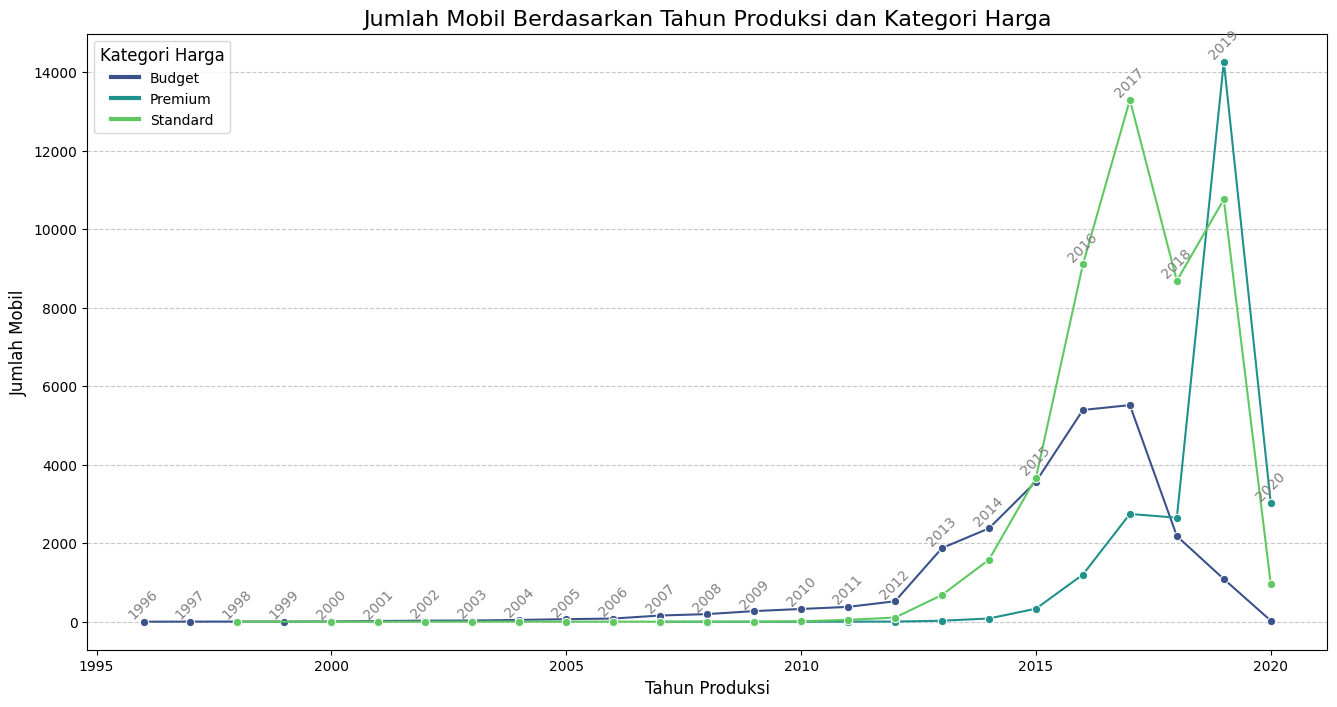

In [374]:
# Visualisasi hasil menggunakan line chart
plt.figure(figsize=(16, 8))
palette = sns.color_palette("viridis", n_colors=len(df_year['Price Category'].unique()))
ax = sns.lineplot(data=df_year, x="Year of Built", y='Total', hue='Price Category', marker='o', palette=palette)

# Menetapkan judul dan label pada sumbu
plt.title('Jumlah Mobil Berdasarkan Tahun Produksi dan Kategori Harga', fontsize=16)
plt.xlabel('Tahun Produksi', fontsize=12)
plt.ylabel('Jumlah Mobil', fontsize=12)

# Membuat legenda
legend = ax.legend(title='Kategori Harga', title_fontsize='12', loc='upper left')
for line in legend.get_lines():
    line.set_linewidth(3)

plt.grid(axis='y', linestyle='--', alpha=0.7)

# Membuat label
for year, group in df_year.groupby("Year of Built"):
    plt.text(group["Year of Built"].iloc[0], group['Total'].max(), str(year), ha='center', va='bottom', fontsize=10, color='gray', rotation=45)

plt.show()

In [375]:
# Menghitung korelasi antara `Year` dan `Price` menggunakan metode Spearman
correlation_coefficient = df_all["Year"].corr(df_all["Price"], method='spearman')
rounded_coefficient = round(correlation_coefficient, 2)

# Membuat tabel korelasi untuk ditampilkan
correlation_table = [["Fitur", "Korelasi dengan Harga"], ["Year", rounded_coefficient]]
correlation_table_md = tabulate(correlation_table, headers='firstrow', tablefmt='pretty')

print(correlation_table_md)

+-------+-----------------------+
| Fitur | Korelasi dengan Harga |
+-------+-----------------------+
| Year  |          0.6          |
+-------+-----------------------+


**Insight**
|Price Category |Insight|
|---------------|-------|
| Budget     | Tahun pembuatan 2016 hingga 2017 menjadi tahun dengan mobil bekas terbanyak dari daftar berdasarkan kategori harga ini.|
| Standard   | Tahun pembuatan 2017 dan 2019 menjadi tahun dengan mobil bekas terbanyak dari daftar berdasarkan kategori harga ini.|
| Premium    | Tahun pembuatan 2019 menjadi tahun dengan mobil bekas terbanyak dari daftar berdasarkan kategori harga ini.|

Terdapat pola di mana semakin baru mobil maka semakin tinggi juga harga mobil tersebut. Hal ini sesuai dengan hasil uji korelasi Spearman yang bernilai 0.6, atau moderate positif. Untuk mengetahui karakteristik mobil bekas yang paling banyak terdaftar dalam daftar mobil bekas, kita tidak bisa hanya mengetahui karakteristik tahun pembuatan mobil tersebut. Untuk itu, kami akan mencari informasi lebih dalam dengan menjawab pertanyaan-pertanyaan lainnya.

### **Apa merek mobil yang paling sering muncul pada daftar berdasarkan kategori harga?**

In [376]:
# Mengelompokkan DataFrame berdasarkan `Brand` dan `Price Category`
df_brand = (
    df_all
    .groupby(['Brand', 'Price Category'])
    .agg({
        'Price': 'median',  # Menghitung nilai median harga
        'Model': 'count'    # Menghitung jumlah mobil
    })
    .reset_index()
    .rename(columns={'Model': 'Total', 'Price': 'Median of Price'})  # Mengganti nama kolom
    .sort_values(['Price Category', 'Total'], ascending=[True, False])  # Mengurutkan hasil berdasarkan 'Price Category'dan 'Total'
)

# Menambahkan kolom 'Percentage' yang berisi persentase dari jumlah mobil untuk setiap kategori harga
df_brand['Percentage'] = df_brand.groupby('Price Category')['Total'].transform(lambda x: (x / x.sum()) * 100).round(2)

# Menampilkan hasil
display(df_brand[df_brand['Price Category']=='Budget'])
display(df_brand[df_brand['Price Category']=='Standard'])
display(df_brand[df_brand['Price Category']=='Premium'])

Brand Price Category  Median of Price  Total  Percentage
21       Vauxhall         Budget           7830.0   6657       27.52
6            Ford         Budget           8289.0   6387       26.40
18         Toyota         Budget           7995.0   2962       12.25
24     Volkswagen         Budget           8499.0   2859       11.82
9         Hyundai         Budget           7695.0   1920        7.94
15          Skoda         Budget           7999.0   1814        7.50
3             BMW         Budget           8500.0    666        2.75
0            Audi         Budget           8500.0    570        2.36
12  Mercedes Benz         Budget           8129.5    354        1.46

Brand Price Category  Median of Price  Total  Percentage
8            Ford       Standard          13592.5  10672       21.81
26     Volkswagen       Standard          14741.5   8098       16.55
23       Vauxhall       Standard          12495.0   6467       13.22
14  Mercedes Benz       Standard          16990.0   5234       10.70
2            Audi       Standard          15995.0   4927       10.07
5             BMW       Standard          15536.5   4808        9.83
17          Skoda       Standard          13990.0   3396        6.94
20         Toyota       Standard          12995.0   2949        6.03
11        Hyundai       Standard          14495.0   2372        4.85

Brand Price Category  Median of Price  Total  Percentage
13  Mercedes Benz        Premium          27884.5   7258       29.82
4             BMW        Premium          27990.0   5164       21.22
1            Audi        Premium          28066.0   5016       20.61
25     Volkswagen        Premium          25000.0   3920       16.11
16          Skoda        Premium          24700.0    973        4.00
19         Toyota        Premium          23495.0    772        3.17
7            Ford        Premium          23699.0    701        2.88
10        Hyundai        Premium          23990.0    431        1.77
22       Vauxhall        Premium          22499.0    101        0.42

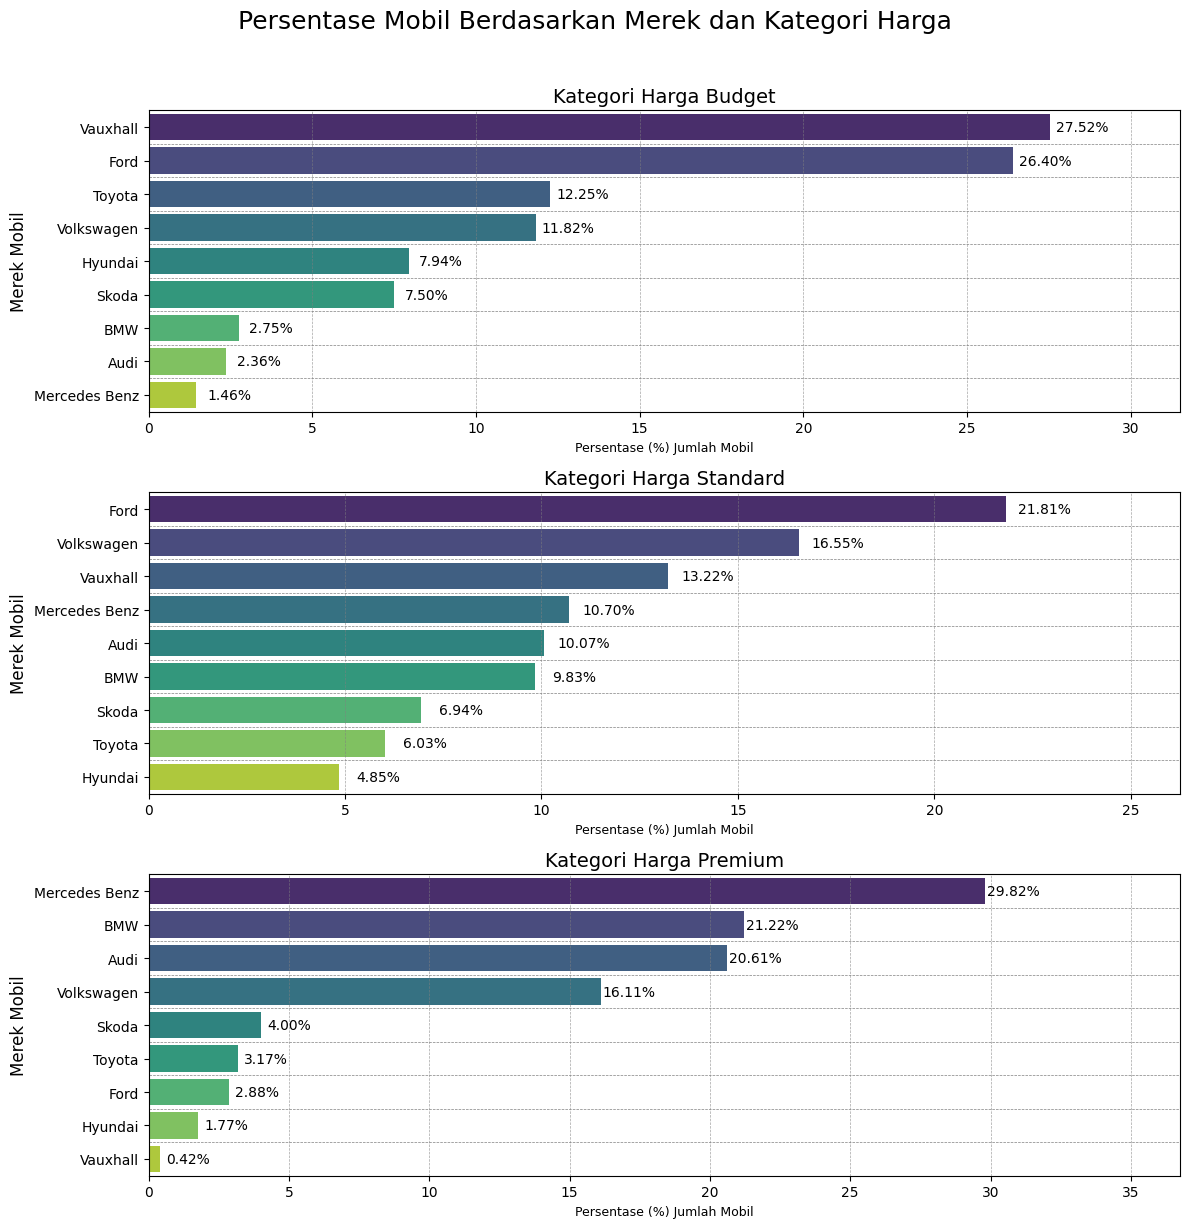

In [377]:
plt.figure(figsize=(12, 12))
order = ['Budget', 'Standard', 'Premium']

# Membuat subplot untuk setiap Price Category sesuai dengan urutan yang ditentukan
for i, price_class in enumerate(order, 1):
    plt.subplot(3, 1, i)
    
    subset_df = df_brand[df_brand['Price Category'] == price_class]
    ax = sns.barplot(data=subset_df, y='Brand', x='Percentage', palette="viridis")
    
    # Menampilkan nilai persentase di dalam setiap bar
    for p, percentage in zip(ax.patches, subset_df['Percentage']):
        ax.annotate(f'{percentage:.2f}%', (p.get_width() + 1, p.get_y() + p.get_height() / 2), ha='center', va='center', fontsize=10, color='black')

    ax.set_title(f'Kategori Harga {price_class}', fontsize=14)
    
    # Tambahkan garis horizontal dan vertikal untuk meningkatkan keterbacaan
    for i, brand in enumerate(subset_df['Brand']):
        ax.axhline(i + 0.5, color='gray', linewidth=0.5, linestyle='--', zorder=1)
    for value in ax.get_xticks():
        ax.axvline(value, color='gray', linewidth=0.5, linestyle='--', zorder=1, alpha=0.7)
    
   # Menambahkan label pada tiap plot
    plt.xlabel('Persentase (%) Jumlah Mobil', fontsize=9)
    plt.ylabel('Merek Mobil', fontsize=12)

plt.suptitle('Persentase Mobil Berdasarkan Merek dan Kategori Harga', y=1.02, fontsize=18)
plt.tight_layout()
plt.show()

**Insight**
|Price Category |Insight|
|---------------|-------|
| Budget     | Kurang lebih 53% jumlah mobil pada kategori harga ini didominasi oleh mobil merek Vauxhall dengan presentase 27.52% dan diikuti Ford dengan presentase 26.40%.|
| Standard   | Kurang lebih 50% jumlah mobil pada kategori harga ini didominasi oleh mobil merek Ford dengan 21.81%, Volkswagen dengan 16.55%, dan Vauxhall dengan 13.22%. Merek Ford dan Vauxhall sering muncul di dua kategori harga berbeda, yaitu budget dan standard.|
| Premium    | Kurang lebih 70% jumlah mobil pada kategori harga ini didominasi oleh mobil merek Mercedes Benz dengan 29.80%, BMW dengan 21.22%, dan Audi dengan 20.61%|

Menurut sumber yang kami peroleh dari website [gosho.my](https://gosho.my/uks-best-selling-car-brands-up-until-july-2023/), merek-merek yang sering muncul pada tiap kategori harga, yaitu Vauxhall, Ford, Volkswagen, Mercedes Benz, BMW, dan Audi, adalah merek-merek yang secara konsisten selama dua semester (2022 dan 2023) selalu masuk sebagai 10 merek mobil bekas terlaris di Inggris Raya. Untuk mengetahui karakteristik mobil bekas yang paling banyak terdaftar dalam daftar mobil bekas, kita tidak bisa hanya mengetahui karakteristik merek mobil tersebut. Untuk itu, kami akan mencari informasi lebih dalam dengan menjawab pertanyaan-pertanyaan lainnya.

### **Apa model mobil yang umumnya muncul dalam daftar berdasarkan kategori harga?**

In [378]:
# Mengelompokkan DataFrame berdasarkan 'Model' dan 'Price Category'
df_model = (
    df_all
    .groupby(['Model', 'Price Category'])
    .agg({'Brand': 'count'})  # Menghitung jumlah mobil
    .reset_index()
    .rename(columns={'Brand': 'Total', 'Price': 'Median of Price'})     # Mengganti nama kolom
    .sort_values(['Total'], ascending=[False])  # Mengurutkan hasil
)

# Menambahkan kolom 'Percentage'
total_by_category = df_model.groupby('Price Category')['Total'].transform('sum')
df_model['Percentage'] = (df_model['Total'] / total_by_category * 100).round(2)

# Menampilkan hasil
display(df_model[df_model['Price Category']=='Budget'].head(10))
display(df_model[df_model['Price Category']=='Standard'].head(10))
display(df_model[df_model['Price Category']=='Premium'].head(10))

Model Price Category  Total  Percentage
137  Fiesta         Budget   3309       13.68
118   Corsa         Budget   2673       11.05
67     Aygo         Budget   1770        7.32
60    Astra         Budget   1290        5.33
256    Polo         Budget   1237        5.11
140   Focus         Budget   1091        4.51
183     I10         Budget    944        3.90
135   Fabia         Budget    878        3.63
395   Yaris         Budget    873        3.61
361      Up         Budget    696        2.88

Model Price Category  Total  Percentage
142     Focus       Standard   3322        6.79
169      Golf       Standard   3322        6.79
139    Fiesta       Standard   3168        6.48
258      Polo       Standard   1981        4.05
244   Mokka X       Standard   1944        3.97
223      Kuga       Standard   1890        3.86
27    A Class       Standard   1590        3.25
78    C Class       Standard   1439        2.94
62      Astra       Standard   1348        2.76
2    1 Series       Standard   1273        2.60

Model Price Category  Total  Percentage
77     C Class        Premium   2145        8.81
125    E Class        Premium   1199        4.93
168       Golf        Premium   1006        4.13
10    3 Series        Premium    960        3.94
343     Tiguan        Premium    951        3.91
152  GLC Class        Premium    917        3.77
26     A Class        Premium    810        3.33
271         Q5        Premium    680        2.79
268         Q3        Premium    676        2.78
16    5 Series        Premium    596        2.45

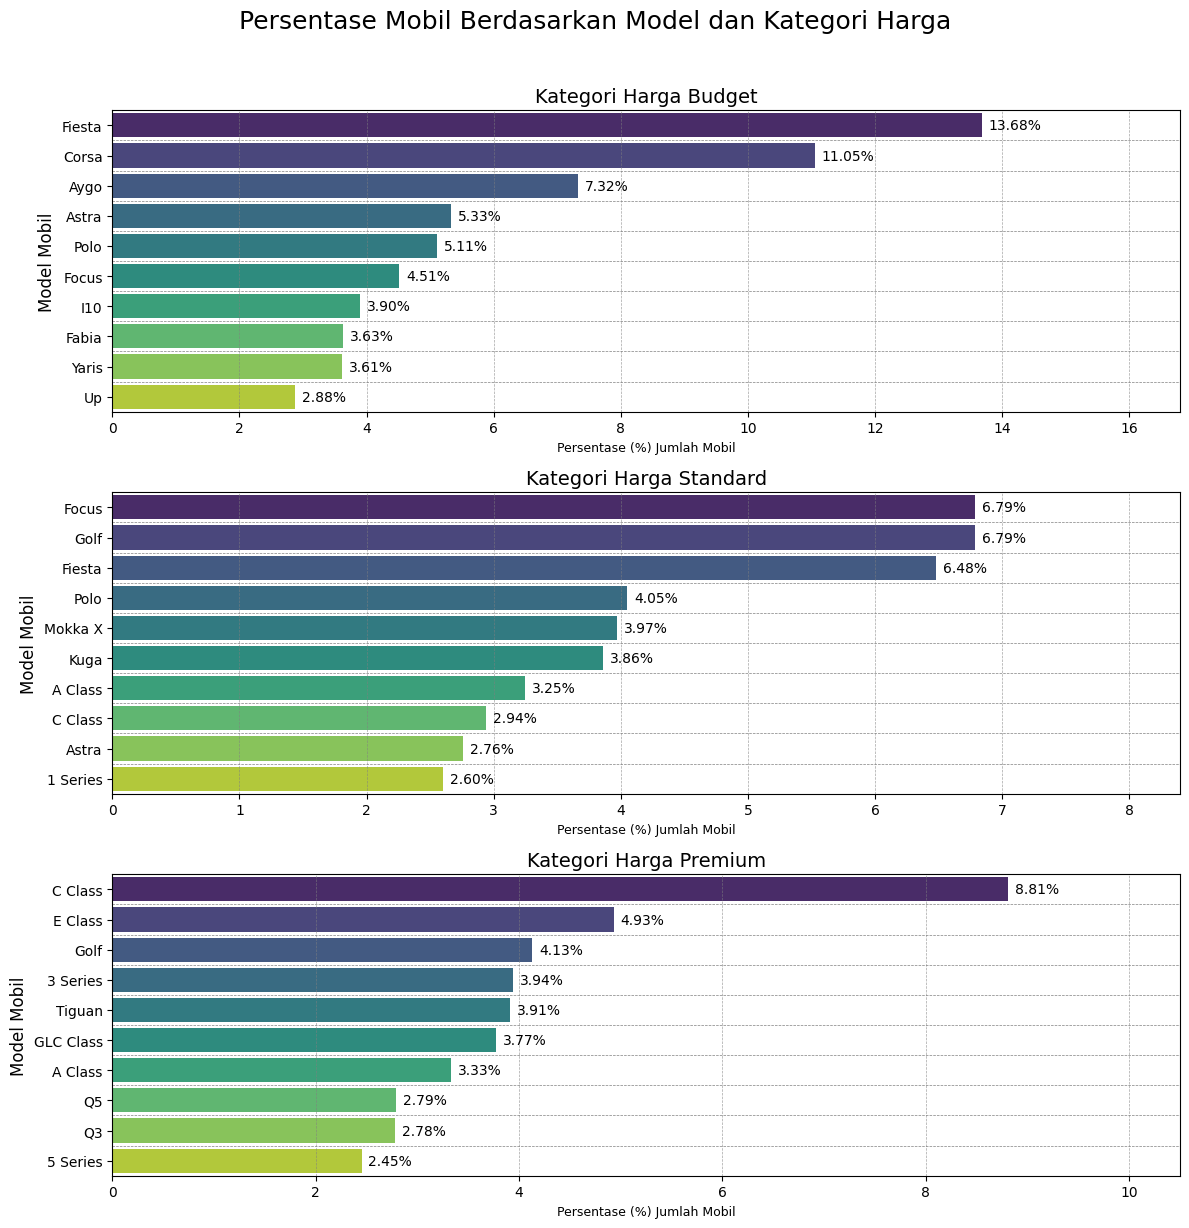

In [379]:
plt.figure(figsize=(12, 12))
order = ['Budget', 'Standard', 'Premium']

# Membuat subplot untuk setiap Price Category sesuai dengan urutan yang ditentukan
for i, price_class in enumerate(order, 1):
    plt.subplot(3, 1, i)

    subset_df = df_model[df_model['Price Category'] == price_class]
    
    # Sort 'Percentage' dan mengambil top 10
    subset_df = subset_df.sort_values(by='Percentage', ascending=False).head(10)
    
    ax = sns.barplot(data=subset_df, y='Model', x='Percentage', palette="viridis")

    # Menampilkan nilai persentase di dalam setiap bar
    for p, percentage in zip(ax.patches, subset_df['Percentage']):
        ax.annotate(f'{percentage:.2f}%', (p.get_width(), p.get_y() + p.get_height() / 2), ha='left', va='center', fontsize=10, color='black', xytext=(5, 0), textcoords='offset points')

    ax.set_title(f'Kategori Harga {price_class}', fontsize=14)

    # Tambahkan garis horizontal dan vertikal untuk meningkatkan keterbacaan
    for i, model in enumerate(subset_df['Model']):
        ax.axhline(i + 0.5, color='gray', linewidth=0.5, linestyle='--', zorder=1)
    for value in ax.get_xticks():
        ax.axvline(value, color='gray', linewidth=0.5, linestyle='--', zorder=1, alpha=0.7)

    # Menambahkan label pada tiap plot
    plt.xlabel('Persentase (%) Jumlah Mobil', fontsize=9)
    plt.ylabel('Model Mobil', fontsize=12)

plt.suptitle('Persentase Mobil Berdasarkan Model dan Kategori Harga', y=1.02, fontsize=18)
plt.tight_layout()
plt.show()

**Insight**
|Price Category |Insight|
|---------------|-------|
| Budget     | Model mobil Ford Fiesta menjadi model mobil terbanyak pada kategori harga ini dengan presentase 13.68% dan diikuti oleh model Volkswagen Corsa dengan 11.05%.|
| Standard   | Model mobil Ford Focus dan Volkswagen Golf menjadi model mobil terbanyak pada kategori harga ini dengan presentase sama yaitu 6.79%.|
| Premium    | Model mobil Mercedes Benz C-Class menjadi model mobil terbanyak pada kategori harga ini dengan presentase 8.81%.|

Berdasarkan [Euro Car Segment](https://en.wikipedia.org/wiki/Euro_Car_Segment), kategori budget didominasi oleh model mobil yang memiliki bentuk tipe [mini](https://en.wikipedia.org/wiki/A-segment) hingga [small](https://en.wikipedia.org/wiki/B-segment). Dengan cangkupan tipe tersebut, mobil pada kategori harga ini cocok untuk konsumen yang membutuhkan kendaraan kecil yang cocok digunakan di perkotaan dengan kenyamanan dan harga yang ekonomis.

Berdasarkan Euro Car Segment, model mobil pada kategori harga standard memiliki variasi bentuk yang lebih beragam. Kategori harga ini didominasi oleh model mobil yang memiliki bentuk tipe small hingga [medium](https://en.wikipedia.org/wiki/C-segment). Dengan cangkupan tipe tersebut, mobil pada kategori harga ini cocok untuk konsumen yang lebih memprioritaskan fleksibilitas. Mobil pada kategori harga ini mampu digunakan di medan yang lebih beragam namun masih menawarkan kenyamanan dan harga yang ekonomis.Berikut adalah contoh model mobil yang memiliki tipe bentuk small dan medium:
- Ford Focus dan Volkswagen Golf yang memiliki bentuk mobil tipe medium.
- Ford Fiesta dan Volkswagen Polo yang memiliki bentuk mobil tipe small.
- Vauxhall Mokka dan Ford Kuga yang memiliki bentuk mobil tipe [sub-compact SUV](https://en.wikipedia.org/wiki/Subcompact_crossover_SUV) atau berdasarkan Euro Car Segment termsuk pada tipe sport-utility.

Kategori premium didominasi oleh model mobil yang memiliki bentuk tipe [large](https://en.wikipedia.org/wiki/D-segment) hingga [executive](https://en.wikipedia.org/wiki/E-segment). Dengan cangkupan tipe tersebut, mobil pada kategori harga ini cocok untuk konsumen yang mencari mobil dengan teknologi canggih, desain mewah, dan performa mesin tinggi. Contoh model mobil yang memiliki tipe large dan executve adalah:
- Audi Q5 yang memiliki bentuk mobil tipe large.
- Mercedes Benz E-Class yang memiliki bentuk mobil tipe executive.

Dapat kita simpulkan bahwa model mobil memiliki peran dalam menentukan kategori harga karena tiap model memiliki fiturnya tersendiri yang dicocokan dengan preferensi dan kebutuhan seorang pembeli. Untuk mengetahui karakteristik mobil bekas yang paling banyak terdaftar dalam daftar mobil bekas, kami akan mencari informasi lebih dalam dengan menjawab pertanyaan-pertanyaan lainnya.

### **Jenis transmisi mobil mana yang sering muncul dalam daftar berdasarkan kategori harga?**

In [380]:
# Mengelompokkan DataFrame berdasarkan 'Price Category' dan jenis 'Transmission'
df_transmission = (
    df_all
    .groupby(['Price Category', 'Transmission'])
    .agg({'Brand': 'count'})
    .reset_index()
    .rename(columns={'Brand': 'Total'})  
    .sort_values(by=['Price Category', 'Total'], ascending=[True, False])  # Mengurutkan hasil berdasarkan 'Price Category' dan jenis 'Transmission'
)

# Menghitung persentase jumlah mobil untuk setiap klasifikasi 'Price Category'
df_transmission['Percentage'] = (
    df_transmission
    .groupby('Price Category')['Total']
    .transform(lambda x: (x / x.sum()) * 100) 
    .round(2)
)

# Menampilkan hasil
display(df_transmission[df_transmission['Price Category']=='Budget'].head(10))
display(df_transmission[df_transmission['Price Category']=='Standard'].head(10))
display(df_transmission[df_transmission['Price Category']=='Premium'].head(10))

Price Category Transmission  Total  Percentage
1         Budget       Manual  21854       90.35
0         Budget    Automatic   1607        6.64
2         Budget    Semi-Auto    728        3.01

Price Category Transmission  Total  Percentage
7       Standard       Manual  30425       62.19
6       Standard    Automatic   9752       19.93
8       Standard    Semi-Auto   8746       17.88

Price Category Transmission  Total  Percentage
5        Premium    Semi-Auto  12808       52.63
3        Premium    Automatic   8469       34.80
4        Premium       Manual   3059       12.57

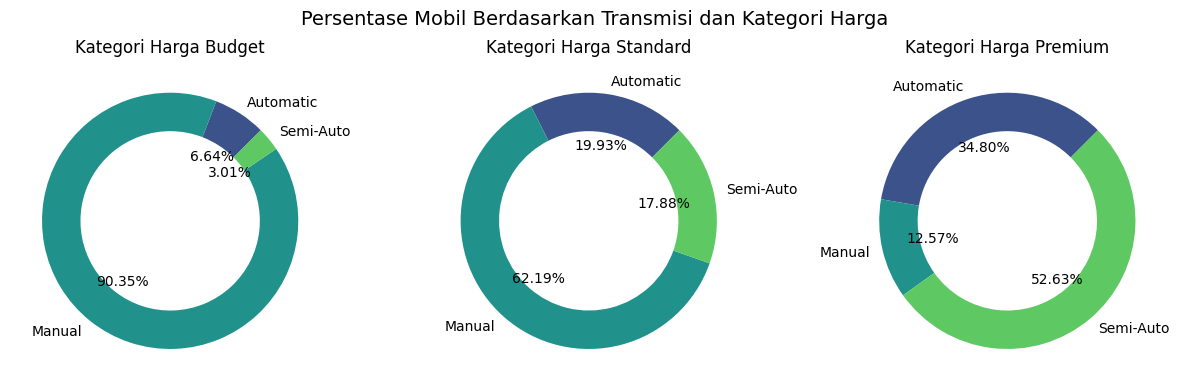

In [381]:
# Visualisai 'Price Category' berdasarkan jenis 'Transmission menggunakan pie chart
plt.figure(figsize=(12, 4))

# Tata letak grafik
ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)

# Mendefinisikan urutan Price Category
price_class_order = ['Budget', 'Standard', 'Premium']

# Membuat pie chart untuk setiap Price Category
for ax, price_class in zip([ax1, ax2, ax3], price_class_order):
    subset_df = df_transmission[df_transmission['Price Category'] == price_class]
    
    # Menghitung persentase untuk setiap jenis Transmission
    percentages = subset_df.groupby('Transmission')['Percentage'].sum().reset_index()
    
    colors = sns.color_palette("viridis", n_colors=len(percentages))
    ax.pie(percentages['Percentage'], labels=percentages['Transmission'], autopct='%1.2f%%', colors=colors, startangle=45, wedgeprops=dict(width=0.3))
    ax.set_title(f'Kategori Harga {price_class}', fontsize=12)

plt.suptitle('Persentase Mobil Berdasarkan Transmisi dan Kategori Harga', fontsize=14)
plt.tight_layout()
plt.show()

**Insight**
|Price Category |Insight|
|---------------|-------|
| Budget     | 90.35% mobil pada kategori harga ini didominasi oleh mobil dengan transmisi manual. Mobil pada kategori harga ini selain menawarkan harga yang terjangkau, kategori harga ini juga lebih cocok untuk konsumen yang terbiasa dengan kendaraan kontrol manual yang ingin memiliki kontrol penuh terhadap kinerja mesin.|
| Standard   | 62.19% mobil pada kategori harga ini masih didominasi oleh mobil dengan transmisi manual. Variasi jenis transmisi mulai terlihat pada kategori harga ini dengan jumlah 19.93% adalah mobil dengan transmisi automatic dan 17.78% adaah mobil dengan transmisi semi-auto. Mobil pada kategori harga ini menawarkan lebih banyak variasi untuk konsumen namun, mayoritas masih menggunakan transmisi manual.|
| Premium    | 52.63% mobil pada kategori harga ini didominasi oleh mobil dengan transmisi semi-auto. Diikuti oleh mobil bertransmisi automatic dengan 34.80%. Kategori harga ini lebih cocok untuk konsumen yang tidak terbiasa dengan transmisi manual atau konsumen yang ingin memiliki kontrol ekstra terhadap mesin, namun masih memiliki kenyamanan dari sebuah mobil automatic.|

### **Jenis bahan bakar mana yang sering muncul dalam daftar berdasarkan kategori harga?**

In [382]:
# Mengelompokkan DataFrame berdasarkan 'Price Category' dan 'Fuel Type'
df_fuelType = (
    df_all
    .groupby(['Price Category', 'Fuel Type'])
    .agg({'Brand': 'count'}) 
    .reset_index()
    .rename(columns={'Brand': 'Total'})  # Mengganti nama kolom
    .sort_values(by=['Price Category', 'Total'], ascending=[True, False])  # Mengurutkan hasil berdasarkan 'Price Category' dan 'Fuel Type'
)

# Menghitung persentase jumlah mobil setiap 'Price Category' dan menambahkannya ke dalam kolom 'Percentage'
df_fuelType['Percentage'] = (
    df_fuelType
    .groupby('Price Category')['Total']
    .transform(lambda x: (x / x.sum()) * 100)
    .round(2)
)

# Menampilkan hasil
display(df_fuelType[df_fuelType['Price Category']=='Budget'].head(10))
display(df_fuelType[df_fuelType['Price Category']=='Standard'].head(10))
display(df_fuelType[df_fuelType['Price Category']=='Premium'].head(10))

Price Category Fuel Type  Total  Percentage
3         Budget    Petrol  18286       75.60
0         Budget    Diesel   5711       23.61
1         Budget    Hybrid    136        0.56
2         Budget     Other     56        0.23

Price Category Fuel Type  Total  Percentage
13       Standard    Petrol  25932       53.01
9        Standard    Diesel  21037       43.00
11       Standard    Hybrid   1824        3.73
12       Standard     Other    109        0.22
10       Standard  Electric     21        0.04

Price Category Fuel Type  Total  Percentage
4        Premium    Diesel  13595       55.86
8        Premium    Petrol   9645       39.63
6        Premium    Hybrid   1018        4.18
7        Premium     Other     73        0.30
5        Premium  Electric      5        0.02

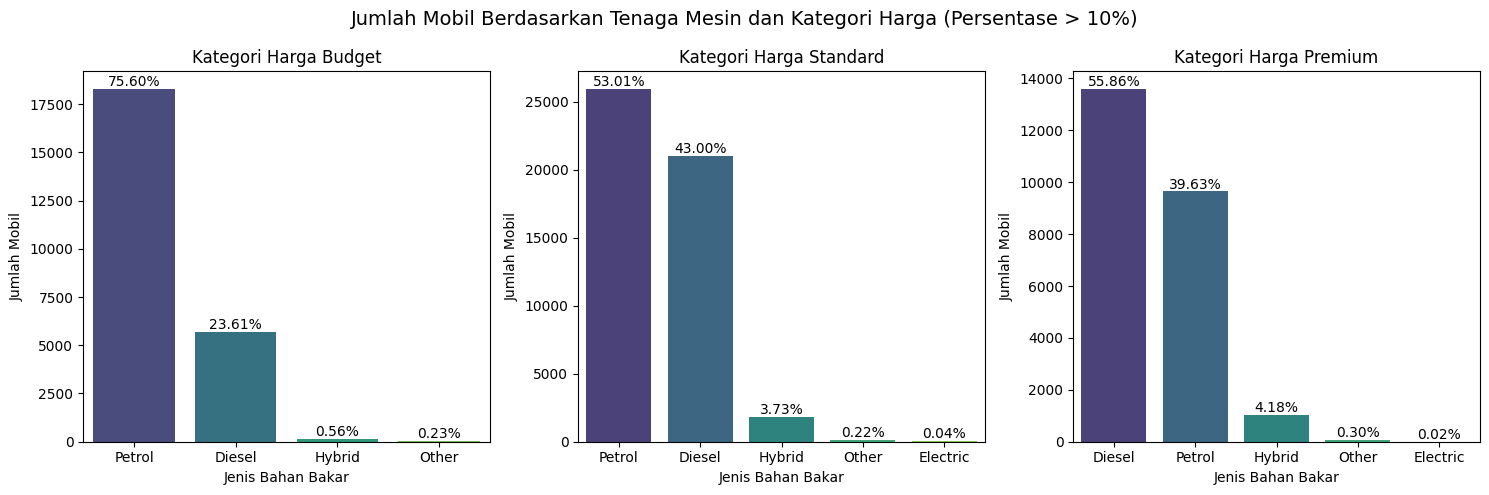

In [383]:
plt.figure(figsize=(15, 5))

# Menyiapkan urutan kategori harga
price_categories = ['Budget', 'Standard', 'Premium']

# Membuat bar plot untuk setiap kategori harga
for i, price_category in enumerate(price_categories):
    subset_df = df_fuelType[(df_fuelType['Price Category'] == price_category)]

    # Membuat subplot
    plt.subplot(1, 3, i+1)
    ax = sns.barplot(x='Fuel Type', y='Total', data=subset_df, palette='viridis')
    
    # Menampilkan nilai persentase di dalam setiap bar
    for p, percentage in zip(ax.patches, subset_df['Percentage']):
        ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
    
    # Menambahkan judul dan label
    plt.title(f'Kategori Harga {price_category}')
    plt.xlabel('Jenis Bahan Bakar')
    plt.ylabel('Jumlah Mobil')

plt.suptitle('Jumlah Mobil Berdasarkan Tenaga Mesin dan Kategori Harga (Persentase > 10%)', fontsize=14)
plt.tight_layout()
plt.show()

**Insight**
|Price Category |Insight|
|---------------|-------|
| Budget     | Mayoritas mobil pada kategori harga ini menggunakan bahan bakar petrol dengan proporsi 75.6%. Mobil dengan bahan bakar hybrid dan other memiliki proporsi masing-masing 0.56% dan 0.23%. Tidak ada mobil dengan bahan bakar electric pada kategori harga ini. Mobil pada kategori harga ini dapat menawarkan harga yang lebih terjangkau karena menggunakan bahan bakar petrol yang secara harga lebih terjangkau, umum, dan, secara beban [perawatan lebih ekonomis dibandingkan diesel](https://www.carwow.co.uk/guides/choosing/petrol-diesel-878#gref).|
| Standard   | Mayoritas mobil pada kategori harga ini masih menggunakan bahan bakar petrol dengan proporsi lebih sedikit yaitu 53.01%. Diikuti oleh mobil berbahan bakar diesel dengan proporsi 43%. Mobil dengan bahan bakar hybrid mengalami peningkatan dengan proporsi 3.37%. Mobil dengan bahan bakar electric muncul dengan proporsi 0.04%. Mobil pada kategori harga ini menawarkan lebih banyak variasi untuk konsumen. Namun, tetap cenderung menawarkan opsi bahan bakar yang umum. |
| Premium    | Mayoritas mobil pada kategori harga ini menggunakan bahan bakar diesel dengan proporsi 55.86%. Diikuti oleh mobil berbahan bakar petrol dengan proporsi 39.59%. Mobil dengan bahan bakar hybrid kembali mengalami peningkatan dengan proporsi 4.26%. Sementara mobil dengan bahan bakar electric memiliki proporsi 0.02%. Kendaraan pada kategori harga ini membutuhkan bahan bakar yang cocok untuk mesin bertorsi tinggi, sehingga cocok dengan preferensi konsumen yang menginginkan performa tinggi dari mobilnya.|

### **Berapa tenaga mesin yang sering digunakan mobil dalam daftar berdasarkan kategori harga?**

In [384]:
# Visualisai 'Price Category' berdasarkan 'Engine Size' menggunakan bar plot
df_engineSize = (
    df_all
    .groupby(['Price Category', 'Engine Size'])
    .agg({'Brand': 'count'})
    .reset_index()
    .rename(columns={'Brand': 'Total'}) 
    .sort_values(['Engine Size'], ascending=[True])  # Mengurutkan hasil berdasarkan 'Engine Size' menggunakan bar plot
)

# Menghitung persentase jumlah untuk setiap 'Price Category dan menambahkannya ke dalam kolom 'Percentage'
df_engineSize['Percentage'] = (
    df_engineSize
    .groupby('Price Category')['Total']
    .transform(lambda x: (x / x.sum()) * 100)
    .round(2)
)

# Memfilter DataFrame untuk Price Categories dengan persentase di atas 10%
df_budget = df_engineSize[(df_engineSize['Price Category'] == 'Budget') & (df_engineSize['Percentage'] > 10)]
df_standard = df_engineSize[(df_engineSize['Price Category'] == 'Standard') & (df_engineSize['Percentage'] > 10)]
df_premium = df_engineSize[(df_engineSize['Price Category'] == 'Premium') & (df_engineSize['Percentage'] > 10)]

# Menampilkan Engine Size untuk Budget
display(df_budget)
median_budget = df_all[df_all['Price Category'] == 'Budget']['Engine Size'].median()
print(f'Dengan Median Engine Size Kktegori budget sebesar = {median_budget}')

# Menampilkan Engine Size untuk Standard
display(df_standard)
median_standard = df_all[df_all['Price Category'] == 'Standard']['Engine Size'].median()
print(f'Dengan Median Engine Size kategori standard sebesar = {median_standard}')

# Menampilkan Engine Size untuk Premium
display(df_premium)
median_premium = df_all[df_all['Price Category'] == 'Premium']['Engine Size'].median()
print(f'Dengan Median Engine Size kategori premium sebesar = {median_premium}')

Price Category  Engine Size  Total  Percentage
0         Budget          1.0   7653       31.64
2         Budget          1.2   4024       16.64
4         Budget          1.4   4240       17.53
6         Budget          1.6   3112       12.87

Dengan Median Engine Size Kktegori budget sebesar = 1.3


Price Category  Engine Size  Total  Percentage
64       Standard          1.0   9168       18.74
68       Standard          1.4   6283       12.84
69       Standard          1.5   7170       14.66
73       Standard          2.0  12670       25.90

Dengan Median Engine Size kategori standard sebesar = 1.5


Price Category  Engine Size  Total  Percentage
35        Premium          1.5   2707       11.12
39        Premium          2.0  12251       50.34
47        Premium          3.0   4217       17.33

Dengan Median Engine Size kategori premium sebesar = 2.0


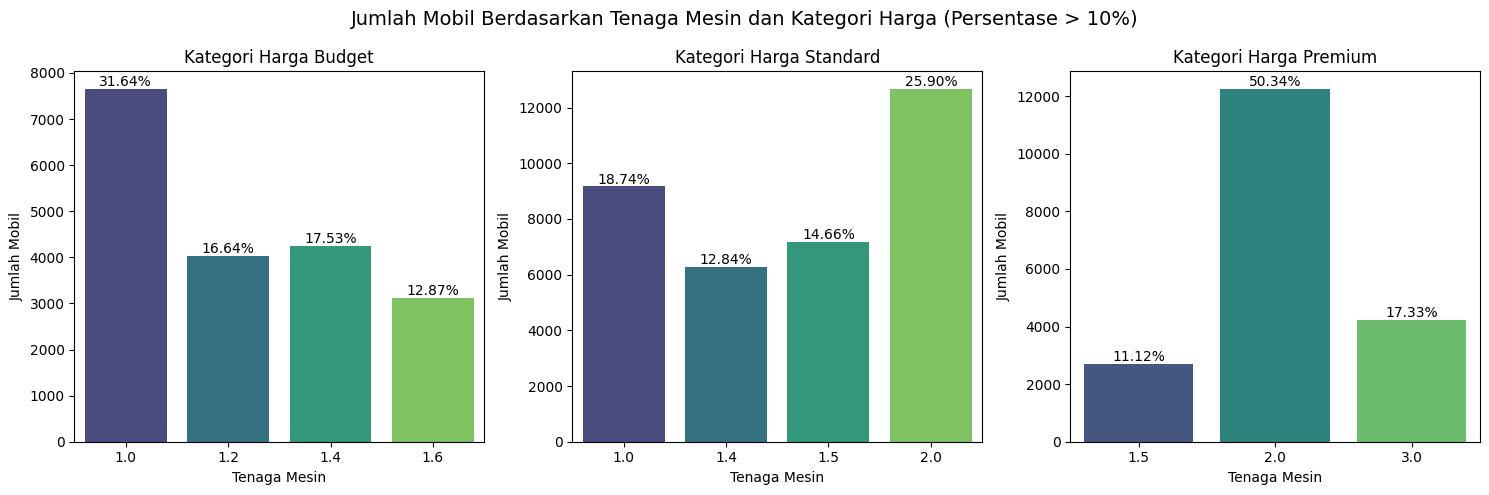

In [385]:
plt.figure(figsize=(15, 5))

# Menyiapkan urutan kategori harga
price_categories = ['Budget', 'Standard', 'Premium']

# Membuat bar plot untuk setiap kategori harga dengan data yang memiliki persentase di atas 10%
for i, price_category in enumerate(price_categories):
    subset_df = df_engineSize[(df_engineSize['Price Category'] == price_category) & (df_engineSize['Percentage'] > 10)]

    # Membuat subplot
    plt.subplot(1, 3, i+1)
    ax = sns.barplot(x='Engine Size', y='Total', data=subset_df, palette='viridis')
    
    # Menampilkan nilai persentase di dalam setiap bar
    for p, percentage in zip(ax.patches, subset_df['Percentage']):
        ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
    
    # Menambahkan judul dan label
    plt.title(f'Kategori Harga {price_category}')
    plt.xlabel('Tenaga Mesin')
    plt.ylabel('Jumlah Mobil')

plt.suptitle('Jumlah Mobil Berdasarkan Tenaga Mesin dan Kategori Harga (Persentase > 10%)', fontsize=14)
plt.tight_layout()
plt.show()

**Insight**
|Price Category |Insight|
|---------------|-------|
| Budget     | Mesin dengan tenaga 1000cc (1.0), 1200cc (1.2), 1400cc (1.4), dan 1600cc(1.6) menjadi tenaga mesin yang sering digunakan mobil pada kategori harga ini. Tenaga mesin pada kategori harga ini memiliki nilai tengah sebesar 1.3. Kategori harga ini cocok untuk konsumen yang memiliki preferensi mobil dengan mesin bertenaga kecil hingga menegah karena, umumnya [mesin dengan tenaga kecil hingga menegah dapat efisiensi bahan bakar yang lebih baik](https://news.motability.co.uk/motoring/what-do-engine-sizes-actually-mean/#:~:text=However%2C%20the%20general%20rule%20is,less%20powerful%20as%20a%20result.).|
| Standard   | Mesin dengan tenaga 1.0, 1.4, 1.5, dan 2.0 menjadi tenaga mesin yang sering digunakan mobil pada kategori harga ini. Tenaga mesin pada kategori harga ini memiliki nilai tengah sebesar 1.5. Kategori harga ini dapat mencangkup banyak jenis prefrensi konsumen karena, kategori ini memiliki mobil dengan mesin bertenaga kecil hingga besar.|
| Premium    | Mesin dengan tenaga 1.5, 2.0, dan 3.0 menjadi tenaga mesin yang sering digunakan mobil pada kategori harga ini. Tenaga mesin pada kategori harga ini memiliki nilai tengah sebesar 2.0. Kategori harga ini cocok untuk konsumen yang mengutamakan performa mesin tinggi karena, kategori ini memiliki mobil dengan mesin bertenaga menengah hingga besar.|

### **Berapa rentang nilai efisiensi bahan bakar per mil (Mpg) yang sering muncul dalam daftar berdasarkan kategori harga?**

In [386]:
# Mengelompokkan DataFrame berdasarkan 'Price Category' dan 'Fuel Efficiency'
df_fuelEfficiency = (
    df_all
    .groupby(['Price Category', 'Fuel Efficiency'])
    .agg({'Brand': 'count'}) 
    .reset_index()
    .rename(columns={'Brand': 'Total'})  # Mengganti nama kolom
    .sort_values(by=['Price Category', 'Total'], ascending=[True, False])  # Mengurutkan hasil berdasarkan 'Price Category' dan 'Fuel Efficiency'
)

# Menghitung persentase jumlah mobil setiap 'Price Category' dan menambahkannya ke dalam kolom 'Percentage'
df_fuelEfficiency['Percentage'] = (
    df_fuelEfficiency
    .groupby('Price Category')['Total']
    .transform(lambda x: (x / x.sum()) * 100)
    .round(2)
)

# Menampilkan hasil
display(df_fuelEfficiency[df_fuelEfficiency['Price Category']=='Budget'])
display(df_fuelEfficiency[df_fuelEfficiency['Price Category']=='Standard'])
display(df_fuelEfficiency[df_fuelEfficiency['Price Category']=='Premium'])

Price Category Fuel Efficiency  Total  Percentage
0         Budget       Excellent  11581       47.88
2         Budget            Good   8310       34.35
1         Budget            Fair   4280       17.69
3         Budget            Poor     18        0.07

Price Category Fuel Efficiency  Total  Percentage
8        Standard       Excellent  19452       39.76
10       Standard            Good  15501       31.68
9        Standard            Fair  13949       28.51
11       Standard            Poor     21        0.04

Price Category Fuel Efficiency  Total  Percentage
5        Premium            Fair  15695       64.49
6        Premium            Good   5016       20.61
4        Premium       Excellent   3425       14.07
7        Premium            Poor    200        0.82

In [387]:
# Mengurutkan kategori 'Fuel Efficiency' dari yang terbaik
custom_order = ['Poor', 'Fair', 'Good', 'Excellent']
df_all['Fuel Efficiency'] = pd.Categorical(df_all['Fuel Efficiency'], categories=custom_order, ordered=True)

# Mengelompokkan DataFrame berdasarkan 'Price Category' dan 'Fuel Efficiency'
df_fuelEfficiency = (
    df_all
    .groupby(['Price Category', 'Fuel Efficiency'])
    .agg({'Brand': 'count'}) 
    .reset_index()
    .rename(columns={'Brand': 'Total'})  # Mengganti nama kolom
    .sort_values(by=['Price Category', 'Fuel Efficiency', 'Total'], ascending=[True, True, False])  # Mengurutkan hasil berdasarkan 'Price Category', 'Fuel Efficiency', dan 'Total'
)

# Menghitung persentase jumlah mobil setiap 'Price Category' dan menambahkannya ke dalam kolom 'Percentage'
df_fuelEfficiency['Percentage'] = (
    df_fuelEfficiency
    .groupby('Price Category')['Total']
    .transform(lambda x: (x / x.sum()) * 100)
    .round(2)
)

# Menampilkan hasil
display(df_fuelEfficiency[df_fuelEfficiency['Price Category']=='Budget'])
display(df_fuelEfficiency[df_fuelEfficiency['Price Category']=='Standard'])
display(df_fuelEfficiency[df_fuelEfficiency['Price Category']=='Premium'])

Price Category Fuel Efficiency  Total  Percentage
0         Budget            Poor     18        0.07
1         Budget            Fair   4280       17.69
2         Budget            Good   8310       34.35
3         Budget       Excellent  11581       47.88

Price Category Fuel Efficiency  Total  Percentage
8        Standard            Poor     21        0.04
9        Standard            Fair  13949       28.51
10       Standard            Good  15501       31.68
11       Standard       Excellent  19452       39.76

Price Category Fuel Efficiency  Total  Percentage
4        Premium            Poor    200        0.82
5        Premium            Fair  15695       64.49
6        Premium            Good   5016       20.61
7        Premium       Excellent   3425       14.07

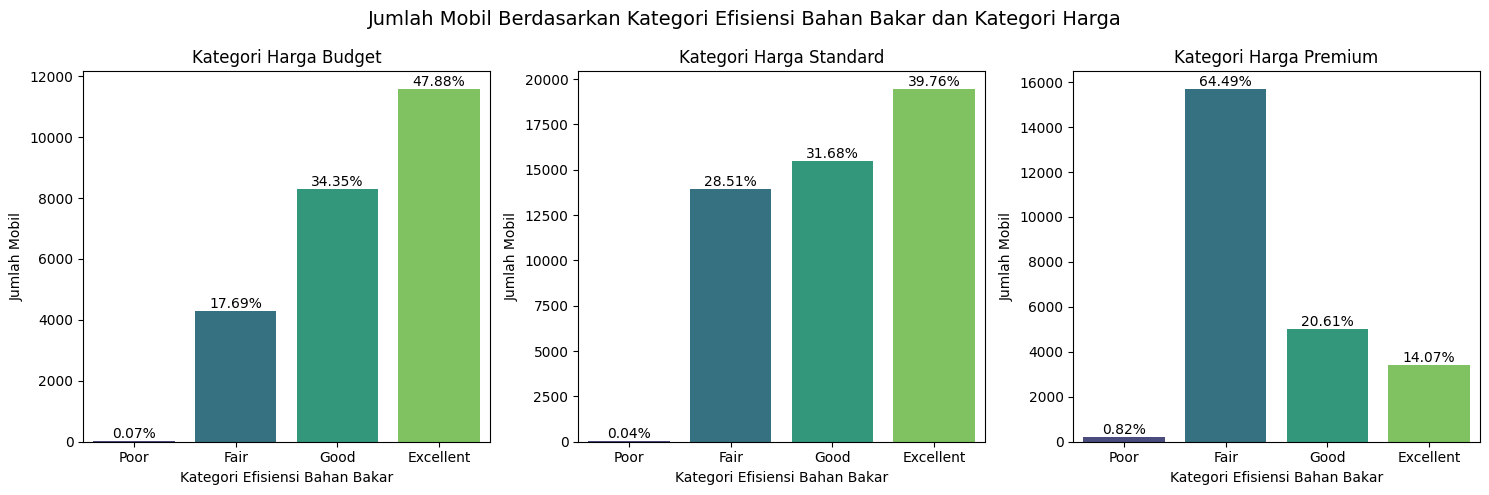

In [388]:
plt.figure(figsize=(15, 5))

# Menyiapkan urutan kategori harga
price_categories = ['Budget', 'Standard', 'Premium']

# Membuat bar plot untuk setiap kategori harga dengan data yang memiliki persentase di atas 10%
for i, price_category in enumerate(price_categories):
    subset_df = df_fuelEfficiency[(df_fuelEfficiency['Price Category'] == price_category)]

    # Membuat subplot
    plt.subplot(1, 3, i+1)
    ax = sns.barplot(x='Fuel Efficiency', y='Total', data=subset_df, palette='viridis')
    
    # Menampilkan nilai persentase di dalam setiap bar
    for p, percentage in zip(ax.patches, subset_df['Percentage']):
        ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
    
    # Menambahkan judul dan label
    plt.title(f'Kategori Harga {price_category}')
    plt.xlabel('Kategori Efisiensi Bahan Bakar')
    plt.ylabel('Jumlah Mobil')

plt.suptitle('Jumlah Mobil Berdasarkan Kategori Efisiensi Bahan Bakar dan Kategori Harga', fontsize=14)
plt.tight_layout()
plt.show()

**Insight**

Fuel Efficiency Category
|Category |Mpg|
|---------|---|
| Excellent| > 60.0|
| Good     | < 60.0 & >= 50.0|
| Fair     | < 50.0 & >= 25.0|
| Poor     | > 25.0|

<br>

|Price Category |Insight|
|---------------|-------|
| Budget     | 47.88% mobil pada kategori harga ini bertefisiensi baha bakar excellent. Diikuti oleh efisiensi baha bakar good dengan proporsi 34.35%. Kendaraan di kategori harga ini cocok untuk konsumen yang mencari kendaraan yang memiliki efesiensi bahan bakar yang sangat baik. |
| Standard   | 39.76% mobil pada kategori harga ini bertefisiensi baha bakar excellent. Diikuti oleh efisiensi baha bakar good dengan proporsi 31.68%. Kendaraan di kategori harga ini masih cocok untuk konsumen yang mencari kendaraan yang memiliki efesiensi bahan bakar yang sangat baik.|
| Premium    | 64.49% mobil pada kategori harga ini bertefisiensi baha bakar fair. Kendaraan di kategori harga ini memiliki efesiensi bahan bakar yang cukup baik. Sangat cocok untuk konsumen yang tidak menjadikan efisiensi bahan bakar sebagai faktor utama dalam membeli mobil dan kemungkinan mengutamakan faktor lain seperti kemewahan, kekuatan besar, dan lain-lainnya.|

### **Analysts Conclusion**

Dapat kita simpulkan bahwa karakteristik mobil berdasarkan kategori harga budget, standard, dan premium adalah sebagai berikut:

**1. Tahun Pembuatan:**

|Price Category |Summary|
|---------------|-------|
| Budget     | Mobil pada kategori harga ini didominasi oleh mobil produksi tahun 2016 hingga 2017 dengan total jumlah sekitar 18.000.|
| Standard   | Mobil pada kategori harga ini didominasi oleh mobil produksi tahun 2017 hingga 2019 dengan total jumlah sekitar 23.000 .|
| Premium    | Mobil pada kategori harga ini didominasi oleh mobil produksi tahun 2019 dengan total jumlah sekitar 14.266.|

**2. Merek Kendaraan:**

|Price Category |Summary|
|---------------|-------|
| Budget     | Mobil pada kategori harga ini didominasi oleh mobil merek Vauxhall dan diikuti Ford. Hal ini menunjukan bahwa merek-merek tersebut menawarkan mobil yang ekonomis.|
| Standard   | Mobil pada kategori harga ini didominasi oleh mobil merek Ford, Volkswagen dan Vauxhall.|
| Premium    | Mobil pada kategori harga ini didominasi oleh Mercedes Benz, BMW, dan Audi. Hal ini menunjukan bahwa merek-merek tersebut menawarkan mobil yang memiliki teknologi canggih, desain mewah, dan performa mesin tinggi. |

**3. Model Kendaraan:**

|Price Category |Summary|
|---------------|-------|
| Budget     | Berdasarkan model yang ada, kendaraan pada kategori ini cocok untuk konsumen yang menginginkan kendaraan dengan tipe bentuk mini hingga small dengan gaya hatchback yang sangat cocok digunakan di perkotaan.|
| Standard   | Berdasarkan model yang ada, kendaraan pada kategori ini memiliki variasi yang lebih beragam sehingga, dapat memenuhi keinginan konsumen yang beragam. Kategori harga ini memiliki mobil kendaraan dengan tipe bentuk small hingga medium yang cocok digunakan di perkotaan dan medan yang lebih beragam.|
| Premium    | Berdasarkan model yang ada, kendaraan pada kategori ini cocok untuk konsumen yang menginginkan kendaraan dengan teknologi canggih, desain mewah, dan performa mesin tinggi. Kategori harga ini menawarkan tipe bentuk large hingga executive.|

**4. Transmisi:**

|Price Category |Summary|
|---------------|-------|
| Budget     | Mobil pada kategori harga ini selain menawarkan harga yang terjangkau, juga lebih cocok untuk konsumen yang terbiasa dengan kendaraan kontrol manual yang ingin memiliki kontrol penuh terhadap kinerja mesin.|
| Standard   | Mobil pada kategori harga ini menawarkan lebih banyak variasi untuk konsumen. Kategori ini lebih dapat memenuhi keinginan konsumen yang beragam dibanding kategori harga lain. |
| Premium    | Mobil pada kategori harga ini lebih cocok untuk konsumen yang tidak terbiasa dengan transmisi manual atau konsumen yang ingin memiliki kontrol ekstra terhadap mesin, namun masih memiliki kenyamanan dari sebuah mobil automatic dengan mobil bertransmisi semi-auto.|

**5. Bahan Bakar:**

|Price Category |Summary|
|---------------|-------|
| Budget     | Mobil pada kategori harga ini dapat menawarkan harga yang lebih terjangkau karena, mayoritas menggunakan bahan bakar petrol yang secara harga lebih terjangkau, umum, dan, secara beban perawatan lebih ekonomis dibandingkan diesel.|
| Standard   | Mobil pada kategori harga ini menawarkan lebih banyak variasi untuk konsumen namun, tetap cenderung menawarkan opsi bahan bakar yang umum seperti petrol dan diesel. |
| Premium    | Mobil pada kategori harga ini pada umumnya membutuhkan bahan bakar yang cocok untuk mesin bertorsi tinggi karena, mayoritas menggunakan bahan bakar diesel sehingga cocok untuk konsumen yang menginginkan performa tinggi dari mesin mobilnya.|

**6. Tenaga Mesin:**

|Price Category |Summary|
|---------------|-------|
| Budget     | Kategori harga ini cocok untuk konsumen yang memiliki preferensi mobil dengan mesin bertenaga kecil hingga menegah. Pada umumnya mesin dengan tenaga kecil hingga menegah dapat efisiensi bahan bakar yang lebih baik.|
| Standard   | Kategori harga ini dapat mencangkup banyak jenis prefrensi konsumen karena, kategori ini memiliki mobil dengan mesin bertenaga kecil hingga besar.|
| Premium    | Kategori harga ini cocok untuk konsumen yang mengutamakan performa mesin tinggi karena, kategori ini memiliki mobil dengan mesin bertenaga menengah hingga besar.|

**7. Efisiensi Bahan Bakar:**

|Price Category |Summary|
|---------------|-------|
| Budget     | Mayoritas kendaraan di kategori harga ini dapat memberikan nilai efesiensi bahan bakar lebih besar dari 60.0. Kendaraan ini cocok untuk konsumen yang mencari kendaraan yang memiliki efesiensi bahan bakar yang sangat baik. |
| Standard   | Kendaraan di kategori harga ini dapat memberikan nilai efesiensi bahan bakar mulai dari 60.0 hingga dibawah atau sama dengan 25.0. Kendaraan di kategori harga ini cocok untuk konsumen yang mencari kendaraan yang memiliki efesiensi bahan bakar yang sangat baik hingga cukup baik.|
| Premium    | Mayoritas kendaraan di kategori harga ini dapat memberikan nilai efesiensi bahan bakar lebih kecil dari 50.0 hingga dibawah atau sama dengan 25.0. Kendaraan cocok untuk konsumen yang tidak menjadikan efisiensi bahan bakar sebagai faktor utama dalam membeli mobil dan kemungkinan mengutamakan faktor lain seperti kemewahan, kekuatan besar, dan lain-lainnya.|


## **Data Preparation**

In [389]:
# Traintest split
from sklearn.model_selection import train_test_split

# Multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Preprocessing
from category_encoders import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler
from imblearn.pipeline import Pipeline

### **Identify Problem in Dataset**

In [390]:
def calculate_outliers(df_all, column):
    Q1 = df_all[column].quantile(0.25)
    Q3 = df_all[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_all[(df_all[column] < lower_bound) | (df_all[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

numerical_feature = df_all.drop(['Price'], axis=1)

In [391]:
outlier_data = []

for column in numerical_feature.describe().columns:
    outlier_result, lower_bound, upper_bound = calculate_outliers(numerical_feature, column)
    total_outlier = len(outlier_result)
    outlier_percentage = round(total_outlier / len(numerical_feature[column]) * 100, 1)
    outlier_data.append([column, total_outlier, outlier_percentage, lower_bound, upper_bound])

outlier_df = pd.DataFrame(outlier_data, columns=["Features", "Total Outliers", "Percentage (%)", "Lower Bound", "Upper Bound"])


numerical_feature = numerical_feature.select_dtypes(include=['number'])

# Calculate VIF for each predictor variable
vif = pd.DataFrame()
vif["Features"] = numerical_feature.columns
vif["VIF"] = [variance_inflation_factor(numerical_feature.values, i) for i in range(numerical_feature.shape[1])]


# Gabungkan dua DataFrame berdasarkan kolom "Features"
combined_df = pd.merge(outlier_df, vif, on="Features")
combined_df["Lower Bound"] = combined_df["Lower Bound"].apply(lambda x: '%.2f' % x)
combined_df["Upper Bound"] = combined_df["Upper Bound"].apply(lambda x: '%.2f' % x)


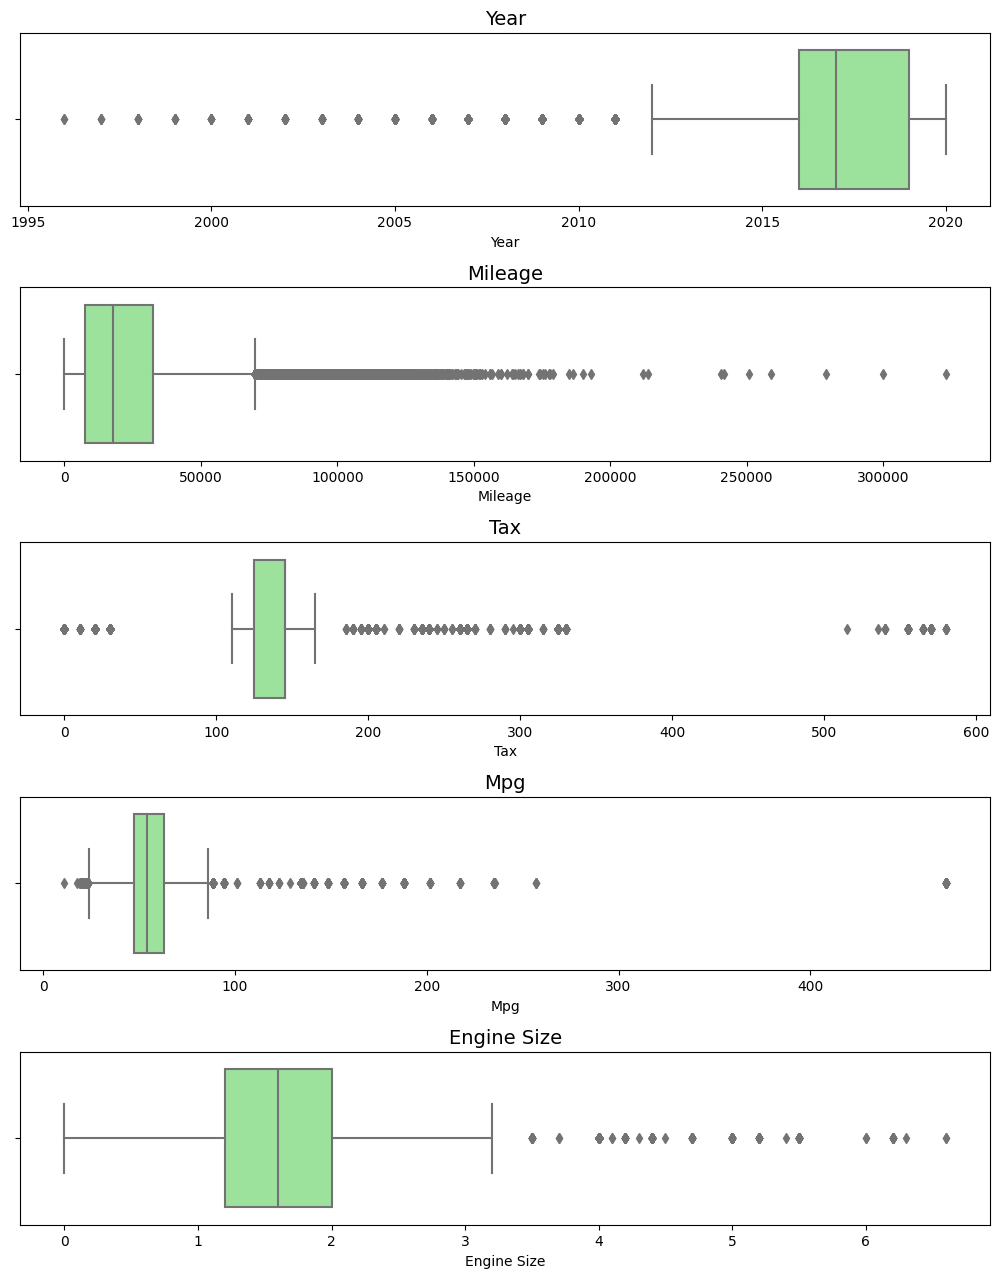

Features  Total Outliers  Percentage (%) Lower Bound Upper Bound  \
0         Year            1729             1.8     2011.50     2023.50   
1      Mileage            3832             3.9   -29549.50    69742.50   
2          Tax           28526            29.3       95.00      175.00   
3          Mpg             892             0.9       23.55       86.35   
4  Engine Size             648             0.7       -0.00        3.20   

         VIF  
0  38.643259  
1   2.439804  
2   6.239881  
3  16.564744  
4  11.674807

In [392]:
# Visualisasi dari distribusi data
numerical_feature

plt.figure(figsize=(20, 15))

# Melooping setiap kolom numerik untuk membuat subplot histogram dan boxplot
for index, col in enumerate(numerical_feature):
    # Boxplot
    plt.subplot(6, 2, index*2 + 2)
    sns.boxplot(x=df_all[col], color='lightgreen')
    plt.title(f'{col}', size=14)
    plt.xlabel(col)

plt.tight_layout()
plt.show()

display(combined_df)

**Insight**

| Features       | Insight                                                                                                            |
|----------------|--------------------------------------------------------------------------------------------------------------------|
| Year           | - Terdapat 1729 outlier, atau sekitar 1.8% dari total data.                                                      |
|                | - Features ini memiliki VIF yang sangat tinggi sebesar 38.57, menunjukkan adanya multicollinearity yang signifikan. |
| Mileage        | - Terdapat 3832 outlier, atau sekitar 3.9% dari total data.                                                      |
|                | - Tidak terindikasi adanya multicollinearity (VIF < 10).                                                         |
| Tax            | - Terdapat 28536 outlier, atau sekitar 29.3% dari total data.                                                   |
|                | - Tidak terindikasi adanya multicollinearity (VIF < 10).                                                         |
| Mpg            | - Terdapat 925 outlier, atau sekitar 0.9% dari total data.                                                       |
|                | - Features ini memiliki VIF yang cukup tinggi sebesar 16.51, menunjukkan adanya multicollinearity yang signifikan. |
| Engine Size    | - Terdapat 648 outlier, atau sekitar 0.7% dari total data.                                                       |
|                | - Features ini memiliki VIF yang cukup tinggi sebesar 11.68, menunjukkan adanya multicollinearity yang signifikan. |


#### **Delete Multicolinearity**

Pada tahapan ini kami mencoba untuk menghapus kolom Mpg, untuk menghilangkan salah satu penyebab Multicolinearity. Keputusan ini kami ambil karena menurut pengalaman kami diantara **'Year', 'Engine Size' dan 'Mpg'**, feature Mpg kurang begitu diperhatikan (dibandingkan **'Year'** dan **'Engine Size'**) dalam pengambilan keputusan seseorang membeli mobil.

In [393]:
numerical_features = df_all.drop(['Price', 'Mpg'], axis=1)
numerical_features = numerical_features.select_dtypes(include=['number'])

vif_no_Mpg = pd.DataFrame()
vif_no_Mpg["Features"] = numerical_features.columns
vif_no_Mpg["VIF"] = [variance_inflation_factor(numerical_features.values, i) for i in range(numerical_features.shape[1])]

print('VIF Sebelum Menghapus Kolom Mpg')
display(vif)

print('VIF Setelah Menghapus Kolom Mpg')
display(vif_no_Mpg)


VIF Sebelum Menghapus Kolom Mpg


Features        VIF
0         Year  38.643259
1      Mileage   2.439804
2          Tax   6.239881
3          Mpg  16.564744
4  Engine Size  11.674807

VIF Setelah Menghapus Kolom Mpg


Features        VIF
0         Year  12.466608
1      Mileage   2.398496
2          Tax   5.358774
3  Engine Size  11.363013

**Explaination**

Setelah menghapus kolom Mpg, nilai VIF (Variance Inflation Factor) menunjukkan penurunan yang signifikan, menandakan bahwa korelasi antara fitur-fitur yang tersisa dan fitur lainnya telah berkurang. Ini berarti bahwa fitur Mpg sebelumnya memberikan kontribusi yang cukup besar terhadap multicollinearity dalam data. Dengan menghapusnya, kita berhasil mengurangi tingkat interdependensi antara fitur-fitur, sehingga model diharapkan akan  lebih stabil dan dapat diandalkan.

### **Handling The Problem**

| Masalah             | Fitur        | Tindakan                                                                                         |
|---------------------|--------------|--------------------------------------------------------------------------------------------------|
| Outlier             | Year, Mileage, Tax, Engine Size | Kami memutuskan untuk tidak menghapus outlier, karena outlier tersebut berisi informasi penting dalam permodelan prediksi harga mobil. |
| Multikolinieritas   | Year, MPG, Engine Size | Bandingkan MAPE model setelah menghapus fitur dengan VIF tinggi (Year: 38.57, MPG: 16.51, Engine Size: 11.68). Salah satu kolom (**'Mpg'**) kami akan lakukan drop. |

Kami menemukan adanya outlier pada beberapa feature seperti Year, Mileage, Tax, dan Engine Size. Meskipun demikian, kami memutuskan untuk mempertahankan data outlier ini karena kami percaya bahwa informasi yang terkandung dalam outlier tersebut mungkin penting untuk pemodelan prediksi harga mobil.

Selanjutnya, kami mengidentifikasi masalah multikolinieritas, terutama antara fitur Year, MPG (Miles Per Gallon), dan Engine Size. Untuk mengatasi hal ini, kami memilih untuk menghapus fitur 'Mpg' dari model. Namun, kami juga berencana untuk melakukan benchmarking model pada tahap cross-validasi dengan dan tanpa fitur 'Mpg' untuk mengevaluasi dampak dari penghapusan fitur tersebut terhadap kinerja keseluruhan model prediksi harga mobil. Dengan melakukan hal ini, kami berharap dapat membuat keputusan yang lebih terinformasi tentang penggunaan fitur 'Mpg' dalam pemodelan kami.

### **Feature Engineering**

#### **Drop Column**

Kolom `Fuel Efficiency` dan `Price Category` hanya kami gunakan untuk keperluan data analysys. Kolom tersebut kami peroleh berdasarkan penglompokan range Mpg (Fuel Efficiency) dan Price (Price Category). Jika kami biarkan kolom tersebut dapat menyebabkan multicolinearity. Selain itu, kami juga membuat 2 variabel untuk menyimpan dataset yang dilakukan drop `Mpg` dan tanpa dilakukan drop `Mpg`.

In [394]:
# Data set tanpa menghapus kolom MPG
data = df_all.drop(['Fuel Efficiency', 'Price Category'], axis=1)

# Data set dengan menghapus kolom MPG
data_no_mpg = df_all.drop(['Fuel Efficiency', 'Mpg', 'Price Category'], axis=1)

**Without Droping `Mpg`**

In [395]:
# Define the features and target variable
X = data.drop('Price', axis=1)
y = data['Price']

# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

**With Droping `Mpg`**

In [396]:
# Define the features and target variable
X1 = data_no_mpg.drop('Price', axis=1)
y1 = data_no_mpg['Price']

# Split train and test data
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state = 0)

#### **Encoding**

| Fitur         | Jenis Encoding   | Alasan                                      |
|---------------|------------------|---------------------------------------------|
| Brand         | One-hot Encoding | Jumlah kategori [<15 cardinality](https://medium.com/mlearning-ai/category-encoders-c2a9bb192f0a) dan tidak memiliki urutan yang jelas  |
| Model         | Binary Encoding  | Jumlah kategori [>15 cardinality](https://medium.com/mlearning-ai/category-encoders-c2a9bb192f0a)   |
| Transmission  | Ordinal Encoding | Memiliki urutan intrinsik (Manual, Semi-Auto, Automatic)  |
| Fuel Type     | Ordinal Encoding | Memiliki urutan intrinsik (Diesel, Petrol, Other, Hybrid, Electric) |

In [397]:
categorical_cols = list(data.select_dtypes(['object','category']).columns)

# menampilkan jumlah unik dan unique values untuk setiap kolom
pd.set_option('display.max_colwidth', None)

# data unik di tiap kolom
listItem = []
for col in categorical_cols :
    listItem.append( [col, data[col].nunique(), data.sort_values(col)[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Values'],
                     data=listItem)
tabel1Desc

Column Name  Number of Unique  \
0         Brand                 9   
1         Model               194   
2  Transmission                 3   
3     Fuel Type                 5   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          Unique Values  
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        [Audi, BMW, Ford, Hyundai, Mercedes Benz, Skoda, Toyota, Vauxhall, Volkswagen]  
1  [1 Series, 180, 2 Series, 200, 220, 3 Series, 4 Series, 5 Series, 6 Series, 7 Series, 8 Series, A Class, A1, A2, A3, A4, A5, A6, A7, A8, Accent, Adam, Agila, Amarok, Amica, Ampera, Antara, Arteon, Astra, Auris, Avensis, Aygo, B Class, B-MAX, Beetle, C Class, C-HR, C-MAX, CC, CL Class, CLA Class, CLC Class, CLK, CLS Class, Caddy, Caddy Life, Caddy Maxi, Caddy Maxi Life, California, Camry, Caravelle, Cascada, Citigo, Combo Life, Corolla, Corsa, Crossland X, E Class, EcoSport, Edge, Eos, Escort, Fabia, Fiesta, Focus, Fox, Fusion, G Class, GL Class, GLA Class, GLB Class, GLC Class, GLE Class, GLS Class, GT86, GTC, Galaxy, Getz, Golf, Golf SV, Grand C-MAX, Grand Tourneo Connect, Grandland X, Hilux, I10, I20, I30, I40, I800, IQ, IX20, IX35, Insignia, Ioniq, Jetta, KA, Ka+, Kadjar, Kamiq, Karoq, ...]  
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        [Automatic, Manual, Semi-Auto]  
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [398]:
ordinal_mapping = [
    {'col': 'Transmission',
    'mapping': {
        'Manual': 1, 
        'Semi-Auto': 2, 
        'Automatic': 3,
        }
    },
    {'col': 'Fuel Type',
    'mapping': {
        'Diesel': 1, 
        'Petrol': 2, 
        'Other': 3, 
        'Hybrid': 4, 
        'Electric': 5,         
        }
    },
]
transformer = ColumnTransformer([
    ('one_hot_encoder', OneHotEncoder(drop='first'), ['Brand']),
    ('binary', BinaryEncoder(), ['Model']),
    ('ordinal', OrdinalEncoder(cols=['Transmission','Fuel Type'], mapping=ordinal_mapping), ['Transmission', 'Fuel Type']),
], remainder='passthrough')


#### **Scaler**

Kami memutuskan untuk menggunakan RobustScaler untuk mengatasi masalah skala yang berbeda serta adanya outlier dalam data kami. Alasan di balik pemilihan RobustScaler adalah karena metodenya tahan terhadap outlier, sehingga nilai-nilai ekstrem tidak akan berdampak besar pada penskalaan data. Dengan menggunakan RobustScaler, kami dapat menjaga stabilitas dan konsistensi penskalaan data, yang memungkinkan model machine learning kami untuk lebih baik menangani distribusi data yang tidak normal atau adanya outliers

In [399]:
# Scaling
robust_scaler = RobustScaler()

## **Modeling Experiment**

Pada tahapan ini kami akan membangun model yang akan digunakan untuk memperediksi harga mobil. Pada tahapan pertama kami akan melakukan cross-validasi, dataset akan dibagi menjadi 6 bagian. Setiap algoritma akan melakukan iterasi untuk mempelajari pola pada setiap bagian dan melakukan validasi silang. Setelah semua iterasi selesai, metrik evaluasi dari masing-masing iterasi dihitung untuk menghasilkan skor akhir. Nilai rata-rata digunakan sebagai penilaian kinerja model. Hasil dari proses cross-validation digunakan untuk memilih model terbaik dan mengevaluasi kinerja setiap model terhadap data test. 

Untuk mencari benchmark model terbaik, kami mengnggunakan 6 algoritma sebagai berikut:

| Model | Deskripsi |
|-|-|
| Decision Tree Regressor (dt) | Model prediksi yang mengambil serangkaian keputusan berdasarkan fitur-fitur yang ada dalam dataset. Secara sederhana model ini membagi data menjadi subset dan membuat prediksi berdasarkan fitur terpenting hingga tidak ada lagi fitur yang dapat membagi data lebih lanjut.
| Random Forest Regressor (rf) | Metode pembelajaran ensemble yang bekerja dengan membangun beberapa pohon keputusan selama data train dan kemudian menggabungkan prediksi dari setiap pohon untuk membuat prediksi akhir. Hal tersebut membantu dalam mengatasi masalah overfitting yang mungkin terjadi pada model tunggal, serta meningkatkan akurasi prediksi secara keseluruhan. |
| XGBoost Regressor (xgboost) | Algoritma gradient boosting yang sangat dioptimalkan untuk tugas regresi. Ini bekerja dengan membangun serangkaian pohon keputusan secara berurutan, dengan setiap pohon berusaha memperbaiki kesalahan prediksi pohon sebelumnya. Prediksi dari semua pohon digabungkan untuk menghasilkan prediksi akhir. |
| CatBoost Regressor (catboost) | Metode ensemble berbasis gradient boosting yang dirancang khusus untuk menangani fitur-fitur kategorikal dengan efisien. Ini dikenal karena kemudahan penggunaannya dan akurasi prediksi yang tinggi. CatBoost mengoptimalkan kinerja dengan secara otomatis menangani kategori, yang memungkinkan fokus pada tuning parameter lainnya. |
| K-Nearest Neighbors Regressor (knn) | Algoritma non-parametrik yang digunakan untuk regresi. Konsep dasarnya adalah saat ingin memprediksi nilai target untuk suatu data baru, KNN mencari k titik data terdekat (tetangga terdekat) dalam ruang fitur berdasarkan kemiripan jarak. Kemudian, nilai target untuk data baru diestimasi dengan mengambil rata-rata nilai target dari k titik data terdekat tersebut. |
| Linear Regression (lr) | Metode yang digunakan untuk memodelkan hubungan antara satu atau lebih variabel independen dengan variabel dependen. Metode ini dilakukan dengan memfitting persamaan linear ke data yang diamati, dengan asumsi bahwa hubungan antar variabel adalah linear. |

In [400]:
# Import library untuk modeling
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

# Import Model
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import  RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from catboost import CatBoostRegressor

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import time

Untuk mengetahui model mana yang paling baik untuk memprediksi harga mobil yang akan dijual di *webuyusedcar* diperlukan metric untuk mengukur keandalan model. Untuk kemudahan dalam interpretasi kami menggunakan MAPE, namun dalam Modeling kami menggunakan metric lainnya seperti MAE dan RMSE. Hal tersebut kami lakukan agar dapat membandingkan performa dari setiap model berdasarkan hasil scoring dari setiap metric tersebut, sehingga model yang didapatkan adalah model yang paling handal. Berdasarkan referensi yang kami telusuri dari sumber [berikut](https://kc.umn.ac.id/id/eprint/22407/4/BAB_II.pdf), semakin kecil nilai MAE, MAPE dan RMSE semakin dapat diterima model tersebut. Dengan kata lain jika kita mendapatkan score MAPE, MAE dan RMSE, maka dapat dikatakan model tersebut adalah model yang paling handal. Sementara untuk metric R-square tidak kami gunakan untuk membandingkan model cross validasi karena menurut sumber yang kami peroleh, [R-square hanya cocok digunakan untuk model simple Linear Regression dengan hanya 1 explanatory variable](https://www.investopedia.com/terms/r/r-squared.asp#toc-r-squared-vs-adjusted-r-squared).

In [401]:
# Define algoritma yang digunakan
linreg = LinearRegression()
knn = KNeighborsRegressor()
dtree = DecisionTreeRegressor(random_state=0)
rf = RandomForestRegressor(random_state=0)
xgb = XGBRegressor(random_state=0)
catboost = CatBoostRegressor(random_state=0)


algo = [
    ('Linear Regression', linreg),
    ('KNN', knn),
    ('Decision Tree', dtree),
    ('Random Forest', rf),
    ('XGBoost', xgb),
    ('CatBoost', catboost)]


In [402]:
def cross_val_test(X_train, y_train, X_test, y_test, scaler, algo):
    list_name = []
    score_mean_MAPE = []
    score_std_MAPE = [] 
    score_mean_MAE = []
    score_std_MAE = []    
    score_mean_RMSE = []
    score_std_RMSE = []
    score_test_rmse = []
    score_test_mae = []
    score_test_mape = []
    score_cv_time = []
    score_test_time = []

    for name, model in algo:
        if name == 'KNN':
            estimator = Pipeline([('preprocessing', transformer), ('scaler', scaler), ('model', model)])
        else:
            estimator = Pipeline([('preprocessing', transformer), ('model', model)])

        crossval = KFold(n_splits=5, shuffle=True, random_state=1)
        
        # Cross-validation
        start_cv_time = time.time()
        model_cv_RMSE = -1 * cross_val_score(estimator, X_train, y_train, cv=crossval, scoring='neg_root_mean_squared_error', error_score='raise')
        model_cv_MAE = -1 * cross_val_score(estimator, X_train, y_train, cv=crossval, scoring='neg_mean_absolute_error', error_score='raise')
        model_cv_MAPE = -1 * cross_val_score(estimator, X_train, y_train, cv=crossval, scoring='neg_mean_absolute_percentage_error', error_score='raise')
        end_cv_time = time.time()
        cv_time = end_cv_time - start_cv_time
        score_cv_time.append(round(cv_time, 3))

        score_mean_RMSE.append(round(model_cv_RMSE.mean(), 3))
        score_std_RMSE.append(round(model_cv_RMSE.std(), 3))
        score_mean_MAE.append(round(model_cv_MAE.mean(), 3))
        score_std_MAE.append(round(model_cv_MAE.std(), 3))
        score_mean_MAPE.append(round(model_cv_MAPE.mean()*100, 3))
        score_std_MAPE.append(round(model_cv_MAPE.std(), 3))   
        
        # Fit and predict on test set
        start_test_time = time.time()
        estimator.fit(X_train, y_train)
        y_pred = estimator.predict(X_test)
        end_test_time = time.time()
        test_time = end_test_time - start_test_time
        score_test_time.append(round(test_time, 3))

        score_test_rmse.append(round(np.sqrt(mean_squared_error(y_test, y_pred)), 3))
        score_test_mae.append(round(mean_absolute_error(y_test, y_pred), 3))
        score_test_mape.append(round(mean_absolute_percentage_error(y_test, y_pred)*100, 3))
        
        # Append nama model
        list_name.append(name)

    # Create summary dataframe
    summary = pd.DataFrame({
        'Model' : list_name,
        'Mean RMSE': score_mean_RMSE,
        'Std RMSE': score_std_RMSE,
        'Mean MAE': score_mean_MAE,
        'Std MAE': score_std_MAE,
        'Mean MAPE (%)': score_mean_MAPE,
        'Std MAPE': score_std_MAPE,
        'Predict Test set RMSE': score_test_rmse,
        'Predict Test set MAE': score_test_mae,
        'Predict Test set MAPE (%)': score_test_mape,
        'CV Time (s)': score_cv_time,
        'Predict Test set Time (s)': score_test_time
    })

    return summary


### **Cross Validation on Benchmark Model Without Droping Mpg**

In [403]:
benchmark1 = cross_val_test(X_train, y_train, X_test, y_test, robust_scaler, algo)
benchmark1.sort_values(['Mean MAPE (%)', 'Mean MAE', 'Mean RMSE'], ascending=[True, True, True])

Learning rate set to 0.078665
0:	learn: 9264.1844588	total: 18.7ms	remaining: 18.6s
1:	learn: 8737.9906879	total: 27.8ms	remaining: 13.9s
2:	learn: 8265.7803292	total: 34.9ms	remaining: 11.6s
3:	learn: 7832.0489443	total: 43.7ms	remaining: 10.9s
4:	learn: 7443.5201277	total: 52.2ms	remaining: 10.4s
5:	learn: 7099.3211109	total: 60.7ms	remaining: 10.1s
6:	learn: 6783.8308575	total: 68.2ms	remaining: 9.67s
7:	learn: 6498.6654896	total: 77.5ms	remaining: 9.61s
8:	learn: 6231.6362649	total: 87.3ms	remaining: 9.61s
9:	learn: 5992.8703051	total: 95.5ms	remaining: 9.45s
10:	learn: 5766.5421895	total: 103ms	remaining: 9.27s
11:	learn: 5567.7214032	total: 111ms	remaining: 9.14s
12:	learn: 5391.9107650	total: 119ms	remaining: 9s
13:	learn: 5238.0928732	total: 126ms	remaining: 8.89s
14:	learn: 5090.4136384	total: 133ms	remaining: 8.75s
15:	learn: 4953.6536702	total: 143ms	remaining: 8.79s
16:	learn: 4829.5336667	total: 150ms	remaining: 8.66s
17:	learn: 4713.5937757	total: 158ms	remaining: 8.63s
1

Model  Mean RMSE  Std RMSE  Mean MAE  Std MAE  Mean MAPE (%)  \
3      Random Forest   2019.175   120.250  1182.138    9.470          7.534   
5           CatBoost   1990.546   130.936  1233.574    5.779          7.789   
4            XGBoost   2039.670   114.743  1257.409    6.654          7.962   
1                KNN   2205.835   116.902  1255.821   11.906          7.964   
2      Decision Tree   2610.594   166.425  1486.298    9.978          9.436   
0  Linear Regression   4632.068    97.673  2935.546   30.391         22.841   

   Std MAPE  Predict Test set RMSE  Predict Test set MAE  \
3     0.001               1983.996              1169.900   
5     0.001               1974.226              1222.128   
4     0.001               2004.499              1238.977   
1     0.001               2086.866              1217.523   
2     0.000               2551.097              1482.325   
0     0.005               4642.477              2942.280   

   Predict Test set MAPE (%)  CV Time (s)  Predict Test set Time (s)  
3                      7.401      505.642                     44.820  
5                      7.655      157.404                     11.997  
4                      7.807       10.118                      0.716  
1                      7.655       39.034                      3.150  
2                      9.332        9.923                      0.827  
0                     22.939        5.261                      0.482

Berdasarkan hasil cross validasi pada dataset tanpa menghapus kolom `Mpg`, terlihat bahwa performa model pada Test set secara keseluruhan lebih baik daripada pada cross-validasi data train. Ini menunjukkan bahwa fitur-fitur pada dataset tidak berlebihan, sehingga tidak menyebabkan overfitting, yang ditandai dengan performa yang baik pada data train tetapi buruk pada data test. 

Mengacu pada tabel diatas kami memperoleh 2 model dengan performa terbaik yaitu: 

1. `Random Forest` menghasilkan score MAPE dan MAE lebih baik dibandingkan model lainnya baik pada train set maupun test set.

| Metric    | Train Set | Test Set |
|-----------|-----------|----------|
| MAPE      | 7.534%    | 7.401%    |
| MAE       | 1182      | 1169.9   |
| RMSE      | 2019.175  | 1983.996 |
| Time (s) | 965.358    | 39.471


2. `Catboost` menghasilkan RMSE dibandingkan model lainnya baik pada train set maupun test set.

| Metric    | Train Set | Test Set |
|-----------|-----------|----------|
| MAPE      | 7.789%     | 7.655%    |
| MAE       | 1233.574  | 1222.128 |
| RMSE      | 1990.546  | 1974.226 |
| Time (s) | 191.287	| 13.690

Kedua model ini memerlukan waktu yang lama untuk proses pelatihan dan evaluasi karena kompleksitasnya yang lebih tinggi dibandingkan dengan model lainnya. Namun, CatBoost menunjukkan kinerja yang baik dengan waktu yang lebih singkat dibandingkan Random Forest. 


### **Cross Validation on Benchmark Model With Droping Mpg**

In [404]:
benchmark2 = cross_val_test(X1_train, y1_train, X1_test, y1_test, robust_scaler, algo)
benchmark2.sort_values(['Mean MAPE (%)', 'Mean MAE', 'Mean RMSE'], ascending=[True, True, True])

Learning rate set to 0.078665
0:	learn: 9260.4557916	total: 7.97ms	remaining: 7.96s
1:	learn: 8731.1640882	total: 15.5ms	remaining: 7.74s
2:	learn: 8251.4383778	total: 22.3ms	remaining: 7.42s
3:	learn: 7819.5704249	total: 29ms	remaining: 7.22s
4:	learn: 7434.5760811	total: 36.3ms	remaining: 7.21s
5:	learn: 7091.2064468	total: 43.5ms	remaining: 7.21s
6:	learn: 6776.8432449	total: 51ms	remaining: 7.24s
7:	learn: 6496.4887345	total: 58.6ms	remaining: 7.27s
8:	learn: 6245.4481535	total: 65.6ms	remaining: 7.23s
9:	learn: 6016.8940849	total: 73.3ms	remaining: 7.26s
10:	learn: 5803.2150620	total: 80.3ms	remaining: 7.21s
11:	learn: 5620.7799637	total: 87.2ms	remaining: 7.18s
12:	learn: 5442.6669410	total: 94ms	remaining: 7.14s
13:	learn: 5282.1052114	total: 101ms	remaining: 7.09s
14:	learn: 5145.1516246	total: 108ms	remaining: 7.1s
15:	learn: 5022.6597374	total: 115ms	remaining: 7.06s
16:	learn: 4902.9818014	total: 122ms	remaining: 7.08s
17:	learn: 4797.4739908	total: 130ms	remaining: 7.08s
18

Model  Mean RMSE  Std RMSE  Mean MAE  Std MAE  Mean MAPE (%)  \
5           CatBoost   2184.310   122.297  1341.738   10.512          8.204   
1                KNN   2359.142   101.538  1373.206   11.729          8.518   
4            XGBoost   2241.695    98.510  1389.000    6.737          8.540   
3      Random Forest   2368.194    74.892  1399.418    8.567          8.580   
2      Decision Tree   2938.817    48.096  1724.122    6.209         10.564   
0  Linear Regression   4674.289    84.127  2998.546   28.757         23.422   

   Std MAPE  Predict Test set RMSE  Predict Test set MAE  \
5     0.001               2142.794              1325.598   
1     0.001               2262.871              1338.664   
4     0.001               2211.430              1374.485   
3     0.001               2298.680              1378.039   
2     0.001               2900.136              1709.934   
0     0.005               4695.961              3001.574   

   Predict Test set MAPE (%)  CV Time (s)  Predict Test set Time (s)  
5                      8.019      151.690                     12.032  
1                      8.223       32.109                      3.053  
4                      8.366        9.126                      0.719  
3                      8.394      454.861                     38.657  
2                     10.415        9.314                      0.764  
0                     23.520        4.908                      0.361

Berdasarkan hasil cross validasi pada dataset dengan menghapus kolom `Mpg`, terlihat bahwa performa model pada Test set secara keseluruhan lebih baik daripada pada cross-validasi data train. Ini menunjukkan bahwa fitur-fitur pada dataset tidak berlebihan, sehingga tidak menyebabkan overfitting, yang ditandai dengan performa yang baik pada data train tetapi buruk pada data test.

Mengacu pada tabel diatas kami memperoleh 2 model dengan performa terbaik yaitu: 


| Model    | Metric    | Train Set | Test Set |
|----------|-----------|-----------|----------|
| CatBoost | MAPE      | 8.204%     | 8.019%    |
|          | MAE       | 1341.738  | 1325.598 |
|          | RMSE      | 2184.310  | 2142.794 |
| KNN      | MAPE      | 8.518%     | 8.223%    |
|          | MAE       | 1373.206  | 1338.664 |
|          | RMSE      | 2359.142  | 2262.871 |


Jika diamati, model CatBoost menunjukkan fleksibilitas yang lebih baik ketika salah satu kolom yang mengandung informasi penting dihapus. Meskipun secara keseluruhan performa model mengalami penurunan ketika kolom "Mpg" dihilangkan, namun Random Forest mungkin lebih sensitif terhadap kolom "Mpg". Sehingga, ketika fitur ini dihapus, penurunan performa model Random Forest cenderung lebih signifikan daripada CatBoost.

### **Comparassion**

In [405]:
benchmark1 =benchmark1.sort_values(['Mean MAPE (%)', 'Mean MAE', 'Mean RMSE'], ascending=[True, True, True]).reset_index()
benchmark2 =benchmark2.sort_values(['Mean MAPE (%)', 'Mean MAE', 'Mean RMSE'], ascending=[True, True, True]).reset_index()

print("Score Benchmark Model ketika tidak menghapus kolom Mpg (High Vif)")
display(benchmark1[['Model', 'Mean MAPE (%)', 'Predict Test set MAPE (%)', 'Mean MAE', 'Predict Test set MAE', 'Mean RMSE', 'Predict Test set RMSE', 'CV Time (s)', 'Predict Test set Time (s)']])

print("\n\nScore Benchmark Model ketika menghapus kolom Mpg (High Vif)")
display(benchmark2[['Model', 'Mean MAPE (%)', 'Predict Test set MAPE (%)', 'Mean MAE', 'Predict Test set MAE', 'Mean RMSE', 'Predict Test set RMSE', 'CV Time (s)', 'Predict Test set Time (s)']])

Score Benchmark Model ketika tidak menghapus kolom Mpg (High Vif)


Model  Mean MAPE (%)  Predict Test set MAPE (%)  Mean MAE  \
0      Random Forest          7.534                      7.401  1182.138   
1           CatBoost          7.789                      7.655  1233.574   
2            XGBoost          7.962                      7.807  1257.409   
3                KNN          7.964                      7.655  1255.821   
4      Decision Tree          9.436                      9.332  1486.298   
5  Linear Regression         22.841                     22.939  2935.546   

   Predict Test set MAE  Mean RMSE  Predict Test set RMSE  CV Time (s)  \
0              1169.900   2019.175               1983.996      505.642   
1              1222.128   1990.546               1974.226      157.404   
2              1238.977   2039.670               2004.499       10.118   
3              1217.523   2205.835               2086.866       39.034   
4              1482.325   2610.594               2551.097        9.923   
5              2942.280   4632.068               4642.477        5.261   

   Predict Test set Time (s)  
0                     44.820  
1                     11.997  
2                      0.716  
3                      3.150  
4                      0.827  
5                      0.482



Score Benchmark Model ketika menghapus kolom Mpg (High Vif)


Model  Mean MAPE (%)  Predict Test set MAPE (%)  Mean MAE  \
0           CatBoost          8.204                      8.019  1341.738   
1                KNN          8.518                      8.223  1373.206   
2            XGBoost          8.540                      8.366  1389.000   
3      Random Forest          8.580                      8.394  1399.418   
4      Decision Tree         10.564                     10.415  1724.122   
5  Linear Regression         23.422                     23.520  2998.546   

   Predict Test set MAE  Mean RMSE  Predict Test set RMSE  CV Time (s)  \
0              1325.598   2184.310               2142.794      151.690   
1              1338.664   2359.142               2262.871       32.109   
2              1374.485   2241.695               2211.430        9.126   
3              1378.039   2368.194               2298.680      454.861   
4              1709.934   2938.817               2900.136        9.314   
5              3001.574   4674.289               4695.961        4.908   

   Predict Test set Time (s)  
0                     12.032  
1                      3.053  
2                      0.719  
3                     38.657  
4                      0.764  
5                      0.361

**Insight**

Berdasarkan percobaan yang kami lakukan ketika menghapus atau tidak menghapus kolom `Mpg`, kami mendapatkan hasil MAPE, MAE, dan RMSE yang lebih baik pada *'cross validation benchmark dan predict to test set'* ketika tidak menghapus penyebab multicolinearity (kolom `Mpg`), Terdapat beberapa kemungkinan mengapa hasil model menunjukkan performa yang lebih baik saat tidak menghapus kolom yang menyebabkan High VIF:

1. Kolom yang memiliki High VIF mungkin juga memiliki informasi yang penting dalam memprediksi target. Meskipun kolom tersebut dapat menyebabkan multicollinearity, informasi yang disampaikannya masih berharga dalam model.

2. Multicolinearity [tidak mempengaruhi algoritma berbasis Decision-Tree dan hanya mempengaruhi model parametric.](https://www.linkedin.com/pulse/multicollinearity-machine-learning-rachit-singh#:~:text=It%20does%20not%20affect%20Tree,%2C%20logistic%20%2C%20Naive%20Bayes%20etc.).

Mengacu kepada hasil perbandingan tersebut kami memperoleh benchmark dengan hasil terbaik (MAPE, MAE, dan RMSE) yaitu **Random Forest** dengan **tidak menghapus kolom `Mpg`**. Meskipun CatBoost menunjukkan stabilitas dalam performa baik ketika mempertahankan atau menghapus kolom `Mpg`, secara keseluruhan, Random Forest memberikan hasil yang lebih baik dalam hal MAPE dan MAE baik pada test set maupun train set.

### **Random Forrest Regressor**

![Random Forest Regression](https://miro.medium.com/v2/resize:fit:828/format:webp/1*ZFuMI_HrI3jt2Wlay73IUQ.png)

Random Forest Regressor adalah algoritma pembelajaran ensemble yang digunakan untuk memprediksi variabel target continue dalam kasus yang kita dalami kali ini adalah harga mobil. Berikut adalah langkah-langkah detail tentang cara kerja Random Forest Regressor:

1. **Pembuatan Pohon Keputusan**: Random Forest Regressor membangun sejumlah pohon keputusan selama proses pelatihan. Setiap pohon ini dibangun secara independen menggunakan subset acak dari data pelatihan dan subset acak dari fitur yang tersedia. Pembuatan pohon dilakukan dengan membagi dataset menjadi subset yang semakin kecil dan homogen berdasarkan nilai-nilai fitur. Proses pembuatan pohon berulang hingga karakteristik penghentian terpenuhi, seperti mencapai kedalaman maksimum atau mencapai jumlah sampel minimum di setiap daun.

2. **Prediksi dari Setiap Pohon**: Setelah pembuatan pohon-pohon keputusan, setiap pohon digunakan untuk membuat prediksi pada data uji. Prediksi dari setiap pohon adalah nilai continue yang mewakili perkiraan variabel target.

3. **Penggabungan Prediksi**: Prediksi dari setiap pohon kemudian digabungkan untuk menghasilkan prediksi akhir. Dalam Random Forest Regressor, nilai prediksi dari setiap pohon diambil rata-ratanya untuk menghasilkan prediksi akhir. Pendekatan ini menghasilkan estimasi yang lebih stabil dan kurang rentang terhadap overfitting daripada model regresi tunggal.

4. **Penanganan Overfitting**: Random Forest Regressor mengatasi masalah overfitting dengan menggunakan teknik seperti pembatasan kedalaman pohon, pengambilan sampel acak, dan penggunaan banyak pohon. Hal ini membantu model untuk tidak terlalu "menghafal" data pelatihan dan memungkinkan generalisasi yang lebih baik pada data uji.

5. **Penanganan Outliers**: Karena Random Forest Regressor menggunakan rata-rata dari prediksi banyak pohon, model ini cenderung lebih tahan terhadap outliers daripada model regresi tunggal. Outliers hanya akan memiliki dampak kecil pada prediksi akhir karena akan dilakukan penggabungan dari banyak estimasi.

### **Hyperparameter Tuning Random Forest Regression**

Pada tahapan ***Cross-Validation*** kami membandingkan performa model ketika menghapus dan menghapus kolom `Mpg` (penyebab high multicolinearity), berdasarkan hasil perbandingan tersebut kami memutuskan untuk melakukan tuning untuk model **Random Forrest** dengan mempertahankan Feature `Mpg`.


Mengacu kepada referensi dari laman [berikut](https://medium.com/@bhatshrinath41/a-comprehensive-guide-to-random-forest-regression-43da559342bf), kami memperoleh beberapa parameter yang bisa digunakan untuk melakukan tuning Random Forest-Regressor, diantaranya: 

| Parameter          | Deskripsi                                                                                           | Saran                                               |
|--------------------|----------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------|
| n_estimators       | Jumlah pohon dalam model yang akan digunakan.                                                       | Jumlah yang lebih besar dapat meningkatkan performa tetapi juga meningkatkan waktu pelatihan.        |
| max_depth          | Jumlah maksimum kedalaman pohon.                                                                    | Pohon yang lebih dalam dapat menangkap pola yang lebih kompleks dalam data, tetapi juga rentang terhadap overfitting. |
| min_samples_split  | Jumlah minimum sampel yang dibutuhkan untuk melakukan split.                                         | Nilai yang lebih besar dapat mencegah overfitting, tetapi juga dapat membuat model kurang fleksibel.|
| min_samples_leaf   | Jumlah minimum sampel yang dibutuhkan di setiap simpul terakhir (leaf) dari pohon keputusan.        | Nilai yang lebih besar dapat mencegah overfitting, tetapi juga dapat membuat model kurang fleksibel.|
| max_features       | Jumlah fitur yang dipertimbangkan saat mencari pemisahan terbaik.                                     | Jumlah fitur yang lebih besar dapat meningkatkan performa, tetapi juga dapat meningkatkan waktu pelatihan. |
| bootstrap          | Menentukan apakah model akan menggunakan sampel bootstrap saat membangun setiap pohon.               | Jika disetel ke True, model akan menggunakan sampel acak dari dataset saat membangun pohon-pohonnya. Jika disetel ke False, model akan menggunakan keseluruhan dataset untuk membangun setiap pohon. |

Berikut adalah rentang awal yang kami gunakan untuk masing-masing parameter saat melakukan tuning:

- **Jumlah pohon (n_estimators)**: Rentang dari 50 hingga 200.
- **Kedalaman pohon (max_depth)**: Rentang dari 2 hingga 50.
- **Minimum sampel untuk splitting (min_samples_split)**: Rentang dari 2 hingga 30.
- **Minimum sampel di setiap leaf (min_samples_leaf)**: Rentang dari 1 hingga 30.
- **Jumlah fitur untuk setiap split (max_features)**: Rentang dari 2 hingga 10.
- **Penggunaan bootstrap (bootstrap)**: True atau False.

Untuk menghemat waktu tuning kami menggunkan Randomized Search dengan n_iter = 50, kemudian kami akan mempersempit range parameter berdasarkan best params yang kami peroleh.

In [406]:
# Jumlah pohon
n_estimators = [64, 67, 69, 73, 75, 76]

# Kedalaman pohon
max_depth = [20, 21]

# Jumlah minimum sampel yang diperlukan untuk melakukan splitting
min_samples_split = [5, 6, 7, 8, 9]

# Jumlah minimum sampel yang berada di setiap leaf
min_samples_leaf = [1, 2]

# Jumlah fitur yang dipakai untuk setiap split
max_features = [7, 8, 9, 10]

# Penggunaan bootstrap dalam membangun pohon-pohon
bootstrap = [True, False]

# Hyperparam space Random Forest
hyperparam_space_rf = {
    'modeling__n_estimators' : n_estimators,
    'modeling__max_features' : max_features,
    'modeling__max_depth' : max_depth,
    'modeling__min_samples_split' : min_samples_split,
    'modeling__min_samples_leaf' : min_samples_leaf,
    'modeling__bootstrap' : bootstrap,
}
rf = RandomForestRegressor(random_state=0)

estimator_rf = Pipeline([
    ('preprocessing', transformer),
    ('modeling', rf)
])

random_rf = RandomizedSearchCV(
    estimator= estimator_rf,
    param_distributions= hyperparam_space_rf,
    n_iter= 50,
    cv = 5,
    scoring= 'neg_mean_absolute_percentage_error',
    n_jobs= -1,
    random_state= 0
)

In [407]:
# Fit the grid search to your data
random_rf.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('one_hot_encoder',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['Brand']),
                                                                              ('binary',
                                                                               BinaryEncoder(),
                                                                               ['Model']),
                                                                              ('ordinal',
                                                                               OrdinalEncoder(cols=['Transmission',
                                                                                                    'Fuel '
                                                                                                    'Type'],
                                                                                              mapping=[{'col': 'Transmission',
                                                                                                        'data_type': dtype('O'),
                                                                                                        'mapping': Manual       1...
                                              RandomForestRegressor(random_state=0))]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'modeling__bootstrap': [True, False],
                                        'modeling__max_depth': [20, 21],
                                        'modeling__max_features': [7, 8, 9, 10],
                                        'modeling__min_samples_leaf': [1, 2],
                                        'modeling__min_samples_split': [5, 6, 7,
                                                                        8, 9],
                                        'modeling__n_estimators': [64, 67, 69,
                                                                   73, 75,
                                                                   76]},
                   random_state=0,
                   scoring='neg_mean_absolute_percentage_error')

In [408]:
bestMAPE= round(random_rf.best_score_*100*-1,3)

print(f'Best Score MAPE = {bestMAPE} %')

print("\nBest Parameter = ")
display(random_rf.best_params_)


Best Score MAPE = 7.167 %

Best Parameter = 


{'modeling__n_estimators': 76,
 'modeling__min_samples_split': 8,
 'modeling__min_samples_leaf': 1,
 'modeling__max_features': 7,
 'modeling__max_depth': 20,
 'modeling__bootstrap': False}

### **Evaluation to Test Set after Hyperparameter Tuning**


In [409]:
models = {
    'RandomForest': RandomForestRegressor(random_state=0),
}

# Define model terhadap estimator terbaik

rf_tuning = random_rf.best_estimator_

# Fitting model
rf_tuning.fit(X_train, y_train)

# Predict test set
y_pred_tuning = rf_tuning.predict(X_test)

# Calculate metrics RMSE, MAE, dan MAPE
rmse_tuning = np.sqrt(mean_squared_error(y_test, y_pred_tuning))
mae_tuning = mean_absolute_error(y_test, y_pred_tuning)
mape_tuning = mean_absolute_percentage_error(y_test, y_pred_tuning)*100

# Buat DataFrame untuk menyimpan hasil
score_after_tuning = pd.DataFrame({'RMSE': [rmse_tuning], 'MAE': [mae_tuning], 'MAPE (%)': [round(mape_tuning,3)]}, index=models.keys())
score_after_tuning

RMSE          MAE  MAPE (%)
RandomForest  1843.039286  1089.943703     6.953

**Summary**


| Model | MAPE |
|--- | --- | 
| Random Forrest benchmark | 7.401 %	 |
| Random Forrest tuned | 6.953 % |

Setelah kami lakukan tuning diperoleh hasil performa mengalami peningkatan dan parameter terbaik untuk Random Forrest adalah 

- n_estimators: 76
- min_samples_split: 8
- min_samples_leaf: 1
- max_features: 7
- max_depth: 20
- bootstrap: False


### **Actual Price vs Prediction Price Comparison & Residual Plot**

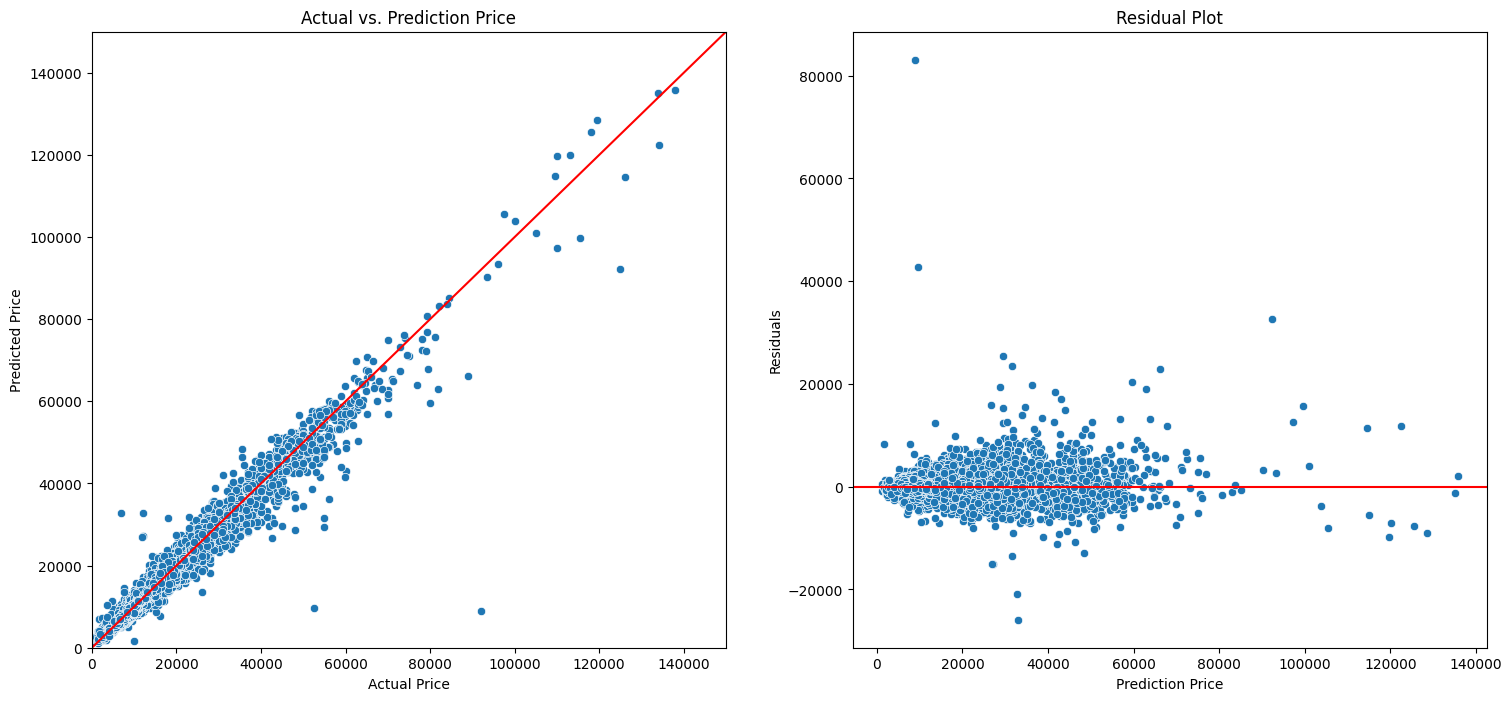

In [410]:
residuals = y_test - y_pred_tuning

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

# Actual vs. Predicted Price Plot
sns.scatterplot(x=y_test, y=y_pred_tuning, ax=axs[0]).set(title='Actual vs. Prediction Price', 
                                                          xlabel='Actual Price', 
                                                          ylabel='Predicted Price', 
                                                          xlim=(0, 150000), 
                                                          ylim=(0, 150000))
sns.lineplot(x=range(0,150000), y=range(0,150000), color='red', ax=axs[0])

# Residual Plot
sns.scatterplot(x=y_pred_tuning, y=residuals, ax=axs[1])
axs[1].axhline(y=0, color='red', linestyle='-')
axs[1].set(title='Residual Plot', xlabel='Prediction Price', ylabel='Residuals')

plt.show()


**Insight**

1. Berdasarkan Visualisasi perbandingan antara Actual Price vs Predicted Price kita dapa menarik informasi sebagai berikut:

    - Secara keseluruhan plot harga aktual dan prediksi bergerak linier semakin mendekati garis merah.
    - Semakin mendekati garis linear dapat dikatakan bahwa prediksi harga semakin memiliki error yang kecil.
    - Pada beberapa prediksi mengalami *overestimate* dan *underestimate*.
    - Mobil yang memiliki harga aktual diatas 40.000 cenderung mengalami underestimate, hal tersebut wajar mengingat upper fence kolom Price berada pada 36876.5. Oleh karena distribusi data tersebut diatas upper fence jumlah data lebih sedikit dibandingkan data yang berada dibawahnya, sehingga model memiliki informasi yang sedikit pada price > 40.000 menyebabkan performa prediksi kurang baik.



2. Berdasarkan visualisasi Residual Plot diatas, kami mendapatkan informasi bahwa:

    - Pada Residual Plot terlihat distribusi error Prediction yang lebih jelas
    - Terlihat jelas terdapat Residual yang besar pada distribusi data harga prediksi diantara 0-20000 yang mengalami *underestimate* prediksi tersebut memiliki Residual ekstrim diatas 40000 dan bahkan 80000.
    - Sedangkan pada range harga 20000 - 40000, terdapat sejumlah prediksi yang mengalami *overestimate* dengan residual >20000.
    - Range harga > 40000 memiliki residual yang besar semakin ke kanan. Menghasilkan prediksi harga *underestimate* dan *overestimate* pada harga yang semakin besar. Hal tersebut disebabkan karena data mobil diatas 40.000 lebih sedikit, sehingga model memiliki informasi yang sedikit pada price > 40.000 sehingga menghasilkan error yang besar.
    - Selain itu dugaan awal kami kenapa data tersebut memiliki residual yang besar, mungkin dikarenakan karakteristik ('Model', 'Engine Size', 'Fuel Type' etc.) yang berbeda dengan mobil lain dari rentang harga yang sama ataupun karena pemasang iklan memasang harga yang jauh berbeda dari harga pasarannya.


Untuk mendapatkan informasi secara quantitatif dan lebih terinformasi mengenai residual yang ekstrim tersebut kami akan menganalisis lebih mendalam baik secara visualisasi maupun penggalian informasi pada dataset.


### **Residual Distribution by Range**

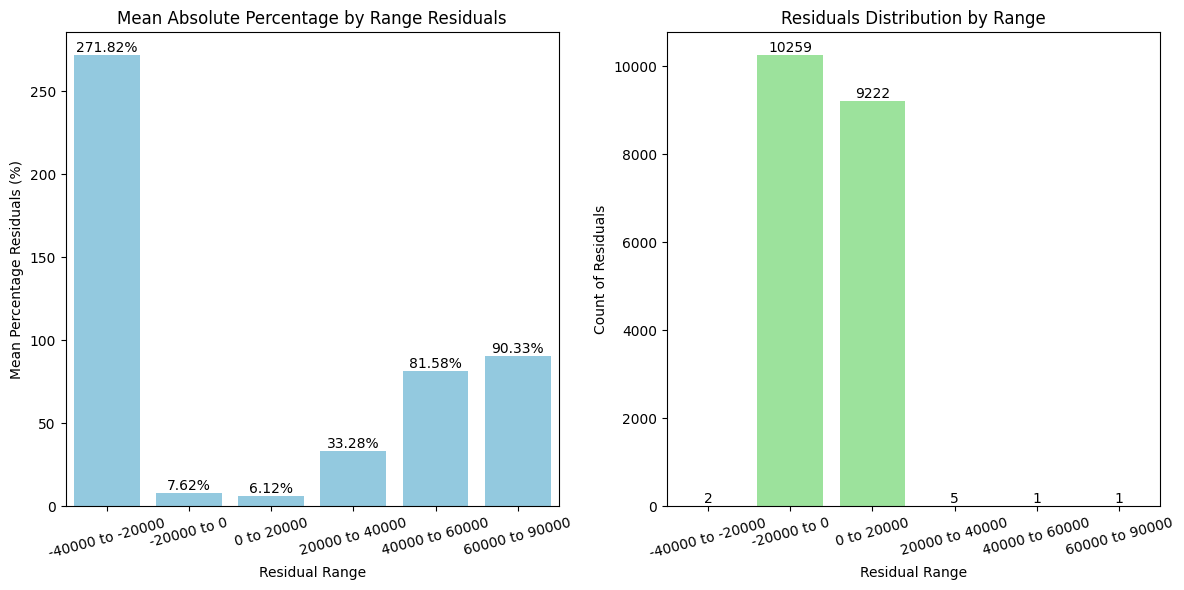

In [411]:
# Define the bins
residual_bins = np.array([-40000, -20000, 0, 20000, 40000, 60000, 90000])
residual_labels = [f'{residual_bins[i]} to {residual_bins[i+1]}' for i in range(len(residual_bins)-1)]

# Buat DataFrame dengan kolom y_actual, y_prediksi, dan residuals
df_residuals = pd.DataFrame({
    'y_actual': y_test,
    'y_prediksi': y_pred_tuning,
})

# Hitung residuals
df_residuals['residuals'] = df_residuals['y_actual'] - df_residuals['y_prediksi']

# Hitung persentase residuals
df_residuals['percent_residuals'] = (df_residuals['residuals'] / df_residuals['y_actual']).abs() * 100

# Hitung kategori (range) residuals berdasarkan bins yang telah ditentukan sebelumnya
df_residuals['residual_range'] = pd.cut(df_residuals['residuals'], bins=residual_bins, labels=residual_labels, right=False)

# Hitung mean persentase residuals untuk setiap Range harga
mean_percent_residuals = df_residuals.groupby('residual_range')['percent_residuals'].mean()

# Hitung jumlah residuals dalam setiap Range harga
count_residuals = df_residuals.groupby('residual_range').size()

# Plot barplot menggunakan rerata persentase residuals
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=mean_percent_residuals.index, y=mean_percent_residuals.values, color='skyblue')
plt.title('Mean Absolute Percentage by Range Residuals')
plt.xlabel('Residual Range')
plt.ylabel('Mean Percentage Residuals (%)')
plt.xticks(rotation=15)

# Tambahkan anotasi di atas setiap batang
for idx, value in enumerate(mean_percent_residuals.values):
    plt.text(idx, value, f'{value:.2f}%', ha='center', va='bottom')

# Plot barplot menggunakan jumlah residuals
plt.subplot(1, 2, 2)
sns.barplot(x=count_residuals.index, y=count_residuals.values, color='lightgreen')
plt.title('Residuals Distribution by Range')
plt.xlabel('Residual Range')
plt.ylabel('Count of Residuals')
plt.xticks(rotation=15)

# Tambahkan anotasi di atas setiap batang
for idx, value in enumerate(count_residuals.values):
    plt.text(idx, value, f'{value}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

Berdasarkan visualisasi mengenai distribusi residual pada harga prediksi, kami melihat terdapat beberapa persentase ekstrim sebagai berikut :
1. **Overestimate:** pada range residual 20000 hingga 40000 terdapat sebanyak 271.82% atau 2 data.
2. **Underestimate:** 
    - pada range residual 20000 hingga 40000 terdapat sebanyak 33.28% atau 5 data.
    - pada range residual 40000 hingga 60000 terdapat sebanyak 81.58% atau 1 data.
    - pada range residual 60000 hingga 80000 terdapat sebanyak 90.33% atau 1 data.

Untuk mengetahui penyebabnya scara kualitatif kami akan mencobar menarik informasi dari dataset dan mencari tahu apa yang menyebabkan prediksi mobil tersebut memiliki residual yang ekstrim.

#### **1. *Overestimate* prediction -40000 to -20000**

**Melihat karakteristik *underestimate* prediction *-40000 to -20000***

In [412]:
df_train = X_train.copy()
df_train['Price'] = y_train

df_test = X_test.copy()
df_test['Range Residual'] = df_residuals['residual_range']
df_test['Residual'] = df_residuals['residuals']
df_test['Prediksi'] = y_pred_tuning
df_test['Actual Price'] = y_test
df_test[df_test['Range Residual']=='-40000 to -20000']

Brand     Model  Year Transmission  Mileage Fuel Type  Tax  \
55373  Mercedes Benz   S Class  2002    Automatic    24000    Petrol  570   
16846            BMW  1 Series  2020    Semi-Auto       10    Petrol  150   

        Mpg  Engine Size    Range Residual      Residual      Prediksi  \
55373  21.1          5.0  -40000 to -20000 -25887.623089  32882.623089   
16846  34.5          2.0  -40000 to -20000 -20818.237255  32813.237255   

       Actual Price  
55373          6995  
16846         11995

- Mercedes S Class Year of Built 2002, actual price `6995` diprediksi `32882`.
- BMW 1 Series Year of Built,  actual price `11995` diprediksi `32813`.

**Membandingkan karakteristiknya dengan data Train**

**a. Model S Class**

In [413]:
print("Karakteristik Mobil Prediksi Harga Overestimate")
display(df_test[df_test['Range Residual']=='-40000 to -20000'].loc[[55373]])
print("\nKarakteristik Serupa di Data Train")
display(df_train[df_train['Model']=='S Class'].sort_values('Year'))
print(f"Median Year of Built {df_train[df_train['Model']=='S Class']['Year'].median()}")
print(f"Median Price {df_train[df_train['Model']=='S Class']['Price'].median()}")
print(f"Persentase Tahun Pembuatan dibawah 2010 {len(df_train[(df_train['Model']=='S Class')&(df_train['Year']<2010)])/len(df_train[df_train['Model']=='S Class'])*100}")

Karakteristik Mobil Prediksi Harga Overestimate


Brand    Model  Year Transmission  Mileage Fuel Type  Tax  \
55373  Mercedes Benz  S Class  2002    Automatic    24000    Petrol  570   

        Mpg  Engine Size    Range Residual      Residual      Prediksi  \
55373  21.1          5.0  -40000 to -20000 -25887.623089  32882.623089   

       Actual Price  
55373          6995


Karakteristik Serupa di Data Train


Brand    Model  Year Transmission  Mileage Fuel Type  Tax  \
55157  Mercedes Benz  S Class  1998    Automatic    43534    Petrol  265   
55374  Mercedes Benz  S Class  1999    Automatic    34000    Petrol  145   
55375  Mercedes Benz  S Class  2001    Automatic    66000    Petrol  570   
55124  Mercedes Benz  S Class  2005    Automatic    75148    Diesel  330   
55284  Mercedes Benz  S Class  2009    Automatic    79980    Diesel  325   
...              ...      ...   ...          ...      ...       ...  ...   
44319  Mercedes Benz  S Class  2019    Automatic     1501    Diesel  145   
51551  Mercedes Benz  S Class  2019    Automatic     1000    Diesel  145   
46918  Mercedes Benz  S Class  2019    Semi-Auto    10655    Diesel  145   
50464  Mercedes Benz  S Class  2019    Semi-Auto     9252    Diesel  145   
45899  Mercedes Benz  S Class  2020    Semi-Auto     3999    Diesel  145   

        Mpg  Engine Size  Price  
55157  23.3          6.0  19990  
55374  24.6          3.2   5995  
55375  24.6          3.2   4495  
55124  36.7          3.2   4990  
55284  34.0          3.0   8990  
...     ...          ...    ...  
44319  41.5          3.0  54990  
51551  52.3          3.0  67109  
46918  52.3          3.0  47980  
50464  52.3          3.0  46250  
45899  40.4          3.0  64980  

[154 rows x 10 columns]

Median Year of Built 2018.0
Median Price 46120.0
Persentase Tahun Pembuatan dibawah 2010 3.2467532467532463


Mengacu kepada informasi dari dataset tersebut, kita bisa memperoleh informasi :

- Median Year pembuatan model S Class adalah tahun `2018`.
- Median Price  model S Class adalah `44980`.
- Persentase Mercedes Benz S Class tahun pembuatan dibawah 2010 adalah `4.59%`.


Berdasarkan informasi tersebut dapat disimpulkan bahwa residual ekstrim pada prediksi harga mobil ini dapat disimpulkan oleh kurangnya data Mercedes Benz S Class dibawah 2010, sehingga menyebabkan model kurang mampu menangkap pola dan menyebabkan prediksi menjadi *overestimate* 

**b. Model 1 Series**

In [414]:
print("Karakteristik Mobil Prediksi Harga Overestimate")
display(df_test[df_test['Range Residual']=='-40000 to -20000'].loc[[16846]])
print("\nKarakteristik Serupa di Data Train")
display(df_train[(df_train['Model']=='1 Series')&(df_train['Year']==2020)&(df_train['Engine Size']==2.0)&(df_train['Transmission']=='Semi-Auto')].sort_values('Year', ascending=False).head(100))
print(f"Median Price of Year Built 2020 dan Year 2020 adalah {df_train[(df_train['Model']=='1 Series')&(df_train['Engine Size']==2.0)&(df_train['Transmission']=='Semi-Auto')&(df_train['Year']==2020)]['Price'].median()}")
print(f"Median Mpg of Year Built 2020 dan Year 2020 adalah {df_train[(df_train['Model']=='1 Series')&(df_train['Engine Size']==2.0)&(df_train['Transmission']=='Semi-Auto')&(df_train['Year']==2020)]['Mpg'].median()}")

Karakteristik Mobil Prediksi Harga Overestimate


Brand     Model  Year Transmission  Mileage Fuel Type  Tax   Mpg  \
16846   BMW  1 Series  2020    Semi-Auto       10    Petrol  150  34.5   

       Engine Size    Range Residual      Residual      Prediksi  Actual Price  
16846          2.0  -40000 to -20000 -20818.237255  32813.237255         11995


Karakteristik Serupa di Data Train


Brand     Model  Year Transmission  Mileage Fuel Type  Tax   Mpg  \
17238   BMW  1 Series  2020    Semi-Auto      102    Petrol  145  34.5   
13210   BMW  1 Series  2020    Semi-Auto     6565    Diesel  150  51.4   
17143   BMW  1 Series  2020    Semi-Auto     2797    Petrol  145  34.5   
12820   BMW  1 Series  2020    Semi-Auto      101    Diesel  145  48.7   
12498   BMW  1 Series  2020    Semi-Auto     1500    Petrol  145  34.5   
15119   BMW  1 Series  2020    Semi-Auto      100    Diesel  145  51.4   
17519   BMW  1 Series  2020    Semi-Auto     3000    Petrol  150  34.5   
15144   BMW  1 Series  2020    Semi-Auto      151    Petrol  150  34.5   
12303   BMW  1 Series  2020    Semi-Auto      953    Diesel  145  51.4   
15846   BMW  1 Series  2020    Semi-Auto     1501    Diesel  145  51.4   
17716   BMW  1 Series  2020    Semi-Auto     1000    Diesel  145  48.7   
16082   BMW  1 Series  2020    Semi-Auto        5    Diesel  145  48.7   
13029   BMW  1 Series  2020    Semi-Auto     5656    Petrol  145  34.5   
10684   BMW  1 Series  2020    Semi-Auto     1560    Diesel  150  48.7   
16168   BMW  1 Series  2020    Semi-Auto      150    Diesel  145  51.4   
11901   BMW  1 Series  2020    Semi-Auto     4362    Diesel  145  48.7   
12091   BMW  1 Series  2020    Semi-Auto      206    Diesel  145  48.7   
17236   BMW  1 Series  2020    Semi-Auto     6000    Diesel  145  48.7   
16425   BMW  1 Series  2020    Semi-Auto     3150    Petrol  150  34.5   
16058   BMW  1 Series  2020    Semi-Auto     6870    Diesel  145  48.7   
15640   BMW  1 Series  2020    Semi-Auto     1500    Diesel  145  51.4   
15652   BMW  1 Series  2020    Semi-Auto     1250    Diesel  145  48.7   
11188   BMW  1 Series  2020    Semi-Auto      934    Diesel  150  48.7   
13704   BMW  1 Series  2020    Semi-Auto     1129    Diesel  150  51.4   

       Engine Size  Price  
17238          2.0  33995  
13210          2.0  25450  
17143          2.0  32995  
12820          2.0  31016  
12498          2.0  30440  
15119          2.0  27950  
17519          2.0  36995  
15144          2.0  32972  
12303          2.0  28790  
15846          2.0  27000  
17716          2.0  30995  
16082          2.0  32995  
13029          2.0  30990  
10684          2.0  31998  
16168          2.0  27840  
11901          2.0  29980  
12091          2.0  32451  
17236          2.0  27495  
16425          2.0  31990  
16058          2.0  32990  
15640          2.0  27495  
15652          2.0  31495  
11188          2.0  29998  
13704          2.0  28990

Median Price of Year Built 2020 dan Year 2020 adalah 30992.5
Median Mpg of Year Built 2020 dan Year 2020 adalah 48.7


Berdasarkan informasi tersebut diketahui bahwa median harga mobil dengan karakteristik serupa adalah `30992.5`, dapat disimpulkan bahwa prediksi overestimate ini karena pola yang dipelajari oleh model sudah sesuai dengan median harga mobil dengan karakteristik serupa. Pengiklan memasang harga yang rendah dari pasaran kemungkinan disebabkan oleh Mpg mobil yang rendah dari median mobil serupa, kondisi fisik mobil yang kurang bagus, ataupun pengiklan tidak mengetahui harga pasaran mobil tersebut.

#### **2. *Underestimate* prediction 20000 to 40000**

In [415]:
df_test[df_test['Range Residual']=='20000 to 40000']

Brand       Model  Year Transmission  Mileage Fuel Type  Tax  \
97409     Volkswagen  California  2018    Automatic     7865    Diesel  260   
55253  Mercedes Benz     V Class  2017    Automatic    34564    Diesel  145   
52681  Mercedes Benz     C Class  2019    Semi-Auto      200    Petrol  145   
49760  Mercedes Benz     S Class  2019    Automatic     1500    Petrol  145   
44917  Mercedes Benz     A Class  2017    Semi-Auto    13781    Petrol  145   

        Mpg  Engine Size  Range Residual      Residual      Prediksi  \
97409  44.1          2.0  20000 to 40000  25517.315397  29481.684603   
55253  44.8          2.1  20000 to 40000  23502.852009  31487.147991   
52681  28.0          4.0  20000 to 40000  22834.621992  66160.378008   
49760  31.7          4.0  20000 to 40000  32732.504950  92266.495050   
44917  30.1          4.0  20000 to 40000  20322.019110  59676.980890   

       Actual Price  
97409         54999  
55253         54990  
52681         88995  
49760        124999  
44917         79999

- Volkswagen California Year of Built `2018`, actual price `54999` diprediksi `29481.68`.
- Mercedes Benz V Class Year of Built `2017`, actual price `54990` diprediksi `31487.14`.
- Mercedes Benz C Class Year of Built `2019`, actual price `88995` diprediksi `22834.62`.
- Mercedes Benz S Class Year of Built `2019`, actual price `124999` diprediksi `92266.49`.
- Mercedes Benz A Class Year of Built `2017`, actual price `124999` diprediksi `59676.98`.

**a. Volkswagen California**

In [416]:
print('Karakteristik Mobil Prediksi Harga Underestimate')
display(df_test[df_test['Range Residual']=='20000 to 40000'].loc[[97409]])
print("\nKarakteristik Serupa di Data Train")
display(df_train[(df_train['Model']=='California')].sort_values('Year', ascending=False).head(100))
print(f"Median Price of VW California adalah {df_train[(df_train['Model']=='California')]['Price'].median()}")
print(f"Median Mpg of VW California adalah {df_train[(df_train['Model']=='California')]['Mpg'].median()}")

Karakteristik Mobil Prediksi Harga Underestimate


Brand       Model  Year Transmission  Mileage Fuel Type  Tax  \
97409  Volkswagen  California  2018    Automatic     7865    Diesel  260   

        Mpg  Engine Size  Range Residual      Residual      Prediksi  \
97409  44.1          2.0  20000 to 40000  25517.315397  29481.684603   

       Actual Price  
97409         54999


Karakteristik Serupa di Data Train


Brand       Model  Year Transmission  Mileage Fuel Type  Tax  \
97408  Volkswagen  California  2020    Semi-Auto     1000    Diesel  260   
97417  Volkswagen  California  2019    Automatic     7486    Diesel  260   
97412  Volkswagen  California  2019    Automatic     7750    Diesel  260   
97413  Volkswagen  California  2019    Automatic     4653    Diesel  260   
97411  Volkswagen  California  2019    Automatic    10501    Diesel  265   
97414  Volkswagen  California  2019    Automatic    10288    Diesel  260   
97404  Volkswagen  California  2019    Automatic     8783    Diesel  260   
97410  Volkswagen  California  2019    Semi-Auto     3544    Diesel  260   
97416  Volkswagen  California  2019    Automatic     7259    Diesel  260   
97418  Volkswagen  California  2019    Automatic    10080    Diesel  260   
97406  Volkswagen  California  2019       Manual    12895    Diesel  260   
97407  Volkswagen  California  2019    Semi-Auto     3500    Diesel  260   
97415  Volkswagen  California  2019    Automatic     6739    Diesel  260   
97405  Volkswagen  California  2019    Semi-Auto     8991    Diesel  260   

        Mpg  Engine Size  Price  
97408  32.1          2.0  61995  
97417  33.2          2.0  57991  
97412  32.1          2.0  52991  
97413  33.2          2.0  57991  
97411  32.1          2.0  54999  
97414  33.2          2.0  57991  
97404  32.1          2.0  55999  
97410  29.1          2.0  69994  
97416  33.2          2.0  57991  
97418  29.1          2.0  57991  
97406  44.1          2.0  52995  
97407  32.1          2.0  54995  
97415  33.2          2.0  57991  
97405  33.2          2.0  56995

Median Price of VW California adalah 57991.0
Median Mpg of VW California adalah 32.650000000000006


Berdasarkan informasi tersebut dapat diketahui bahwa mobil memili year of built dan mpg yang berbeda dari data dengan model serupa pada dataset. Prediksi underestimate mungkin dapat disebabkan *feature importance* model yang paling tinggi ada di `Year` dan `Engine Size`, bukan berdasarkan `Model`. Oleh karena data model mobil teresbut dengan tahun serupa tidak ada, model cenderung menangkap pola berdasarkan mobil dengan karakteristik `Year` dan `Engine Size` namun berasal dari model mobil lainnya.

**b. Mercedes Benz V-Class**

In [417]:
print('Karakteristik Mobil Prediksi Harga Underestimate')
display(df_test[df_test['Range Residual']=='20000 to 40000'].loc[[55253]])
print("\nKarakteristik Serupa di Data Train")
display(df_train[(df_train['Model']=='V Class')&(df_train['Year']<2019)&(df_train['Year']>2015)&(df_train['Transmission']=='Automatic')].sort_values('Year', ascending=False).head())
print(f"Median Price of Mercedes Benz V Class Year of Built <2019 dan Transmissi Automatic adalah {df_train[(df_train['Model']=='V Class')&(df_train['Year']<2019)&(df_train['Year']>2015)&(df_train['Transmission']=='Automatic')]['Price'].median()}")

Karakteristik Mobil Prediksi Harga Underestimate


Brand    Model  Year Transmission  Mileage Fuel Type  Tax  \
55253  Mercedes Benz  V Class  2017    Automatic    34564    Diesel  145   

        Mpg  Engine Size  Range Residual      Residual      Prediksi  \
55253  44.8          2.1  20000 to 40000  23502.852009  31487.147991   

       Actual Price  
55253         54990


Karakteristik Serupa di Data Train


Brand    Model  Year Transmission  Mileage Fuel Type  Tax  \
48493  Mercedes Benz  V Class  2018    Automatic    15232    Diesel  145   
45685  Mercedes Benz  V Class  2018    Automatic    10044    Diesel  145   
56145  Mercedes Benz  V Class  2018    Automatic    13000    Diesel  145   
55623  Mercedes Benz  V Class  2018    Automatic    15993    Diesel  145   
55318  Mercedes Benz  V Class  2018    Automatic    13737    Diesel  145   

        Mpg  Engine Size  Price  
48493  48.7          2.1  19750  
45685  44.8          2.2  42510  
56145  45.6          2.1  34000  
55623  48.7          2.1  19750  
55318  45.6          2.1  35480

Median Price of Mercedes Benz V Class Year of Built <2019 dan Transmissi Automatic adalah 32821.5


Berdasarkan informasi yang kami peroleh dari dataset rerata harga untuk karakteristik mobil serupa adalah `32821.5`. Ternyata Model mempelajari cukup baik untuk karakteristik mobil serupa, sedangkan pada data test penjual memasang harga mobil jauh diatas rerata harga mobil tersebut dengan karakteristik yang sama.

**c. Mercedes Benz C-Class**

In [418]:
print('Karakteristik Mobil Prediksi Harga Underestimate')
display(df_test[df_test['Range Residual']=='20000 to 40000'].loc[[52681]])
print("\nKarakteristik Serupa di Data Train")
display(df_train[(df_train['Model']=='C Class')&(df_train['Year']==2019)&(df_train['Transmission']=='Semi-Auto')&(df_train['Engine Size']==4.0)].sort_values('Year', ascending=False))
print(f"Median Price of Mercedes Benz C Class Year of Built 2019 dan Transmissi Semi-Auto adalah {df_train[(df_train['Model']=='C Class')&(df_train['Year']==2019)&(df_train['Engine Size']==4.0)&(df_train['Transmission']=='Semi-Auto')]['Price'].median()}")

Karakteristik Mobil Prediksi Harga Underestimate


Brand    Model  Year Transmission  Mileage Fuel Type  Tax  \
52681  Mercedes Benz  C Class  2019    Semi-Auto      200    Petrol  145   

        Mpg  Engine Size  Range Residual      Residual      Prediksi  \
52681  28.0          4.0  20000 to 40000  22834.621992  66160.378008   

       Actual Price  
52681         88995


Karakteristik Serupa di Data Train


Brand    Model  Year Transmission  Mileage Fuel Type  Tax  \
52185  Mercedes Benz  C Class  2019    Semi-Auto     7580    Petrol  145   
46663  Mercedes Benz  C Class  2019    Semi-Auto     3456    Petrol  145   
51660  Mercedes Benz  C Class  2019    Semi-Auto     1282    Petrol  145   
49965  Mercedes Benz  C Class  2019    Semi-Auto    10004    Petrol  145   
51219  Mercedes Benz  C Class  2019    Semi-Auto     1000    Petrol  145   
49733  Mercedes Benz  C Class  2019    Semi-Auto     1200    Petrol  145   
52094  Mercedes Benz  C Class  2019    Semi-Auto      262    Petrol  145   
52539  Mercedes Benz  C Class  2019    Semi-Auto     1000    Petrol  145   
48304  Mercedes Benz  C Class  2019    Semi-Auto     3398    Petrol  145   
50826  Mercedes Benz  C Class  2019    Semi-Auto       95    Petrol  145   
47050  Mercedes Benz  C Class  2019    Semi-Auto      700    Petrol  145   
51841  Mercedes Benz  C Class  2019    Semi-Auto     2270    Petrol  145   
51221  Mercedes Benz  C Class  2019    Semi-Auto     1615    Petrol  145   

        Mpg  Engine Size  Price  
52185  28.0          4.0  62399  
46663  28.0          4.0  67980  
51660  28.0          4.0  68399  
49965  34.5          4.0  41750  
51219  28.5          4.0  60859  
49733  28.5          4.0  66890  
52094  28.5          4.0  66899  
52539  28.0          4.0  69679  
48304  27.2          4.0  65000  
50826  28.5          4.0  62199  
47050  28.0          4.0  67495  
51841  28.0          4.0  67199  
51221  28.0          4.0  69399

Median Price of Mercedes Benz C Class Year of Built 2019 dan Transmissi Semi-Auto adalah 66899.0


Berdasarkan informasi yang kami peroleh dari dataset rerata harga untuk karakteristik mobil serupa adalah `66899.0`. Ternyata Model mempelajari cukup baik untuk karakteristik mobil serupa, sedangkan pada data test penjual memasang harga mobil jauh diatas rerata harga mobil tersebut dengan karakteristik yang sama.

**d. Mercedes Benz S-Class**

In [419]:
print('Karakteristik Mobil Prediksi Harga Underestimate')
display(df_test[df_test['Range Residual']=='20000 to 40000'].loc[[49760]])
print("\nKarakteristik Serupa di Data Train")
display(df_train[(df_train['Model']=='S Class')&(df_train['Year']==2019)&(df_train['Transmission']=='Automatic')&(df_train['Engine Size']==4.0)].sort_values('Year', ascending=False))
print(f"Median Price of Mercedes Benz S Class Year of Built 2019 dan Transmissi Automatic adalah {df_train[(df_train['Model']=='S Class')&(df_train['Year']==2019)&(df_train['Engine Size']==4.0)&(df_train['Transmission']=='Automatic')]['Price'].median()}")

Karakteristik Mobil Prediksi Harga Underestimate


Brand    Model  Year Transmission  Mileage Fuel Type  Tax  \
49760  Mercedes Benz  S Class  2019    Automatic     1500    Petrol  145   

        Mpg  Engine Size  Range Residual     Residual     Prediksi  \
49760  31.7          4.0  20000 to 40000  32732.50495  92266.49505   

       Actual Price  
49760        124999


Karakteristik Serupa di Data Train


Brand    Model  Year Transmission  Mileage Fuel Type  Tax  \
50646  Mercedes Benz  S Class  2019    Automatic     1314    Petrol  145   
47671  Mercedes Benz  S Class  2019    Automatic     3671    Petrol  145   
52188  Mercedes Benz  S Class  2019    Automatic     1912    Petrol  145   

        Mpg  Engine Size   Price  
50646  34.0          4.0   86699  
47671  31.7          4.0  104590  
52188  34.0          4.0   86399

Median Price of Mercedes Benz S Class Year of Built 2019 dan Transmissi Automatic adalah 86699.0


Berdasarkan informasi yang kami peroleh dari dataset rerata harga untuk karakteristik mobil serupa adalah `86699.0`. Ternyata Model mempelajari cukup baik untuk karakteristik mobil serupa, sedangkan pada data test penjual memasang harga mobil jauh diatas rerata harga mobil tersebut dengan karakteristik yang sama.

**e. Mercedes Benz A-Class**

In [420]:
print('Karakteristik Mobil Prediksi Harga Underestimate')
display(df_test[df_test['Range Residual']=='20000 to 40000'].loc[[44917]])
print("\nKarakteristik Serupa di Data Train")
display(df_train[(df_train['Model']=='A Class')&(df_train['Year']<=2019)&(df_train['Transmission']=='Semi-Auto')&(df_train['Engine Size']==4.0)].sort_values('Year', ascending=False))
print(f"Median Price of Mercedes Benz A Class Year of Built < 2019 dan Transmissi Semi-Auto adalah {df_train[(df_train['Model']=='A Class')&(df_train['Year']<=2017)&(df_train['Engine Size']==4.0)&(df_train['Transmission']=='Semi-Auto')]['Price'].median()}")

Karakteristik Mobil Prediksi Harga Underestimate


Brand    Model  Year Transmission  Mileage Fuel Type  Tax  \
44917  Mercedes Benz  A Class  2017    Semi-Auto    13781    Petrol  145   

        Mpg  Engine Size  Range Residual     Residual     Prediksi  \
44917  30.1          4.0  20000 to 40000  20322.01911  59676.98089   

       Actual Price  
44917         79999


Karakteristik Serupa di Data Train


Brand    Model  Year Transmission  Mileage Fuel Type  Tax  \
47678  Mercedes Benz  A Class  2019    Semi-Auto      880    Petrol  145   
44643  Mercedes Benz  A Class  2019    Semi-Auto     5822    Petrol  150   
52568  Mercedes Benz  A Class  2019    Semi-Auto      891    Petrol  145   
46251  Mercedes Benz  A Class  2019    Semi-Auto     2951    Petrol  145   
52175  Mercedes Benz  A Class  2019    Semi-Auto      785    Petrol  150   
52543  Mercedes Benz  A Class  2019    Semi-Auto     1000    Petrol  145   
48813  Mercedes Benz  A Class  2018    Semi-Auto     3600    Petrol  145   
51014  Mercedes Benz  A Class  2017    Semi-Auto     5226    Petrol  145   
49945  Mercedes Benz  A Class  2016    Semi-Auto    10104    Petrol  325   

        Mpg  Engine Size   Price  
47678  24.8          4.0  124366  
44643  22.6          4.0  104999  
52568  22.6          4.0  114199  
46251  22.1          4.0  123846  
52175  22.1          4.0  140319  
52543  22.1          4.0  139559  
48813  30.1          4.0   77500  
51014  30.4          4.0   75089  
49945  30.1          4.0   69995

Median Price of Mercedes Benz A Class Year of Built < 2019 dan Transmissi Semi-Auto adalah 72542.0


Berdasarkan hasil penggalian informasi yang mengacu kepada data train dengan karakteristik serupa pada kasus Model A-Class dengan prediksi underestimate, dapat diketahui bahwa karakteristik mobil serupa memiliki harga yang sama dengan Actual Price pada data test. Prediksi underestimate mungkin dapat disebabkan *feature importance* model yang paling tinggi ada di `Year` dan `Engine Size`, bukan berdasarkan `Model`. Oleh karena data model mobil teresbut dengan tahun serupa tidak ada, model cenderung menangkap pola berdasarkan mobil dengan karakteristik `Year` dan `Engine Size` namun berasal dari model mobil lainnya.

#### **3. *Underestimate* prediction 40000 to 60000**

In [421]:
print('Karakteristik Mobil Prediksi Harga Underestimate')
display(df_test[df_test['Range Residual']=='40000 to 60000'])
print("\nKarakteristik Serupa di Data Train")
display(df_train[(df_train['Model']=='Mokka')&(df_train['Year']<=2018)&(df_train['Transmission']=='Automatic')&(df_train['Engine Size']==1.6)].sort_values('Year', ascending=False))
print(f"Median Price of Vauxhall Mokka Year of Built < 2018 dan Transmissi Automatic adalah {df_train[(df_train['Model']=='Mokka')&(df_train['Year']<=2018)&(df_train['Engine Size']==1.6)&(df_train['Transmission']=='Automatic')]['Price'].median()}")

Karakteristik Mobil Prediksi Harga Underestimate


Brand  Model  Year Transmission  Mileage Fuel Type  Tax   Mpg  \
76058  Vauxhall  Mokka  2016    Automatic    52489    Diesel  150  55.4   

       Engine Size  Range Residual      Residual     Prediksi  Actual Price  
76058          1.6  40000 to 60000  42821.625251  9667.374749         52489


Karakteristik Serupa di Data Train


Brand  Model  Year Transmission  Mileage Fuel Type  Tax   Mpg  \
76390  Vauxhall  Mokka  2017    Automatic    23596    Diesel  145  56.5   
75822  Vauxhall  Mokka  2016    Automatic    39980    Diesel  145  55.4   
75719  Vauxhall  Mokka  2015    Automatic    34961    Diesel  150  55.4   
75935  Vauxhall  Mokka  2015    Automatic    25440    Diesel  150  55.4   

       Engine Size  Price  
76390          1.6  13500  
75822          1.6   9250  
75719          1.6   8795  
75935          1.6   9499

Median Price of Vauxhall Mokka Year of Built < 2018 dan Transmissi Automatic adalah 9374.5


Berdasarkan hasil validasi yang kami lakukan ke data train didapatkan informasi bahwa harga yang diprediksi sudah sesuai dengan harga mobil pasaran. Adapun prediksi underestimate disebabkan harga actual pada data test dengan karakteristik mobil tersebut *overpriced* jika dibandingkan data pada data train. Terdapat kemungkinan kenapa pemilik mobil memasang harga `52489` adalah karena pemilik tidak memahami harga pasaran kendaraan miliknya.

#### **4. *Underestimate* prediction 60000 to 90000**

In [422]:
print('Karakteristik Mobil Prediksi Harga Underestimate')
display(df_test[df_test['Range Residual']=='60000 to 90000'])
print("\nKarakteristik Serupa di Data Train")
display(df_train[(df_train['Model']=='I10')&(df_train['Year']==2017)&(df_train['Transmission']=='Automatic')&(df_train['Engine Size']==1.2)].sort_values('Year', ascending=False))
print(f"Median Price of Hyundai l10 Year of Built 2019 dan Transmissi Automatic adalah {df_train[(df_train['Model']=='I10')&(df_train['Year']==2017)&(df_train['Engine Size']==1.2)&(df_train['Transmission']=='Automatic')]['Price'].median()}")

Karakteristik Mobil Prediksi Harga Underestimate


Brand Model  Year Transmission  Mileage Fuel Type  Tax   Mpg  \
43031  Hyundai   I10  2017    Automatic    35460    Petrol  150  47.9   

       Engine Size  Range Residual      Residual     Prediksi  Actual Price  
43031          1.2  60000 to 90000  83102.106323  8897.893677         92000


Karakteristik Serupa di Data Train


Brand Model  Year Transmission  Mileage Fuel Type  Tax   Mpg  \
42153  Hyundai   I10  2017    Automatic    10913    Petrol  145  47.9   
43197  Hyundai   I10  2017    Automatic    20664    Petrol  145  47.9   
43467  Hyundai   I10  2017    Automatic    20745    Petrol  145  47.9   
43509  Hyundai   I10  2017    Automatic    12455    Petrol  150  47.9   

       Engine Size  Price  
42153          1.2   9680  
43197          1.2   7999  
43467          1.2   8100  
43509          1.2  10999

Median Price of Hyundai l10 Year of Built 2019 dan Transmissi Automatic adalah 8890.0


Berdasarkan hasil validasi yang kami lakukan ke data train didapatkan informasi bahwa harga yang diprediksi sudah sesuai dengan harga mobil pasaran. Adapun prediksi underestimate disebabkan harga actual pada data test dengan karakteristik mobil tersebut *overpriced* jika dibandingkan data pada data train. Terdapat beberapa kemungkinan kenapa pemilik mobil memasang harga `92000` adalah karena pemilik tidak memahami harga pasaran kendaraan miliknya ataupun typo saat menginput harga.

#### **Insight Summary**

Berikut adalah summary insight mengenai distribusi residual pada harga prediksi dan hasil validasi karakteristik mobil serupa ke data Train:

| Jenis Prediksi | Rentang Residual | Persentase Ekstrim | Jumlah Data Ekstrim | Kesimpulan |
|-----------------|------------------|---------------------|----------------------|------------|
| Overestimate    | -40000 to -20000 | 271.82%             | 2                    | Prediksi overestimate disebabkan kurangnya data mobil dibawah 2011 pada rentang tersebut, sehingga prediksi menjadi overestimate. Harga actual pada data test underpriced jika dibandingkan harga pasaran pada data train sehingga menyebabkan prediksi *overestimate*. |
| Underestimate   | 20000 to 40000   | 33.28%              | 5                    | Prediksi underestimate pada rentang ini disebabkan oleh kurangnya data mobil pada rentang tersebut dalam data train. Akibatnya, ketika model digunakan untuk memprediksi karakteristik mobil yang sedikit berbeda pada data test, prediksi menjadi tidak akurat. Selain itu, harga aktual pada data test juga cenderung overpriced jika dibandingkan dengan harga pasaran yang ada dalam data train. |
| Underestimate   | 40000 to 60000   | 81.58%              | 1                    | Harga actual pada data test terlalu tinggi dibandingkan dengan harga pasaran, menyebabkan prediksi underestimate. |
| Underestimate   | 60000 to 90000   | 90.33%              | 1                    | Harga actual pada data test terlalu tinggi dibandingkan dengan harga pasaran, menyebabkan prediksi underestimate. |



### **Feature Importance**

In [423]:
transformer.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('one_hot_encoder', OneHotEncoder(drop='first'),
                                 ['Brand']),
                                ('binary', BinaryEncoder(), ['Model']),
                                ('ordinal',
                                 OrdinalEncoder(cols=['Transmission',
                                                      'Fuel Type'],
                                                mapping=[{'col': 'Transmission',
                                                          'data_type': dtype('O'),
                                                          'mapping': Manual       1
Semi-Auto    2
Automatic    3
dtype: int64},
                                                         {'col': 'Fuel Type',
                                                          'data_type': dtype('O'),
                                                          'mapping': Diesel      1
Petrol      2
Other       3
Hybrid      4
Electric    5
dtype: int64}]),
                                 ['Transmission', 'Fuel Type'])])

In [424]:
pd.DataFrame({
            'Feature' : transformer.get_feature_names_out(),
            'Importance' : random_rf.best_estimator_['modeling'].feature_importances_
            }).sort_values(by = 'Importance', ascending = False).head()

Feature  Importance
22  remainder__Engine Size    0.280664
18         remainder__Year    0.166555
21          remainder__Mpg    0.143360
16   ordinal__Transmission    0.116234
19      remainder__Mileage    0.110335

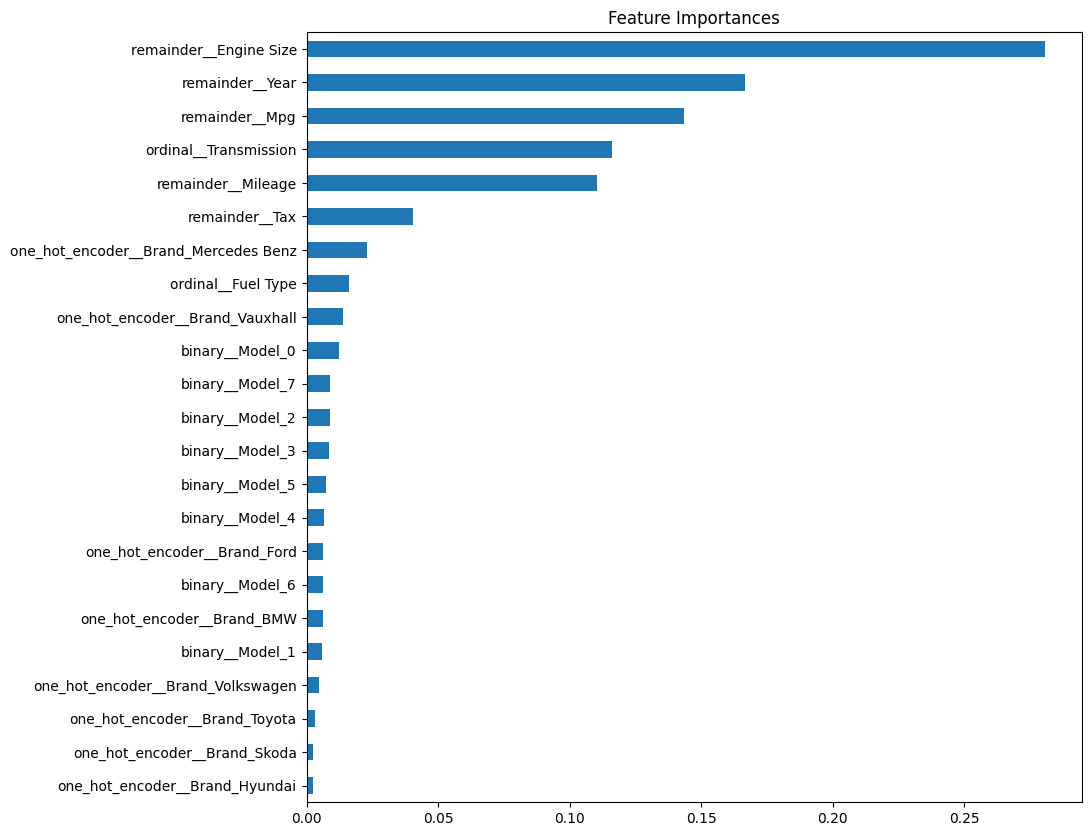

In [425]:
feature_imp = pd.Series(rf_tuning['modeling'].feature_importances_, transformer.get_feature_names_out()).sort_values(ascending = False)
feature_imp[::-1].plot(kind='barh', title='Feature Importances', figsize = (10,10));

| Fitur                    | Deskripsi                                             |
|--------------------------|-------------------------------------------------------|
| Engine Size              | Fitur ini memiliki feature importance tertinggi dalam memprediksi harga mobil. Semakin besar ukuran mesin mobil, semakin tinggi kemungkinan harga mobil menjadi lebih tinggi. |
| Year                     | Tahun pembuatan mobil menjadi faktor penting dalam menentukan harga. Mobil yang lebih baru cenderung memiliki harga yang lebih tinggi. |
| Mpg (Miles Per Gallon)   | Konsumsi bahan bakar juga memiliki pengaruh yang signifikan. Mobil dengan efisiensi bahan bakar yang lebih baik cenderung memiliki harga yang lebih tinggi. |
| Transmission             | Transmisi otomatis atau semi-otomatis cenderung memiliki harga yang lebih tinggi dibandingkan dengan transmisi manual. |
| Mileage                  | Semakin rendah total jarak tempuh, semakin tinggi harga mobil. |
| Tax                      | Pajak yang dikenakan pada mobil memainkan peran dalam menentukan harga. Mobil dengan pajak yang lebih tinggi biasanya memiliki harga yang lebih tinggi. |
| Brand                    | Merek mobil, seperti Mercedes Benz juga memiliki pengaruh terhadap harga. Brand mobil ini memiliki reputasi yang lebih tinggi atau fitur-fitur yang lebih mewah, sehingga memengaruhi harga mobil. |
| Model                    | Model spesifik dari mobil juga berkontribusi terhadap harga. Beberapa model kemungkina memiliki reputasi pada setiap segment harga, sehingga memengaruhi harga mobil. |

### **MAPE Performance Based on Range Price**

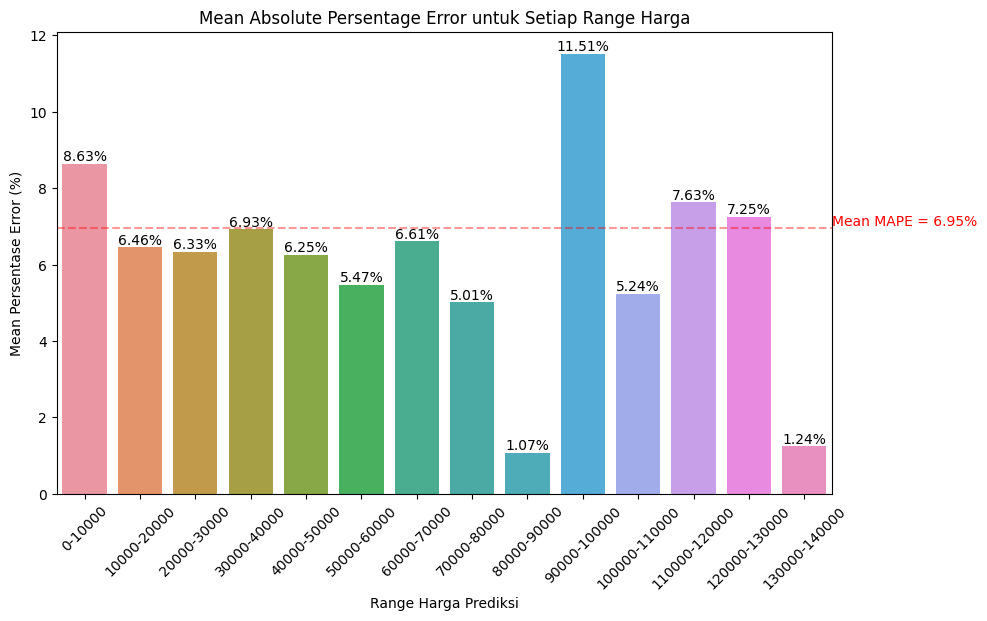

In [426]:
# Tentukan kategori berdasarkan kisaran harga aktual
price_bins = [0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 110000, 120000, 130000, 140000]
price_labels = [f'{price_bins[i]}-{price_bins[i+1]}' for i in range(len(price_bins)-1)]

df_error = pd.DataFrame({
    'y_actual': y_test,
    'y_prediksi': y_pred_tuning,
})

# Hitung error
df_error['error'] = df_error['y_actual'] - df_error['y_prediksi']

# Hitung persentase error
df_error['percent_error (%)'] = (df_error['error'] / df_error['y_actual']).abs() * 100

# Membuat price range
df_error['price_range'] = pd.cut(df_error['y_prediksi'], bins=price_bins, labels=price_labels, right=False)


# Hitung mean persentase error untuk setiap Range harga
mean_percent_error = df_error.groupby('price_range')['percent_error (%)'].mean()

# Plot barplot
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_percent_error.index, y=mean_percent_error.values)
plt.axhline(y=6.9526, color='red', linestyle='--', alpha=0.4)  
plt.title('Mean Absolute Persentage Error untuk Setiap Range Harga')
plt.xlabel('Range Harga Prediksi')
plt.ylabel('Mean Persentase Error (%)')
plt.xticks(rotation=45)

# Tambahkan anotasi di atas setiap batang
for idx, value in enumerate(mean_percent_error.values):
    plt.text(idx, value, f'{value:.2f}%', ha='center', va='bottom')

# Anotasi untuk garis horizontal
plt.text(len(mean_percent_error)-0.5, 6.9526, 'Mean MAPE = 6.95%', color='red', ha='left', va='bottom', fontsize=10)

plt.show()


Berdasarkan visualisasi diatas model yang kami memperoleh informasi sebagai berikut :

| Price Range      | Mean MAPE (%)  | Insight                                                                       |
|------------------|----------------|-------------------------------------------------------------------------------|
| 0-10000          | 8.63           | Mean MAPE berada di atas 6.95%, menunjukkan adanya peningkatan error pada rentang harga ini.  |
| 10000-20000      | 6.46           | Mean MAPE berada di bawah 6.95%, namun tingkat error cenderung lebih rendah dibandingkan dengan rentang harga sebelumnya.  |
| 20000-30000      | 6.33           | Mean MAPE berada di bawah 6.95%, menunjukkan adanya tingkat error yang konsisten pada rentang harga ini.  |
| 30000-40000      | 6.93           | Mean MAPE berada di bawah 6.95%, menunjukkan adanya peningkatan error pada rentang harga ini.  |
| 40000-50000      | 6.25           | Mean MAPE berada di bawah 6.95%, namun terjadi penurunan error dibandingkan dengan rentang harga sebelumnya.  |
| 50000-60000      | 5.47           | Mean MAPE berada di bawah 6.95%, menunjukkan adanya peningkatan akurasi prediksi pada rentang harga ini.  |
| 60000-70000      | 6.61           | Mean MAPE berada di bawah 6.95%, menunjukkan adanya peningkatan error pada rentang harga ini.  |
| 70000-80000      | 5.01           | Mean MAPE berada di bawah 6.95%, menunjukkan prediksi yang lebih akurat pada rentang harga ini.  |
| 80000-90000      | 1.07           | Mean MAPE berada di bawah 6.95%, menunjukkan prediksi yang sangat akurat pada rentang harga ini.  |
| 90000-100000     | 11.51          | Mean MAPE berada di atas 6.95%, menunjukkan adanya peningkatan error yang signifikan pada rentang harga ini.  |
| 100000-110000    | 5.24           | Mean MAPE berada di bawah 6.95%, menunjukkan prediksi yang lebih akurat pada rentang harga ini.  |
| 110000-120000    | 7.63           | Mean MAPE berada di atas 6.95%, menunjukkan adanya peningkatan error pada rentang harga ini.  |
| 120000-130000    | 7.25           | Mean MAPE berada di atas 6.95%, menunjukkan adanya peningkatan error pada rentang harga ini.  |
| 130000-140000    | 1.24           | Mean MAPE berada di bawah 6.95%, menunjukkan prediksi yang sangat akurat pada rentang harga ini.  |

#### **Analisis Performa Model Berdasarkan Rentang Harga**

**Range Price 90000-100000**

In [427]:
df_mape = X_test.copy()
df_mape['Range Prediksi'] = df_error['price_range']
df_mape['Price Actual'] = y_test
df_mape['Price Prediction'] = y_pred_tuning
df_mape['percent_error (%)'] = df_error['percent_error (%)']

In [428]:
print('Data Test Range Highest Error Range 90000-100000')
display(df_mape[df_mape['Range Prediksi']=='90000-100000'].sort_values('percent_error (%)', ascending=False).head(1))
print("\nKarakteristik Serupa di Data Train")
display(df_train[(df_train['Model']=='S Class')&(df_train['Year']==2019)&(df_train['Transmission']=='Automatic')&(df_train['Engine Size']==4.0)].sort_values('Year', ascending=False))
print(f"Median Price of Mercedes Benz S Class Year of Built 2019 dan Transmissi Automatic adalah {df_train[(df_train['Model']=='S Class')&(df_train['Year']==2019)&(df_train['Engine Size']==4.0)&(df_train['Transmission']=='Automatic')]['Price'].median()}")

Data Test Range Highest Error Range 90000-100000


Brand    Model  Year Transmission  Mileage Fuel Type  Tax  \
49760  Mercedes Benz  S Class  2019    Automatic     1500    Petrol  145   

        Mpg  Engine Size Range Prediksi  Price Actual  Price Prediction  \
49760  31.7          4.0   90000-100000        124999       92266.49505   

       percent_error (%)  
49760          26.186213


Karakteristik Serupa di Data Train


Brand    Model  Year Transmission  Mileage Fuel Type  Tax  \
50646  Mercedes Benz  S Class  2019    Automatic     1314    Petrol  145   
47671  Mercedes Benz  S Class  2019    Automatic     3671    Petrol  145   
52188  Mercedes Benz  S Class  2019    Automatic     1912    Petrol  145   

        Mpg  Engine Size   Price  
50646  34.0          4.0   86699  
47671  31.7          4.0  104590  
52188  34.0          4.0   86399

Median Price of Mercedes Benz S Class Year of Built 2019 dan Transmissi Automatic adalah 86699.0


Pada tabel diperoleh bahwa error terbesear disebabkan oleh Mercedes Benz S Class Engine Size 4.0 dan Year 2019 memiliki error terbesar yaitu sebesar 26.18%. Berdasarkan informasi yang kami peroleh dari dataset rerata harga untuk karakteristik mobil serupa adalah `86699.0`. Ternyata Model mempelajari cukup baik untuk karakteristik mobil serupa, sedangkan pada data test harga yang diberikan jauh diatas rerata harga mobil tersebut dengan karakteristik yang sama pada data trai. Hal tersebut mungkin disebabkan faktor eksternal dimana penjual tidak memahami harga pasaran mobil dengan karakteristik tersebut.

**Range Price 0-10000**

In [429]:
Q1 = df_all['Year'].quantile(0.25)
Q3 = df_all['Year'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR

In [430]:
print('Data Test Range Highest Error Range 0-10000')
display(df_mape[(df_mape['Range Prediksi']=='0-10000')&(df_mape['percent_error (%)']>25)].sort_values('percent_error (%)', ascending=False).head(20))
# Median Tahun dengan Percent Error > 25
median_year = df_mape[(df_mape['Range Prediksi']=='0-10000') & (df_mape['percent_error (%)']>25)]['Year'].median()
print(f"Median Tahun dengan Percent Error > 25%: {median_year}")
print(f"Lower Fence untuk Year adalah {lower_bound}")

Data Test Range Highest Error Range 0-10000


Brand     Model  Year Transmission  Mileage Fuel Type  Tax  \
54540  Mercedes Benz   S Class  2001    Automatic   108800    Diesel  325   
35226           Ford    Mondeo  2005       Manual    97000    Diesel  205   
38383           Ford     Focus  2005       Manual    71214    Petrol  200   
37758           Ford    Mondeo  2005       Manual   108000    Petrol  260   
95651     Volkswagen    Beetle  2001       Manual    47729    Petrol  330   
69046         Toyota   Avensis  2003       Manual   167054    Diesel  205   
74942       Vauxhall     Astra  2001       Manual   159000    Petrol  235   
38402           Ford    Fusion  2004    Automatic    59300    Petrol  200   
56073  Mercedes Benz   C Class  2006    Automatic   153000    Petrol  300   
37325           Ford     Focus  2010       Manual    81124    Diesel  200   
69028         Toyota   Avensis  2004    Automatic    44000    Petrol  325   
54506  Mercedes Benz       CLK  2004    Automatic   113000    Diesel  300   
82102       Vauxhall  Insignia  2010       Manual   120000    Diesel  205   
62177          Skoda     Fabia  2012       Manual   130000    Petrol  145   
19767            BMW  6 Series  2005    Automatic    84000    Petrol  305   
55176  Mercedes Benz       SLK  2001       Manual    56785    Petrol  325   
91737     Volkswagen      Polo  2009       Manual    65024    Petrol  150   
43031        Hyundai       I10  2017    Automatic    35460    Petrol  150   
82549       Vauxhall     Agila  2004       Manual    62000    Petrol  145   
72548       Vauxhall     Corsa  2004       Manual    48524    Petrol  160   

        Mpg  Engine Size Range Prediksi  Price Actual  Price Prediction  \
54540  31.7          3.2        0-10000          1695       7027.733521   
35226  48.7          2.0        0-10000           675       2637.505232   
38383  42.1          1.6        0-10000           795       2410.792982   
37758  36.2          1.8        0-10000           675       2014.291155   
95651  32.5          2.0        0-10000          2490       7242.540852   
69046  48.7          2.0        0-10000           850       2468.032038   
74942  40.4          1.6        0-10000           450       1288.090476   
38402  42.8          1.4        0-10000          1500       4057.234743   
56073  33.6          1.8        0-10000          1695       3980.333490   
37325  47.9          2.0        0-10000          3000       6400.325298   
69028  30.7          2.0        0-10000          3495       7453.848496   
54506  39.2          2.7        0-10000          2995       6103.844674   
82102  48.4          2.0        0-10000          1799       3618.504261   
62177  47.9          1.4        0-10000          2495       4935.224170   
19767  24.6          4.4        0-10000          4995       9755.611654   
55176  25.5          3.2        0-10000          4990       9519.049091   
91737  48.7          1.2        0-10000          1990       3796.019612   
43031  47.9          1.2        0-10000         92000       8897.893677   
82549  43.5          1.0        0-10000          1395       2649.726598   
72548  47.1          1.1        0-10000          1100       2068.993327   

       percent_error (%)  
54540         314.615547  
35226         290.741516  
38383         203.244400  
37758         198.413504  
95651         190.865094  
69046         190.356710  
74942         186.242328  
38402         170.482316  
56073         134.827935  
37325         113.344177  
69028         113.271774  
54506         103.801158  
82102         101.139759  
62177          97.804576  
19767          95.307541  
55176          90.762507  
91737          90.754754  
43031          90.328376  
82549          89.944559  
72548          88.090302

Median Tahun dengan Percent Error > 25%: 2010.0
Lower Fence untuk Year adalah 2011.5


Dari data dengan prediksi range harga di bawah 10.000, terlihat bahwa prediksi yang melebih nilai aktual disebabkan oleh distribusi kendaraan yang diproduksi sebelum tahun 2011. Sebagaimana diketahui, lower fence untuk kolom `Year` adalah 2011.5. Hal ini mengakibatkan model kurang mampu mempelajari karakteristik kendaraan yang diproduksi sebelum tahun tersebut karena jumlah data yang terbatas. Selain itu, `Year` merupakan fitur kedua yang paling penting setelah `Engine Size`. Ketika model kesulitan dalam menemukan pola untuk kendaraan dengan tahun produksi serupa, model akan menyesuaikan prediksi berdasarkan pola data yang sudah dipelajari, yang mengakibatkan hasil melebih nilai aktual (overestimate).

**Range Price 80000-90000**

In [431]:
print('Data Test Range Highest Error Range 80000-90000')
display(df_mape[(df_mape['Range Prediksi']=='80000-90000')].sort_values('percent_error (%)'))
print("\nKarakteristik Serupa di Data Train")
display(df_train[(df_train['Year']==2019)&(df_train['Mpg']==30.7)&(df_train['Transmission']=='Semi-Auto')&(df_train['Engine Size']==4.0)].sort_values('Year', ascending=False))

Data Test Range Highest Error Range 80000-90000


Brand     Model  Year Transmission  Mileage Fuel Type  Tax  \
695             Audi        Q8  2019    Semi-Auto     5978    Diesel  150   
1102            Audi        Q8  2020    Automatic     3522    Diesel  145   
52120  Mercedes Benz   S Class  2018    Automatic     1952    Petrol  145   
49549  Mercedes Benz  SL CLASS  2019    Automatic       10    Petrol  145   

        Mpg  Engine Size Range Prediksi  Price Actual  Price Prediction  \
695    30.7          4.0    80000-90000         83995      83692.762281   
1102   30.7          4.0    80000-90000         84496      85139.867011   
52120  34.0          4.0    80000-90000         82099      83103.643327   
49549  28.0          5.5    80000-90000         79210      80745.405451   

       percent_error (%)  
695             0.359828  
1102            0.762009  
52120           1.223697  
49549           1.938398


Karakteristik Serupa di Data Train


Brand Model  Year Transmission  Mileage Fuel Type  Tax   Mpg  \
7108  Audi    Q8  2019    Semi-Auto     3401    Diesel  150  30.7   

      Engine Size  Price  
7108          4.0  85900

**Range Price 130000-140000**

In [432]:
print('Data Test Range Highest Error Range 130000-140000')
display(df_mape[(df_mape['Range Prediksi']=='130000-140000')])
print('Karakteristik Serupa di Data Train')
display(df_train[(df_train['Year']==2020)&(df_train['Mpg']<40)&(df_train['Transmission']=='Semi-Auto')&(df_train['Engine Size']==5.2)].sort_values('Year', ascending=False))

Data Test Range Highest Error Range 130000-140000


Brand Model  Year Transmission  Mileage Fuel Type  Tax   Mpg  \
5397  Audi    R8  2020    Semi-Auto      333    Petrol  145  21.4   
2242  Audi    R8  2020    Semi-Auto       70    Petrol  145  21.1   

      Engine Size Range Prediksi  Price Actual  Price Prediction  \
5397          5.2  130000-140000        133900     135151.820081   
2242          5.2  130000-140000        137995     135851.063816   

      percent_error (%)  
5397           0.934892  
2242           1.553633

Karakteristik Serupa di Data Train


Brand Model  Year Transmission  Mileage Fuel Type  Tax   Mpg  \
4743  Audi    R8  2020    Semi-Auto     2000    Petrol  145  21.1   

      Engine Size   Price  
4743          5.2  145000

Jika kita melihat kinerja MAPE pada rentang harga antara 80.000 hingga 90.000 dan 130.000 hingga 140.000, yang memiliki rerata MAPE di bawah 2%, itu menandakan bahwa prediksi pada rentang harga ini sangat baik. Hal ini disebabkan persebaran data harga prediksi pada rentang tersebut sangat sedikit namun memiliki karakteristik yang serupa berdasarkan feature importance seperti `Engine Size`, `Year`, `Mpg`, dan `Transmisi`.

**Insight Summary**

| Range Harga Prediksi       | Insight                                                                                                                                                                                                                                                  |
|-------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| 90000-100000      | Error terbesar disebabkan oleh Mercedes Benz S Class Engine Size 4.0 dan Year 2019 dengan error sebesar 26.18%. Model mempelajari cukup baik untuk karakteristik mobil serupa, namun harga yang diberikan pada data test jauh di atas rerata harga mobil serupa sehingga menyebabkan prediksi menjadi *underestimate*.                                                                                    |
| 0-10000           | Prediksi melebih nilai aktual disebabkan oleh distribusi kendaraan yang diproduksi sebelum tahun 2011. Kurangnya data kendaraan dengan tahun produksi dibawah 2011 tersebut mengakibatkan model kesulitan menemukan pola yang tepat. Ketika model kesulitan dalam menemukan pola untuk kendaraan dengan tahun produksi serupa, model akan menyesuaikan prediksi berdasarkan pola data yang sudah dipelajari sehingga menghasilkan prediksi *overestimate*.                                                                 |
| 80000-90000  & 130000-140000     | Jika kita melihat kinerja MAPE pada rentang harga antara 80.000 hingga 90.000 dan 130.000 hingga 140.000, yang memiliki rerata MAPE di bawah 2%, itu menandakan bahwa prediksi pada rentang harga ini sangat baik. Hal ini disebabkan persebaran data harga prediksi pada rentang tersebut sangat sedikit namun memiliki karakteristik yang serupa berdasarkan feature importance seperti `Engine Size`, `Year`, `Mpg`, dan `Transmission`. |


### **Model Limitation**
| Fitur | Tipe Data | Limitasi | 
| --- | --- | --- | 
| Brand | Object | Model hanya dapat digunakan pada Brand Kendaraan ('Audi', 'BMW', 'Ford', 'Hyundai', 'Mercedes Benz', 'Skoda','Toyota', 'Vauxhall', 'Volkswagen') |
| Model | Object | Model hanya dapat digunakan untuk 190 Model kendaraan dari 9 Brand kendaraan|
| Year | Object | Tahun pembuatan kendaraan 1996 - 2020|
| Price | Integer | Mobil dengan rentang harga £450 - £159999 |
| Transmission | Object | Mobil bertransmisi Manual, Semi-Auto dan Automatic | 
| Mileage | Integer | Mobil dengan mileage 1 - 323000 | 
| Fuel Type | Object | Mobil bertipe bahan bakar Diesel, Petrol, Other, Hybrid dan Electric | 
| Tax | Integer | Mobil dengan pajak kendaraan £0 - £580 | 
| Mpg | Float | Mobil dengang konsumsi bahan bakar 11 - 470.8 Mpg |
| Engine Size | Float | Mobil yang kapasitas mesin berukuran 0 L - 6.6 L |


### **Model Implementation**
#### **Save Final Model**

In [433]:
import pickle

# best model
final_model = random_rf.best_estimator_

# fit
final_model.fit(X, y)

# save with pickle
pickle.dump(final_model, open('UK_Used_Car_Price_Prediction_RF.sav', 'wb'))

#### **Predict Using Model**

In [434]:
loaded_model = pickle.load(open('UK_Used_Car_Price_Prediction_RF.sav', "rb"))

# Test 1
df_test1 = pd.DataFrame({
    'Brand' : ['Volkswagen'], 
    'Model' : ['Fox'], 
    'Year' : [2010], 
    'Transmission' : ['Manual'], 
    'Mileage' : [60000], 
    'Fuel Type' : ['Petrol'], 
    'Tax' : [145],
    'Mpg' : [46], 
    'Engine Size' : [1.2]
    })

# print sample data
display(df_test1)

# predict that data
predicted_price = loaded_model.predict(df_test1)

# print the predicted price
print("Predicted price:", predicted_price)

Brand Model  Year Transmission  Mileage Fuel Type  Tax  Mpg  \
0  Volkswagen   Fox  2010       Manual    60000    Petrol  145   46   

   Engine Size  
0          1.2

Predicted price: [3754.40526316]


Prediksi Harga: £3754.405 termasuk kedalam range harga prediksi (0-10000)

Persentase Error: 8.63% 

**Perhitungan:**

- Harga Minimum Estimasi = £3754.405 - (£3754.405 * 0.0863) ≈ £3451.39
- Harga Maksimum Estimasi = £3754.405 + (£3754.405 * 0.0863) ≈ £4057.42

**Kesimpulan:**

Dengan menggunakan MAPE sebesar 8.63%, harga mobil dengan prediksi £3754.405 memiliki kemungkinan harga sesungguhnya antara sekitar £3451.39 hingga £4057.42.

In [435]:
# Test 2
df_test2 = pd.DataFrame({
    'Brand' : ['Audi'], 
    'Model' : ['A1'], 
    'Year' : [2019], 
    'Transmission' : ['Semi-Auto'], 
    'Mileage' : [2500], 
    'Fuel Type' : ['Petrol'], 
    'Tax' : [145],
    'Mpg' : [44.5], 
    'Engine Size' : [1.5]
    })

# print sample data
display(df_test2)

# predict that data
predicted_price = loaded_model.predict(df_test2)

# print the predicted price
print("Predicted price:", predicted_price)

Brand Model  Year Transmission  Mileage Fuel Type  Tax   Mpg  Engine Size
0  Audi    A1  2019    Semi-Auto     2500    Petrol  145  44.5          1.5

Predicted price: [22510.46989496]


**Prediksi Harga:** £22510.469 termasuk Range harga (20000 hingga 30000)

**Persentase Error:** 6.33%

**Perhitungan:**

- Harga Minimum Estimasi = £22510.469 - (£22510.469 * 0.0633) ≈ £21079.94
- Harga Maksimum Estimasi = £22510.469 + (£22510.469 * 0.0633) ≈ £23941.00

**Kesimpulan:**

Dengan menggunakan MAPE sebesar 6.33%, harga mobil dengan prediksi £22510.469 memiliki kemungkinan harga sesungguhnya antara sekitar £21079.94 hingga £23941.00.

## **Conclussion and Recommendation**

### **Conclusion**

**Karakteristik Mobil Berdasarkan Segment Harga:**

1. **Kategori Budget**: 
    Kategori Budget mencakup mobil produksi lama (4 tahun) yang berukuran kecil, memiliki mesin bertenaga kecil hingga menengah, bertransmisi manual, dan memiliki efisiensi bahan bakar yang sangat baik, membuat kendaraan pada kategori ini sangat cocok untuk kebutuhan transportasi perkotaan.

2. **Kategori Standard**: 
    Kategori Standard mencakup mobil-mobil dengan variasi yang beragam, dengan perpaduan karakteristik kendaraan dari kategori Budget dan Standar, membuat kendaraan pada kategori ini dapat memenuhi preferensi dan kebutuhan yang berbeda-beda.

3. **Kategori Premium**: 
    Kategori Premium mencakup mobil produksi baru (1 tahun) yang berukuran besar, memiliki mesin bertenaga menegah hingga besar, bertransmisi modern seperti semi-auto dan automatic, dan memiliki efisiensi bahan bakar yang cukup.
    
Dengan karakteristik tersebut, stakeholder mendapatkan gambaran mengenai mobil bekas di Inggris Raya berdasarkan kategori harga dari data listing mobil bekas di sana.


<br>

**Karakteristik Model Machine Learning yang Diperoleh:**

1. **Metric yang Digunakan**: 
   Penggunaan Mean Absolute Percentage Error (MAPE) memungkinkan interpretasi kesalahan prediksi secara intuitif sebagai persentase, yang lebih mudah dimengerti dalam konteks bisnis.

2. **Model Terbaik dari Cross-Validation**: 
   Model terbaik sebelum penyetelan (tuning) adalah model Random Forest dengan MAPE sebesar **7.401%**.

3. **Model Terbaik setelah Penyetelan (Tuning)**: 
   Setelah penyetelan, MAPE berhasil diturunkan menjadi **6.953%**, menunjukkan peningkatan performa sebesar 4.48%.

4. **Parameter Terbaik untuk Model Random Forest**:
   - Jumlah Pohon (n_estimators): 76
   - Minimal Sampel untuk Split (min_samples_split): 8
   - Minimal Sampel di Setiap Leaf (min_samples_leaf): 1
   - Jumlah Fitur Maksimum untuk Setiap Split (max_features): 7
   - Kedalaman Maksimum Pohon (max_depth): 20
   - Penggunaan Bootstrap (bootstrap): False

5. **Fitur yang Paling Berpengaruh** dalam Model Random Forest untuk Memprediksi Harga:
   - Engine Size
   - Year
   - Mpg (Miles Per Gallon)
   - Transmission
   - Mileage

6. **Error Residual**: 
    Berikut adalah ringkasan insight mengenai distribusi residual pada harga prediksi:

    a. **Overestimate pada Rentang -40000 hingga -20000:**
    - Terdapat dua data *Overestimate*.
    - Model cenderung overestimate harga mobil Mercedes Benz S Class dengan tahun pembuatan di bawah 2010 karena kurangnya data pada rentang tersebut.
    - Harga actual pada data test underpriced jika dibandingkan harga pasaran pada data train sehingga menyebabkan prediksi *overestimate*.

    b. **Underestimate pada Rentang 20000 hingga 90000:**
    - Terdapat tujuh data dengan persentase ekstrim antara 33.28% hingga 90.33%.
    - Prediksi underestimate pada rentang ini disebabkan oleh kurangnya data mobil pada rentang tersebut dalam data train. Akibatnya, ketika model digunakan untuk memprediksi karakteristik mobil yang sedikit berbeda pada data test, prediksi menjadi tidak akurat. Selain itu, harga aktual pada data test juga cenderung overpriced jika dibandingkan dengan harga pasaran yang ada dalam data train.
    - Harga actual pada data test *Overpriced* dibandingkan dengan harga pasaran pada data train, menyebabkan prediksi underestimate.

7. **Performa Model Berdasarkan Rentang Harga**:
    - Rentang harga kendaraan mempengaruhi tingkat kesalahan prediksi (MAPE), dengan rentang harga di bawah 10.000 menunjukkan MAPE di atas rerata keseluruhan 6.95%, menandakan peningkatan error.
    - Rentang harga 80.000-90.000 menunjukkan MAPE sangat rendah, kurang dari 2%, menunjukkan prediksi yang sangat akurat.
    - Rentang harga 90.000-100.000 menunjukkan peningkatan error yang signifikan dengan MAPE di atas 11%, mengindikasikan prediksi yang kurang akurat.
    - Rentang harga 130.000-140.000 juga menunjukkan MAPE sangat rendah, di bawah 2%, menandakan prediksi yang sangat akurat.

8. **Analisis Performa Model Berdasarkan Rentang Harga**:
    - Error terbesar disebabkan oleh Mercedes Benz S Class Engine Size 4.0 dan Year 2019 dengan error sebesar 26.18%. Model mempelajari cukup baik untuk karakteristik mobil serupa, namun harga yang diberikan pada data test jauh di atas rerata harga mobil serupa sehingga menyebabkan prediksi menjadi *underestimate*.
    - Prediksi untuk rentang harga 0-10.000 cenderung melebihi nilai aktual, karena kurangnya data kendaraan dengan tahun produksi sebelum 2011, yang membuat model sulit untuk menyesuaikan prediksi secara akurat.
    - Rentang harga 80.000-90.000 dan 130.000-140.000 menunjukkan performa prediksi yang sangat baik dengan error yang sangat kecil. Hal ini disebabkan persebaran data harga prediksi pada rentang tersebut sangat sedikit namun memiliki karakteristik yang serupa berdasarkan feature importance seperti `Engine Size`, `Year`, `Mpg`, dan `Transmission`.

9. **Cost Benefit**:

    - **Tanpa Menggunakan Model :**<br>
    Hasil analisis ini dapat dimanfaatkan oleh perusahaan untuk mengurangi biaya dan meminimalkan upaya tenaga kerja yang diperlukan sebagai estimator harga mobil. Sebagai contoh, upah minimum pekerja di Inggris Raya adalah [£2013.44](https://id.tradingeconomics.com/united-kingdom/minimum-wages) per bulan, dengan asumsi bahwa mereka bekerja selama 8 jam setiap hari kerja. Dengan menggunakan model kami untuk memprediksi harga, kita tidak perlu menambah pekerjaan untuk melakukan estimasi harga dan dapat mengurangi biaya sebanyak £2013.44 per bulan.


    - **Menggunakan Model:**<br>
    Dengan memanfaatkan model, perusahaan bisa memprediksi harga mobil tanpa biaya tambahan untuk tenaga kerja sebagai estimator harga mobil bekas. Estimasi harga mobil bekas dengan model ini memerlukan waktu singkat, berbeda dengan metode tradisional yang memakan waktu lama untuk memprediksi harga satu mobil.
    
        Perusahaan dapat menggunakan model prediksi harga mobil yang telah dikembangkan. Sebagai contoh, kami melakukakn simulasi prediksi harga mobil dengan spesifikasi sebagai berikut:  
        
            Merek: Audi
            Model: A1
            Tahun: 2019
            Transmisi: Semi-Auto
            Jarak Tempuh: 2500 mil
            Jenis Bahan Bakar: Petrol
            Pajak: £145
            Konsumsi BBM: 44.5 mpg
            Ukuran Mesin: 1.5

        Prediksi harga pasaran untuk mobil ini adalah `£22,510.469`, yang masuk dalam rentang harga `£20,000 - £30,000` dengan error sebesar `6.33%`. Artinya, harga mobil sebenarnya diperkirakan berada di kisaran `£21,079.94 - £23,941.00.` Dengan menerapkan model ini, diharapkan perusahaan dapat meningkatkan efisiensi biaya perusahaan terutama biaya pekerja sebagai estimator harga mobil.

### **Recommendation**

Dataset yang kami miliki merupakan data mobil yang terpampang di iklan. Karena data tidak sepenuhnya mencerminkan preferensi atau minat sebenarnya dari pelanggan. Dalam hal ini, ada beberapa rekomendasi yang dapat kami berikan kepada webuyused car antara lain:

1. **Sumber Data Untuk Analysys:** Selain data iklan, perusahaan sebaiknya juga mengumpulkan dan menganalisis data historis penjualan mobil bekas, survei pelanggan, dan sumber data lainnya. Dengan demikian, akan terbentuk pemahaman yang lebih holistik tentang preferensi dan perilaku pembeli.

2. **Penelitian Pasar yang Komprehensif:** Perlu dilakukan penelitian pasar yang menyeluruh untuk memahami tren dan preferensi konsumen dalam kategori mobil bekas. Ini termasuk analisis kompetitor, survei pelanggan potensial, serta pemahaman mendalam tentang kondisi dan tren pasar yang sedang berlangsung.

3. **Segmentasi Pelanggan yang Lebih Terperinci:** Identifikasi segmen pelanggan yang lebih terperinci berdasarkan preferensi, anggaran, dan kebutuhan mereka. Dengan memahami secara mendalam kebutuhan dan keinginan setiap segmen, perusahaan dapat menyesuaikan strategi pemasaran dan penawaran produk untuk melayani pelanggan dengan lebih baik.

4. **Kemitraan Strategis dengan Dealer:** Pertimbangkan untuk menjalin kemitraan strategis dengan dealer mobil bekas lokal atau platform jual beli mobil terkemuka seperti facebook marketplace. Melalui kemitraan ini, perusahaan dapat memperoleh wawasan langsung dari profesional di lapangan, serta akses ke data penjualan yang lebih akurat dan terkini.

5. **Integrasi Karakteristik Mobil dalam Strategi Penetapan Harga:** Gabungkan analisis data yang mendalam dan segmentasi pelanggan dengan karakteristik mobil yang ditemukan, seperti tahun pembuatan, merek, model, transmisi, bahan bakar, tenaga mesin, dan efisiensi bahan bakar. Dengan demikian, perusahaan dapat menyesuaikan harga mobil secara lebih tepat sesuai dengan nilai tambah yang ditawarkan oleh setiap kendaraan, meningkatkan daya saing dan potensi penjualan mobil bekas.


-----

Berikut adalah rekomendasi untuk meningkatkan kehandalan pemodelan yang telah kami bangun:

1. **Pertimbangkan Fitur Tambahan**: Pertimbangkan untuk menambahkan fitur tambahan yang dapat meningkatkan kinerja model. Seperti kondisi body kendaraan, interior dan mesin.

2. **Eksplorasi Model Alternatif**: Selain Random Forest, kita mengetahui pada tahapan cross validasi diperoleh model lain yang juga stabil yaitu, Catboost. Dengan melakukan tuning model alternatif lainnya diharapkan akan diperoleh model yang lebih handal.

3. **Penanganan Overestimate dan Underestimate**: Perlu dilakukan penyesuaian harga pasaran yang lebih akurat pada data test untuk memastikan bahwa harga aktual mencerminkan nilai pasaran yang sebenarnya. Hal ini akan membantu model dalam membuat prediksi yang lebih akurat dengan meminimalkan perbedaan antara harga aktual dan harga pasaran yang dipelajari oleh model.

4. **Penambahan Data**: Penambahan dataset mobil terutama pada fitur-fitur yang memiliki banyak outliers dapat meningkatkan kinerja model terutama pada features yang paling penting untuk model Random Forest yang telah dibangun. Penambahan data tersebut diharapkan agar model dapat lebih belajar dari data yang sudah ada sebelumnya namun jumlahnya masih sedikit. 

## **Tableau**

[Link Dashboard](https://public.tableau.com/views/FinalProjectAlphaTeam/Dashboard?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link)